# Performance Metrics With LEO constellation Design parameters

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams["figure.figsize"] = (19, 10)
plt.rcParams.update({'font.size': 45})

# Default parameters

## 24 Hours

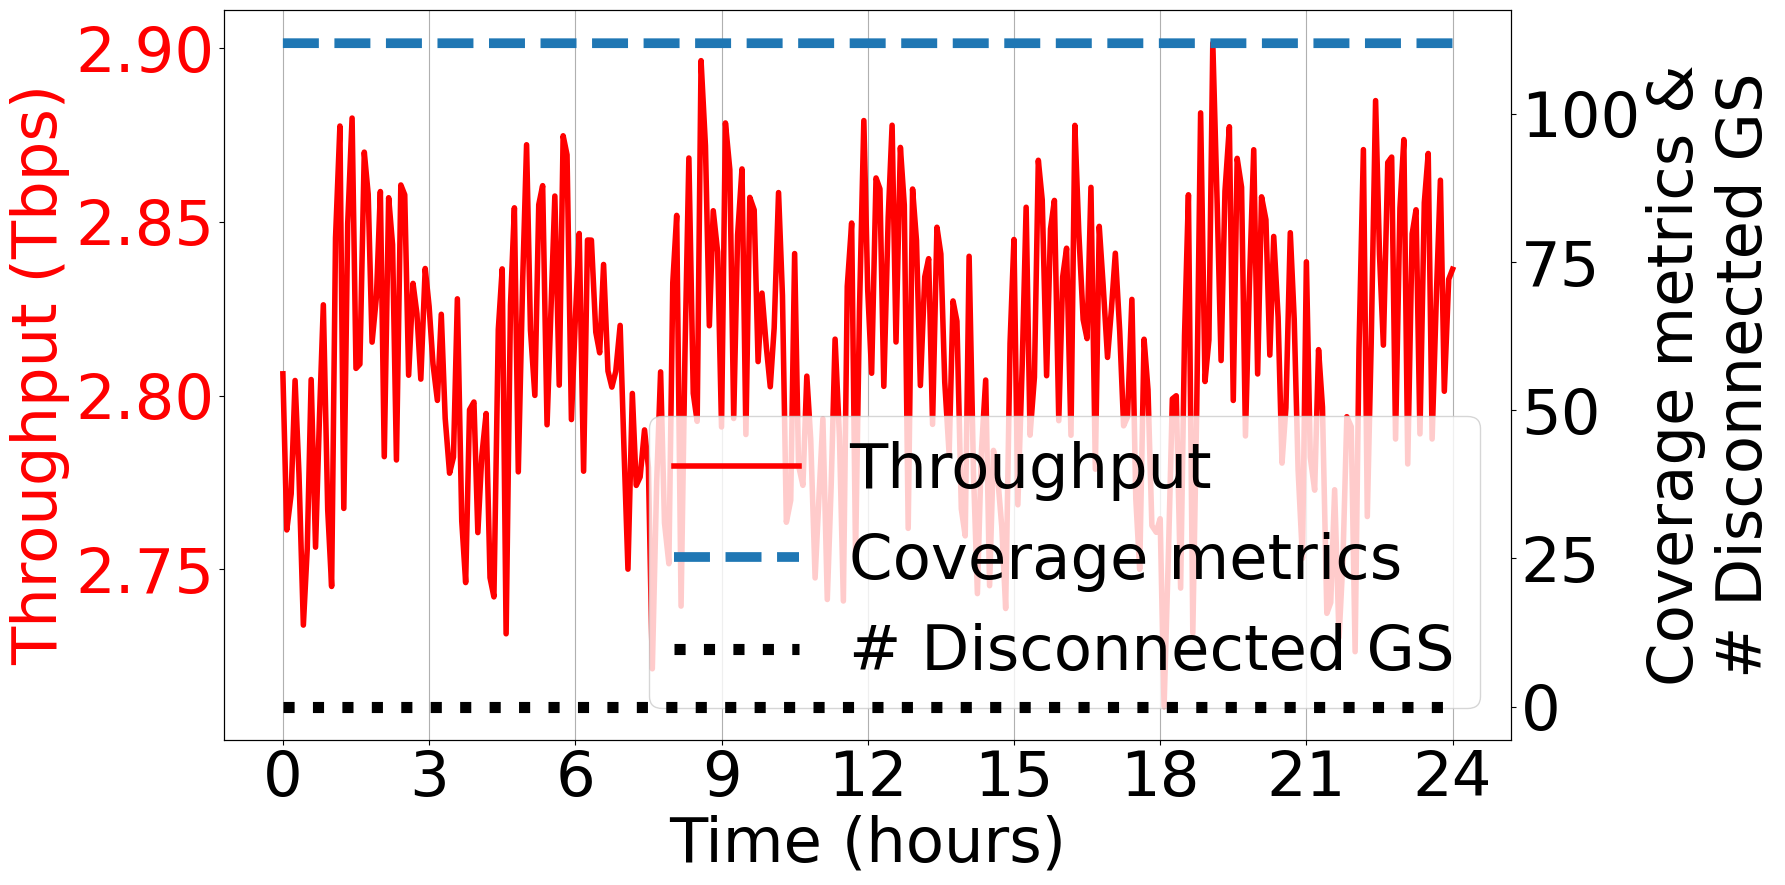

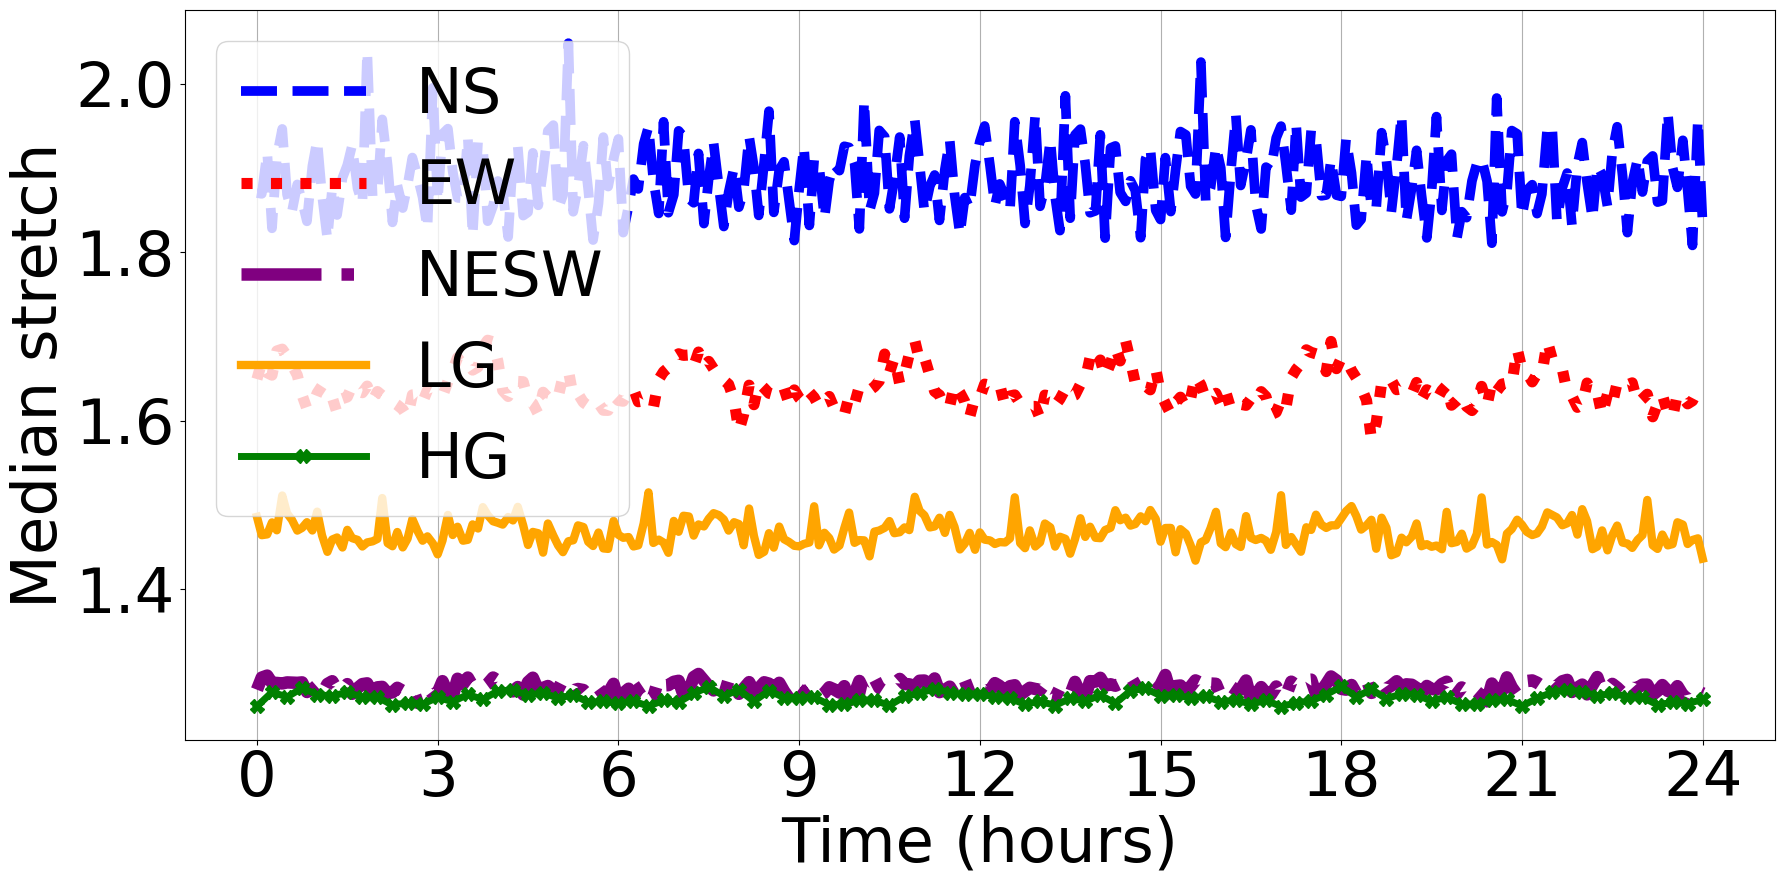

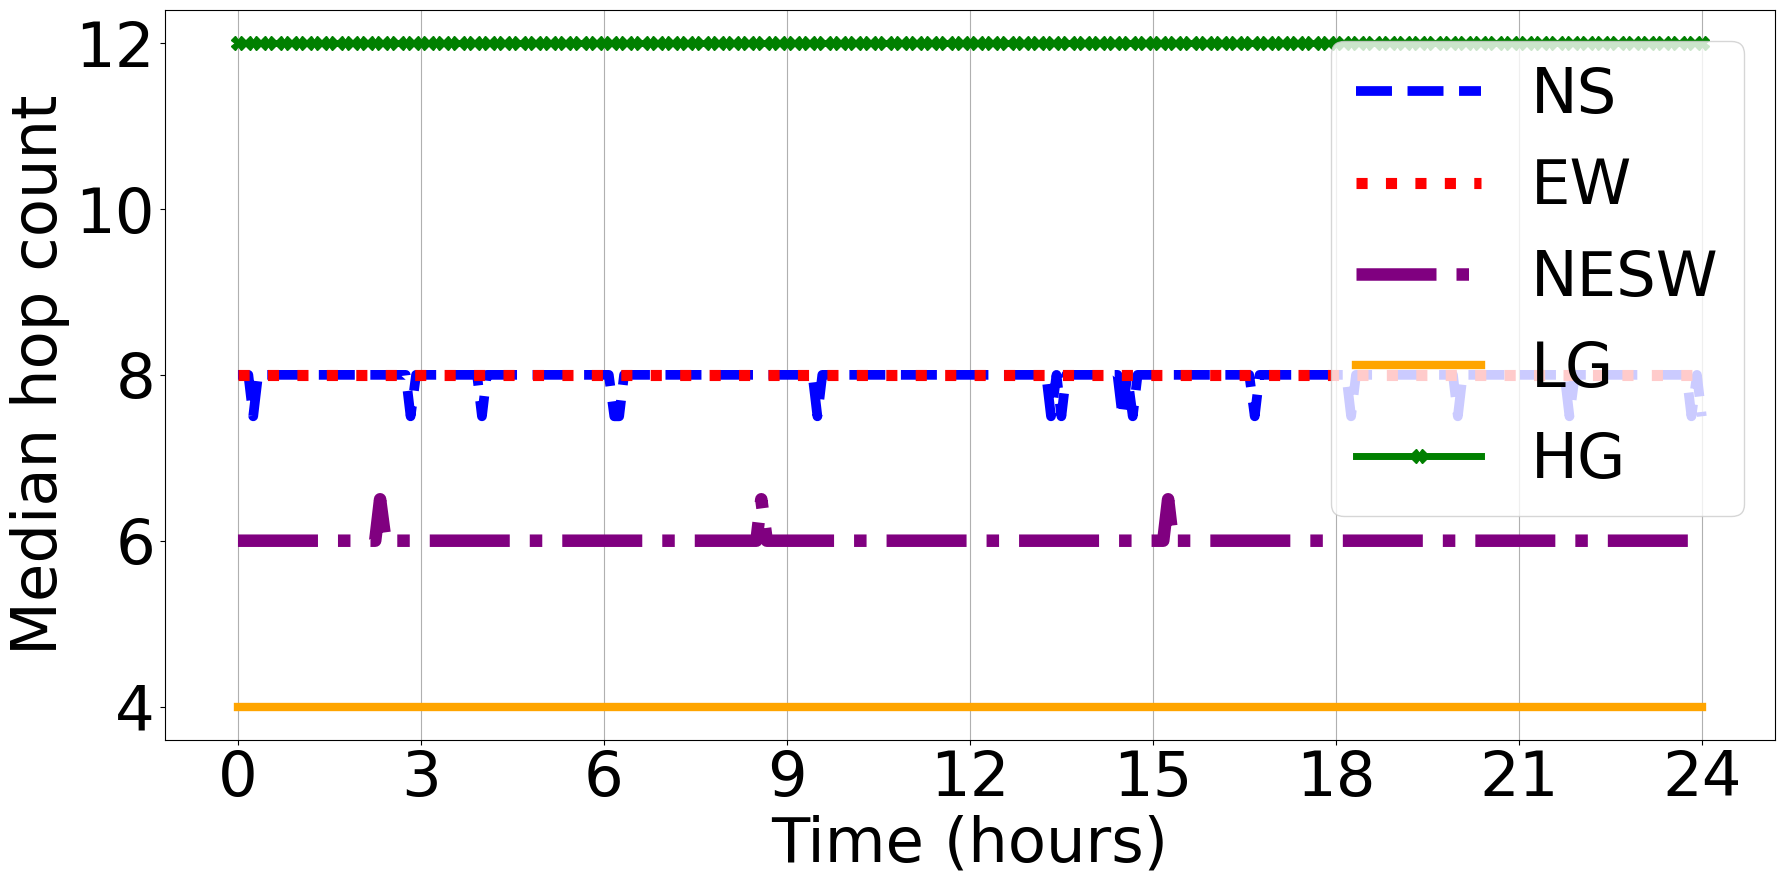

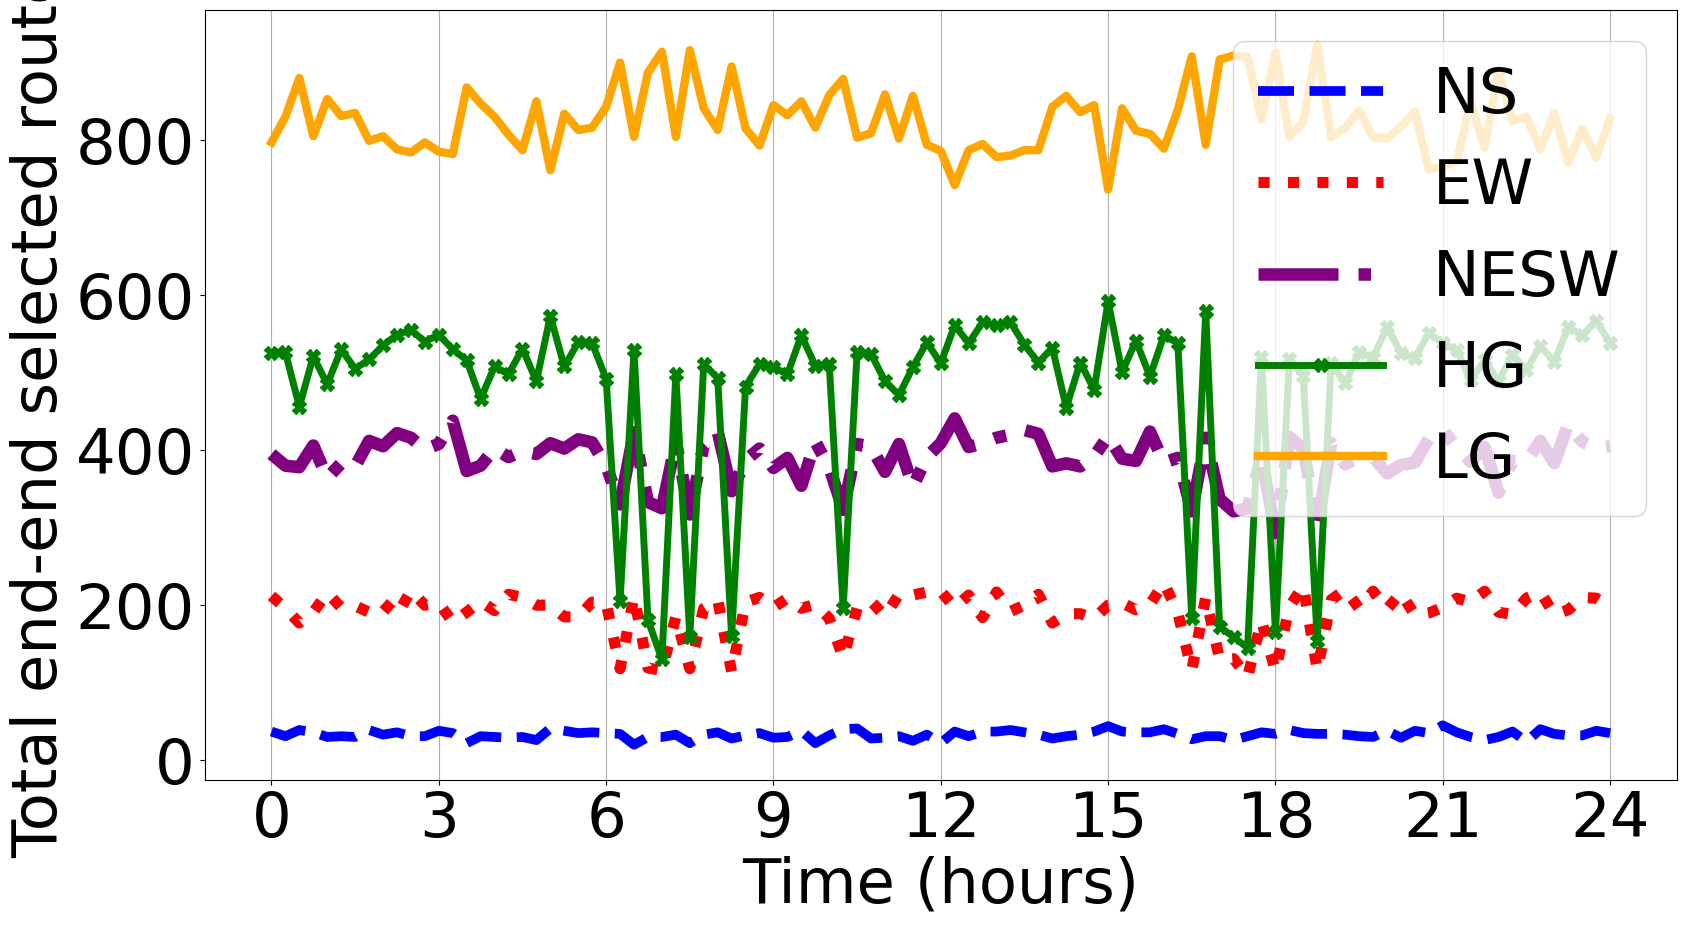

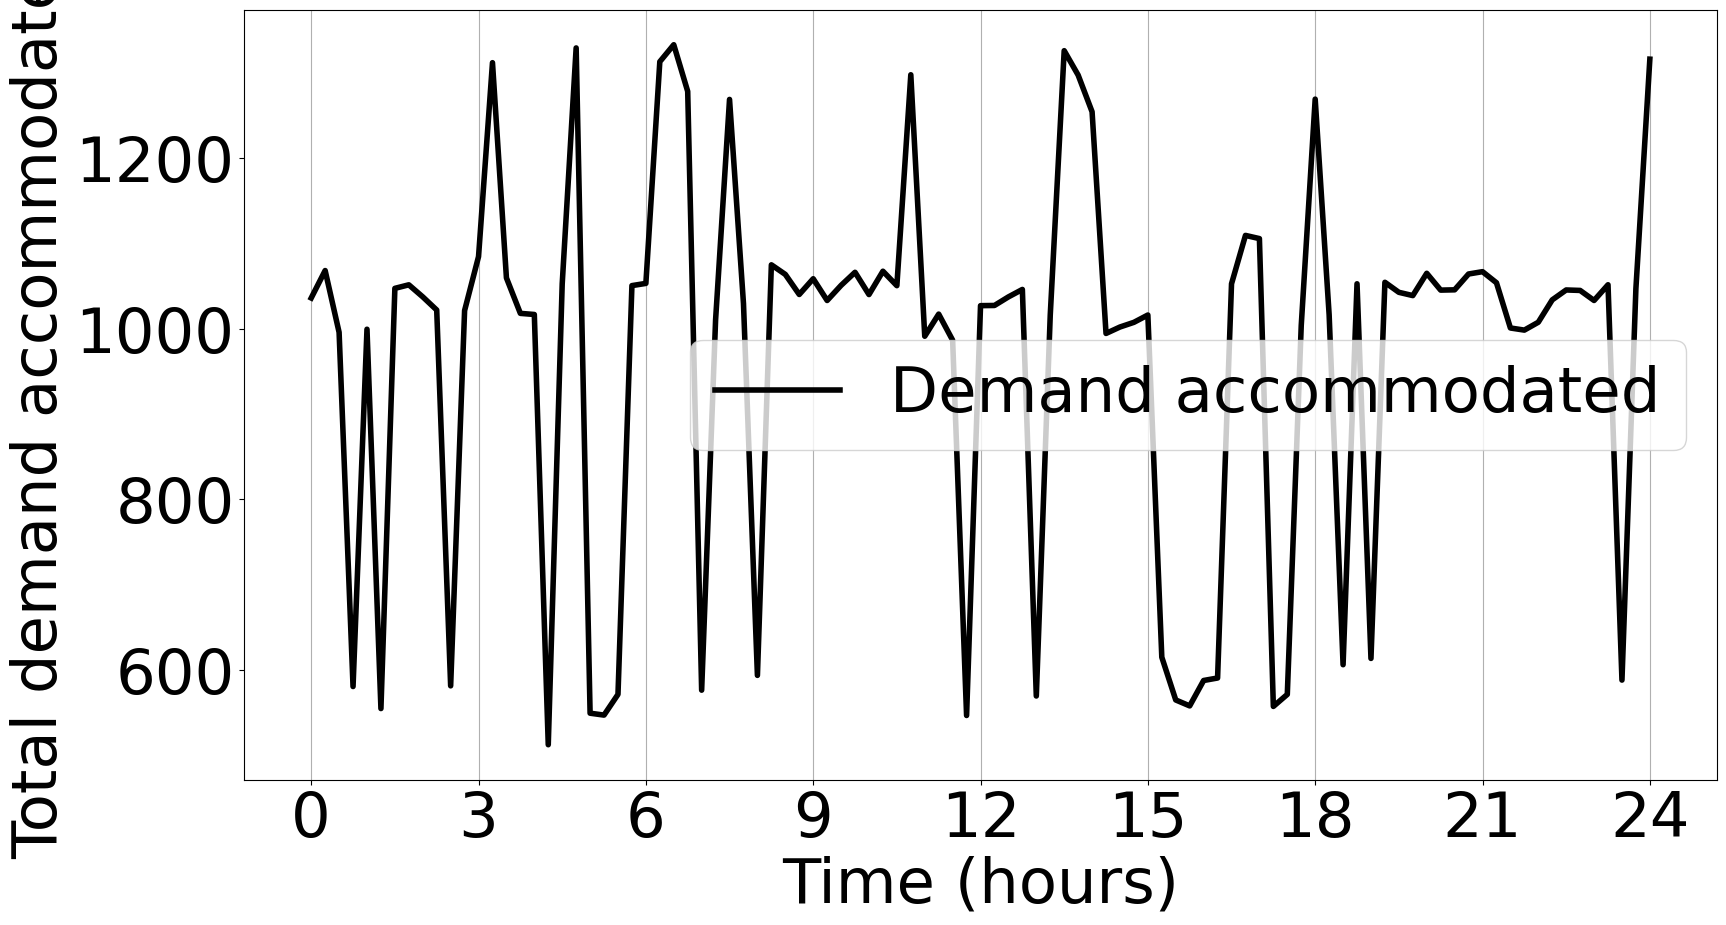

In [5]:
df = pd.read_csv('CSVs/explore_search_space/default_24H.csv')
df['t_h'] = round(df['t_ns']/(1000000000*60*60), 2)
df['th_POP_ONLY'] = df['th_POP_ONLY']/1000


x_line = [h for h in range(0, 25, 3)]
fig, ax1 = plt.subplots()
ax1.set_xticks(x_line, minor=False)
ax1.xaxis.grid(True, which='major')
ax1.xaxis.grid(True, which='minor')

# Throughput
ax1.set_xlabel('Time (hours)')

ax1.set_ylabel('Throughput (Tbps)', color='r')
ax1.tick_params(axis='y', labelcolor='r')

# line1 = ax1.plot(df['t_h'], df['th_POP_GDP'],
#                  label='Population GDP TM', color='r', linewidth=2)
line2 = ax1.plot(df['t_h'], df['th_POP_ONLY'],
                 label='Throughput', color='r', linewidth=4)
ax1.tick_params(axis='y')

# Coverage
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
# we already handled the x-label with ax1
ax2.set_ylabel('Coverage metrics &\n# Disconnected GS')
line3 = ax2.plot(df['t_h'], df['cov'], label='Coverage metrics',
                 linestyle='dashed', linewidth=7)
line4 = ax2.plot(df['t_h'], df['dead_cnt'], label='# Disconnected GS',
                 linestyle='dotted', color='black', linewidth=8)
ax2.tick_params(axis='y')
fig.tight_layout()
# lines = line1+line2+line3+line4
lines = line2+line3+line4
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels)
plt.tight_layout()
# plt.savefig('figures/24h/default_24h_thpop.png')
plt.show()


# Stretch
_, ax = plt.subplots()
ax.set_xticks(x_line, minor=False)
ax.xaxis.grid(True, which='major')
ax.xaxis.grid(True, which='minor')
plt.xlabel("Time (hours)")
plt.ylabel("Median stretch")
plt.plot(df['t_h'], df['NS_sth'], label='NS',
         color='Blue', linewidth=7, linestyle='dashed')
plt.plot(df['t_h'], df['EW_sth'], label='EW',
         color='Red', linewidth=8, linestyle='dotted')
plt.plot(df['t_h'], df['NESW_sth'], label='NESW',
         color='Purple', linewidth=9, linestyle='dashdot')
plt.plot(df['t_h'], df['LG_sth'], label='LG',
         color='Orange',  linewidth=6)


df = pd.read_csv('CSVs/explore_search_space/default_24H.csv')
df = df.iloc[::3]
df['t_h'] = round(df['t_ns']/(1000000000*60*60), 2)
plt.plot(df['t_h'], df['HG_sth'], label='HG',      color='Green',
         linewidth=5, linestyle='solid', marker='X', ms=10)

plt.legend()
plt.tight_layout()
# plt.savefig('figures/24h/default_24h_sth.png')
plt.show()


# Hop count
df = pd.read_csv('CSVs/explore_search_space/default_24H.csv')
df['t_h'] = round(df['t_ns']/(1000000000*60*60), 2)
_, ax = plt.subplots()
ax.set_xticks(x_line, minor=False)
ax.xaxis.grid(True, which='major')
ax.xaxis.grid(True, which='minor')
plt.xlabel("Time (hours)")
plt.ylabel("Median hop count")
plt.plot(df['t_h'], df['NS_cnt'], label='NS',
         color='Blue',  linewidth=7, linestyle='dashed')
plt.plot(df['t_h'], df['EW_cnt'], label='EW',
         color='Red',  linewidth=8, linestyle='dotted')
plt.plot(df['t_h'], df['NESW_cnt'], label='NESW',
         color='Purple', linewidth=9, linestyle='dashdot')
plt.plot(df['t_h'], df['LG_cnt'], label='LG',      color='Orange', linewidth=6)
df = pd.read_csv('CSVs/explore_search_space/default_24H.csv')
df = df.iloc[::3]
df['t_h'] = round(df['t_ns']/(1000000000*60*60), 2)
plt.plot(df['t_h'], df['HG_cnt'], label='HG',      color='Green',
         linewidth=5, linestyle='solid', marker='X', ms=10)

plt.legend()
plt.tight_layout()
# plt.savefig('figures/24h/default_24h_hcnt.png')
plt.show()

# Total end to end selected routes
fig, ax1 = plt.subplots()

ax1.set_xticks(x_line, minor=False)
ax1.xaxis.grid(True, which='major')
ax1.xaxis.grid(True, which='minor')
ax1.set_xlabel("Time (hours)")
ax1.set_ylabel("Total end-end selected routes")

ax1.plot(df['t_h'], df['NS_selt'], label='NS',
         color='Blue', linewidth=7, linestyle='dashed')
ax1.plot(df['t_h'], df['EW_selt'], label='EW',
         color='Red', linewidth=8, linestyle='dotted')
ax1.plot(df['t_h'], df['NESW_selt'], label='NESW',
         color='Purple', linewidth=9, linestyle='dashdot')
ax1.plot(df['t_h'], df['HG_selt'], label='HG', color='Green',
         linewidth=5, linestyle='solid', marker='X', ms=10)
ax1.plot(df['t_h'], df['LG_selt'], label='LG', color='Orange', linewidth=6)

ax1.legend()
plt.show()


# Total demand accommodated
fig, ax1 = plt.subplots()

ax1.set_xticks(x_line, minor=False)
ax1.xaxis.grid(True, which='major')
ax1.xaxis.grid(True, which='minor')
ax1.set_xlabel("Time (hours)")
ax1.set_ylabel("Total demand accommodated")
ax1.plot(df['t_h'], df['ttl_accm_flw'],
         label='Demand accommodated', color='black', linewidth=4)
ax1.legend()
plt.show()

## Shell altitude change

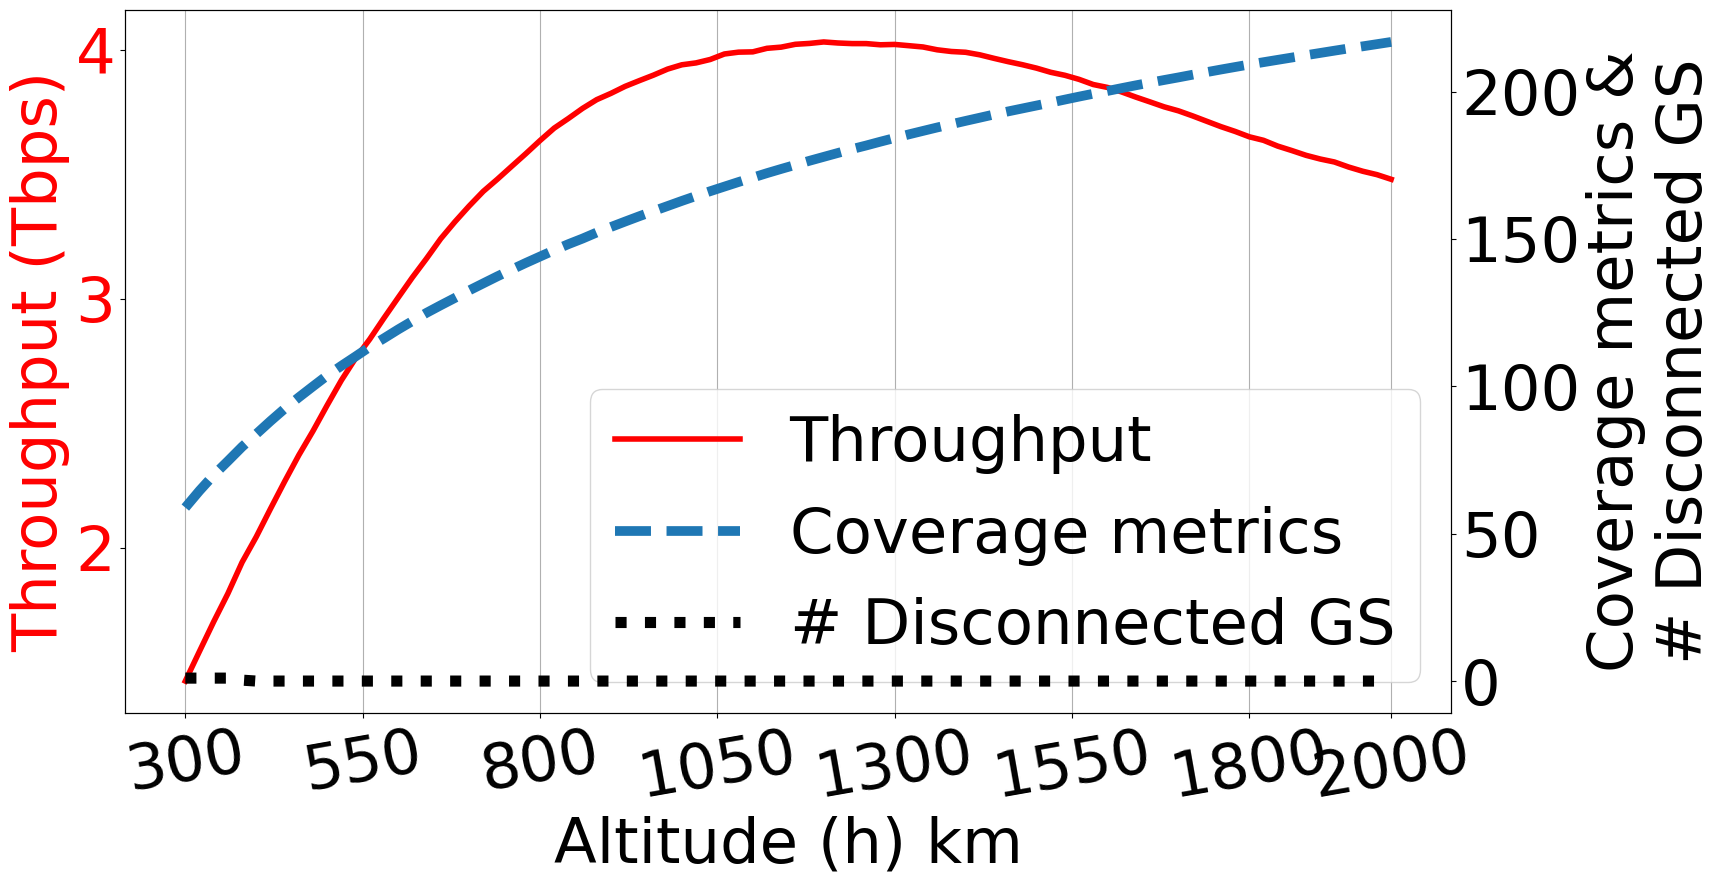

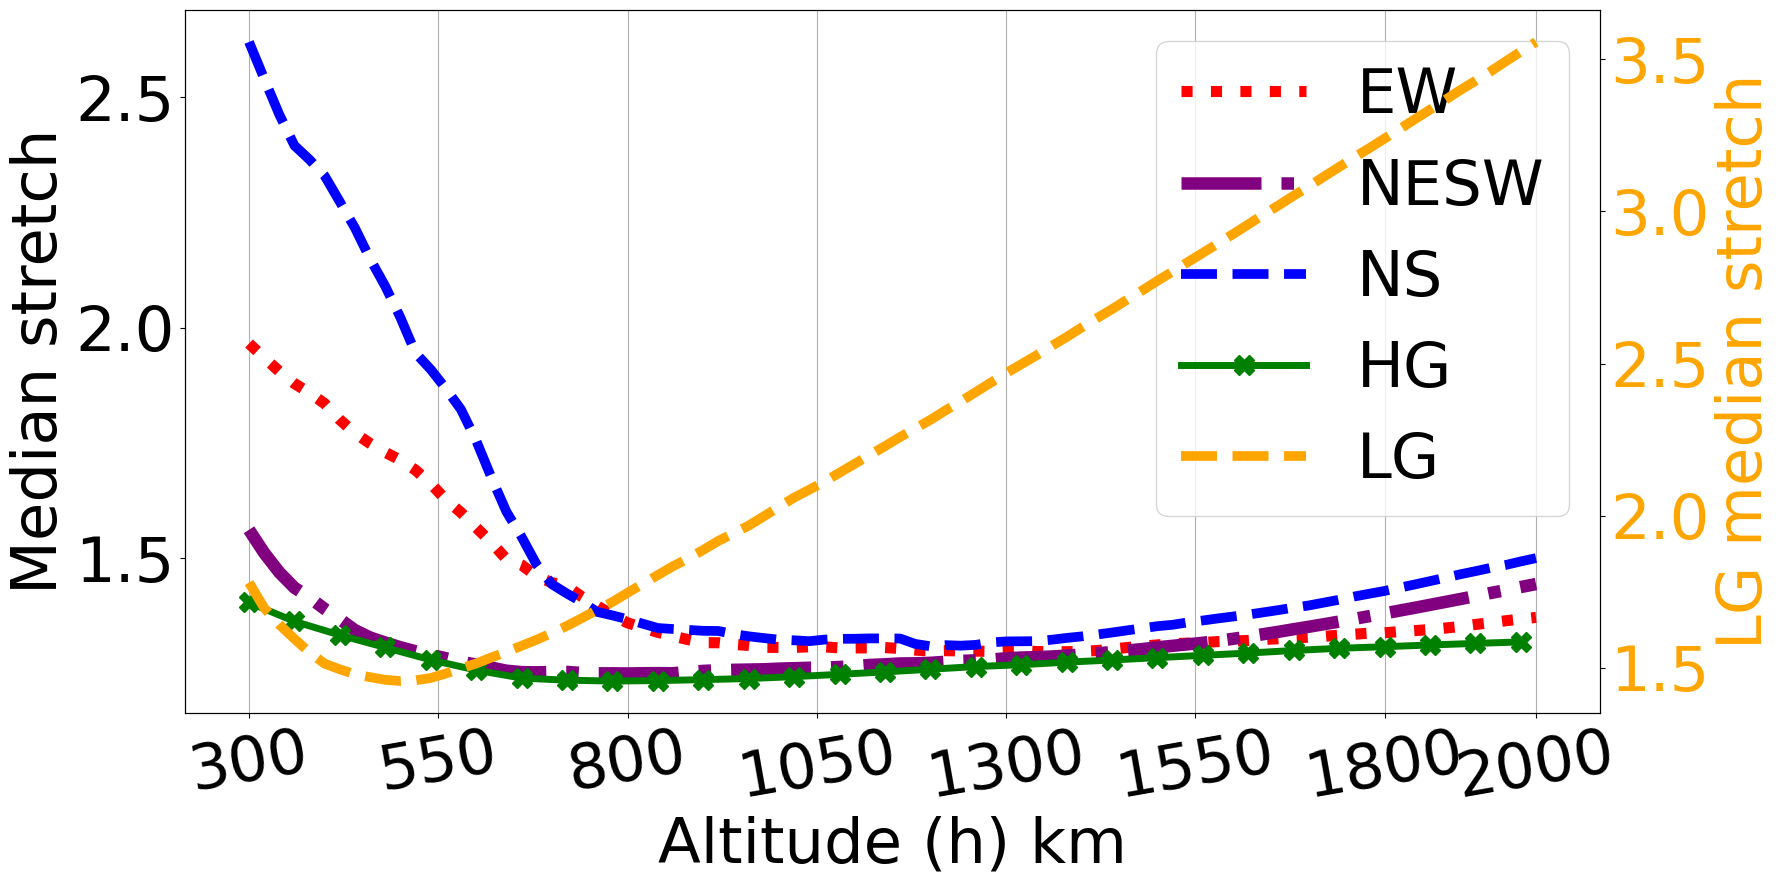

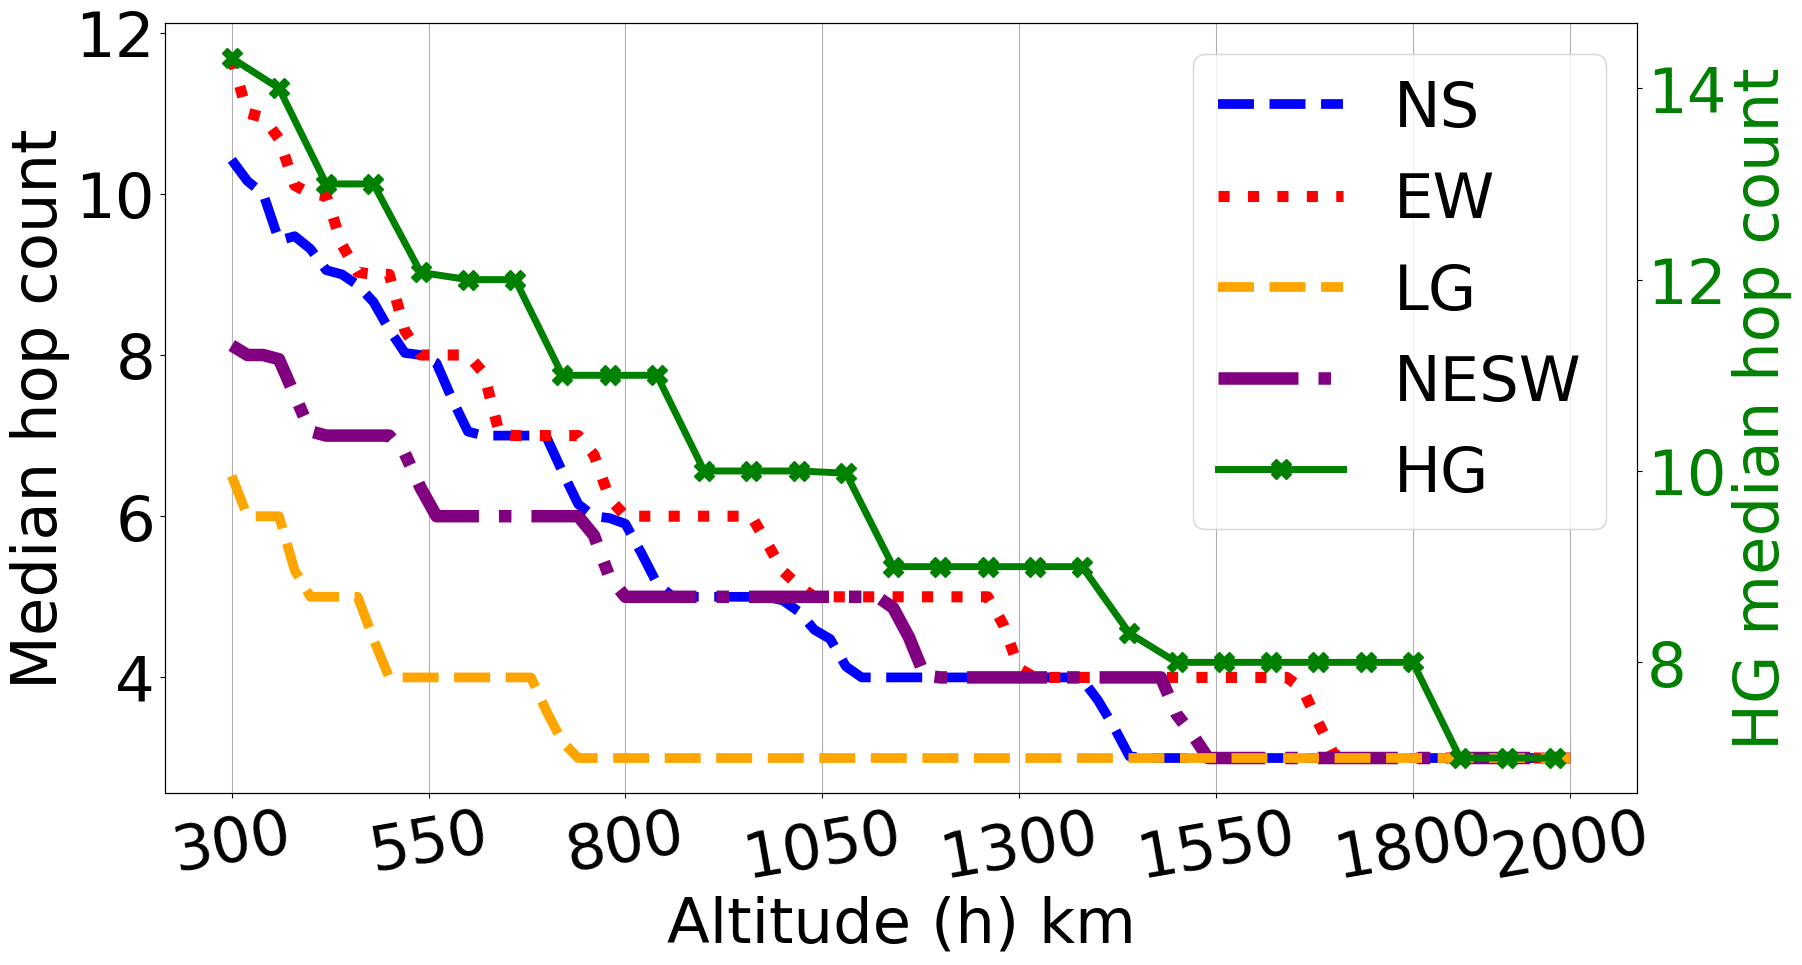

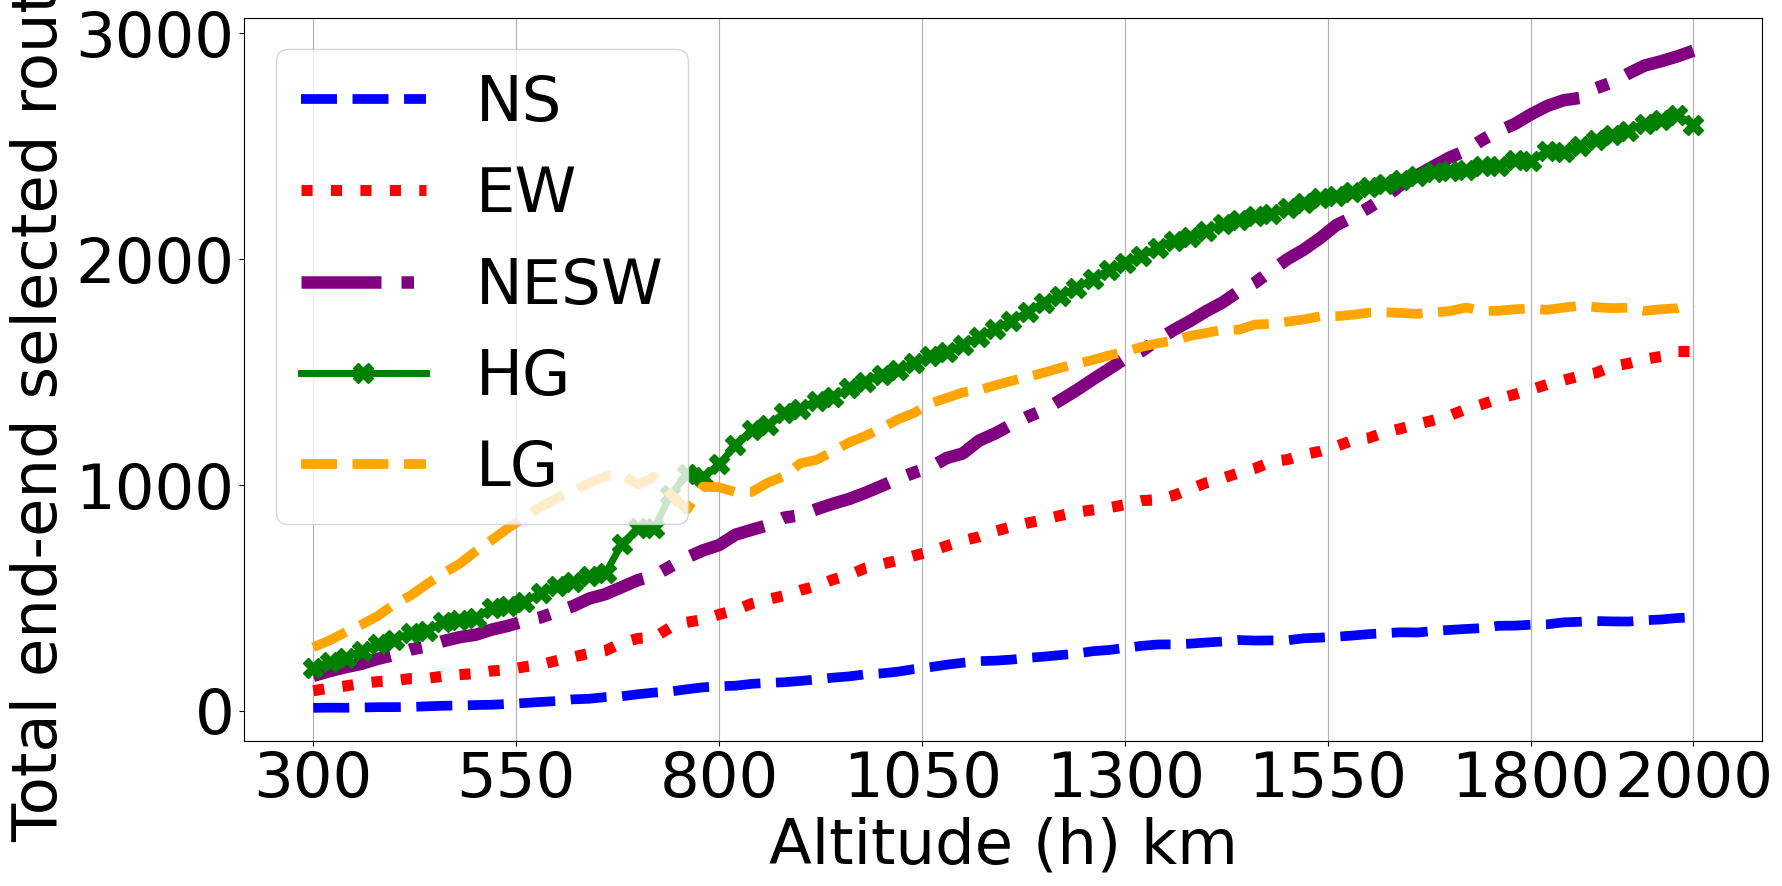

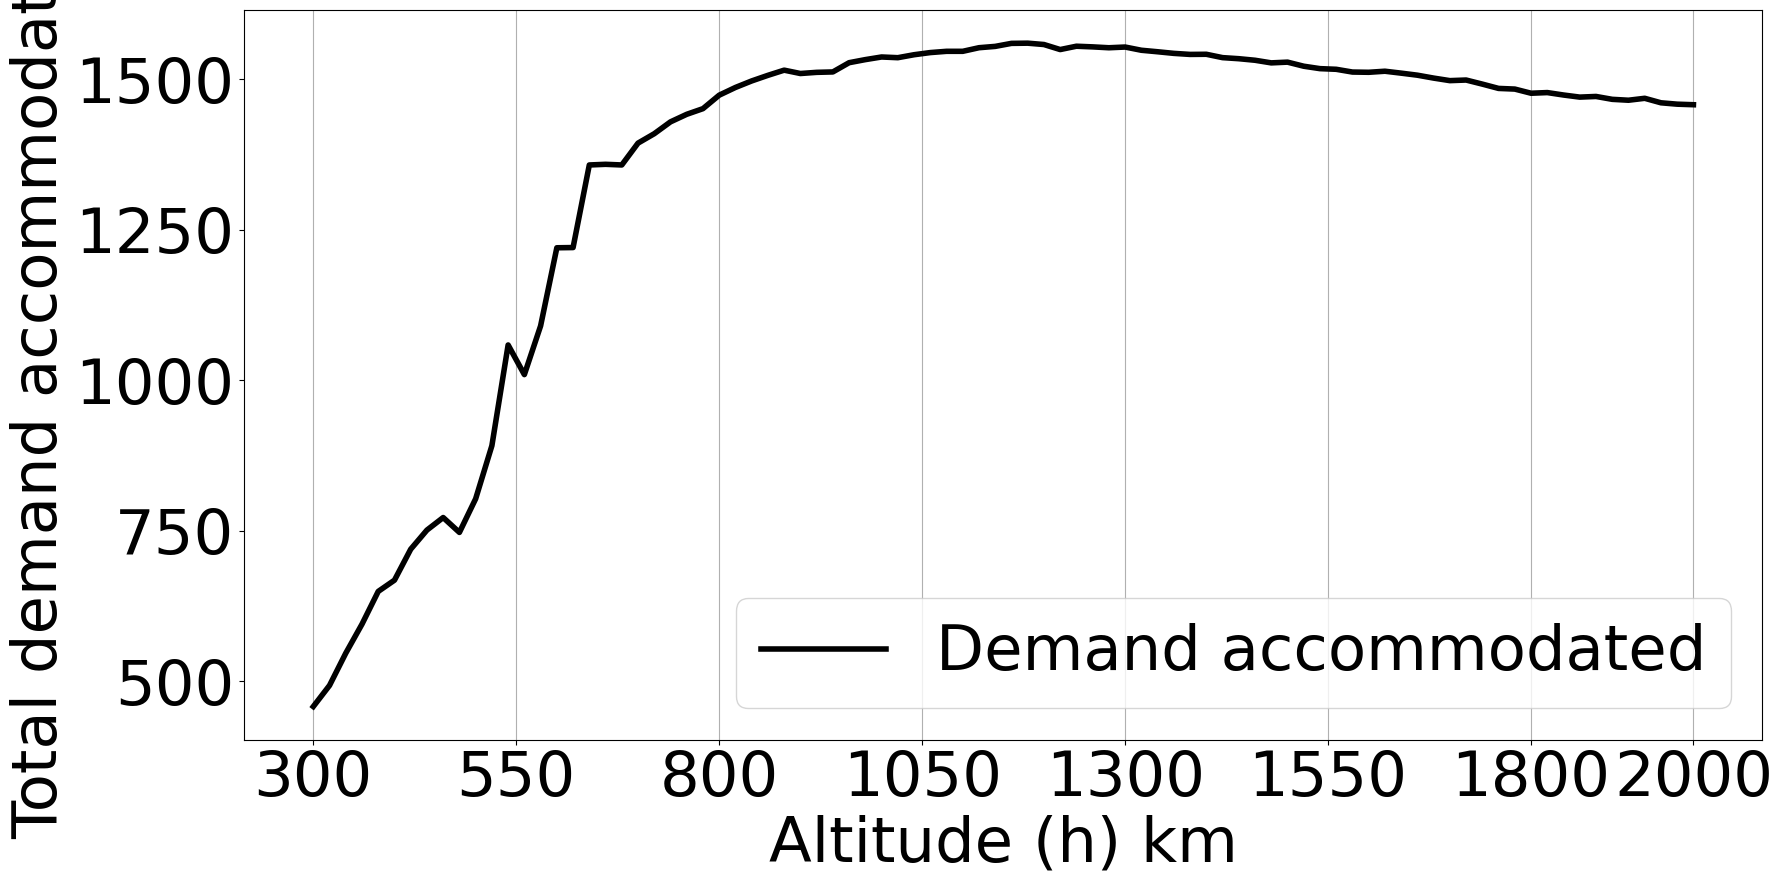

In [7]:
def plot_h(df, _df):
    df['th_POP_ONLY'] = df['th_POP_ONLY']/1000

    x_line = [h for h in range(300, 2000+1, 250)]
    x_line.append(2000)
    fig, ax1 = plt.subplots()
    ax1.set_xticks(x_line, minor=False)
    ax1.xaxis.grid(True, which='major')
    ax1.xaxis.grid(True, which='minor')
    ax1.set_xticklabels(ax1.get_xticks(), rotation=10)

    # Throughput
    ax1.set_xlabel('Altitude (h) km')
    # ax1.set_ylabel('Throughput (Tbps)')

    ax1.set_ylabel('Throughput (Tbps)', color='r')
    ax1.tick_params(axis='y', labelcolor='r')
    # line1 = ax1.plot(df['h_km'], df['th_POP_GDP'],
    #                  label='Population GDP TM', color='r', linewidth=2)
    line2 = ax1.plot(df['h_km'],    df['th_POP_ONLY'],
                     label='Throughput',    color='r',    linewidth=4)
    ax1.tick_params(axis='y')

    # Coverage
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    # we already handled the x-label with ax1
    ax2.set_ylabel('Coverage metrics &\n# Disconnected GS')
    line3 = ax2.plot(df['h_km'], df['cov'],
                     label='Coverage metrics', linestyle='dashed', linewidth=7)
    line4 = ax2.plot(df['h_km'], df['dead_cnt'], label='# Disconnected GS',
                     linestyle='dotted', color='black', linewidth=8)
    ax2.tick_params(axis='y')

    # lines = line1+line2+line3+line4
    lines = line2+line3+line4
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels)
    fig.tight_layout()
    # plt.savefig('figures/h/default_h_thpop.png')
    plt.show()

    # Stretch
    fig, ax1 = plt.subplots()
    ax1.set_xticks(x_line, minor=False)
    ax1.xaxis.grid(True, which='major')
    ax1.xaxis.grid(True, which='minor')
    ax1.set_xticklabels(ax1.get_xticks(), rotation=10)

    ax1.set_xlabel('Altitude (h) km')
    ax1.set_ylabel('Median stretch')
    line1 = ax1.plot(df['h_km'], df['EW_sth'], label='EW',
                     color='Red', linewidth=8, linestyle='dotted')
    line2 = ax1.plot(df['h_km'], df['NESW_sth'], label='NESW',
                     color='Purple', linewidth=9, linestyle='dashdot')
    line4 = ax1.plot(_df['h_km'], _df['HG_sth'], label='HG',
                     color='Green', linewidth=5, linestyle='solid', marker='X', ms=15)
    line3 = ax1.plot(df['h_km'], df['NS_sth'], label='NS',
                     color='Blue', linewidth=7, linestyle='dashed')

    ax1.tick_params(axis='y')
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    # we already handled the x-label with ax1
    ax2.tick_params(axis='y', labelcolor='Orange')
    ax2.set_ylabel('LG median stretch', color='Orange')

    line5 = ax2.plot(df['h_km'], df['LG_sth'], label='LG',
                     color='Orange', linewidth=7, linestyle='dashed')
    ax2.tick_params(axis='y')

    lines = line1+line2+line3+line4+line5
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels)
    fig.tight_layout()
    # plt.savefig('figures/h/default_h_sth.png')
    plt.show()

    # Hop count
    _, ax1 = plt.subplots()
    ax1.set_xticks(x_line, minor=False)
    ax1.xaxis.grid(True, which='major')
    ax1.xaxis.grid(True, which='minor')
    ax1.set_xticklabels(ax1.get_xticks(), rotation=10)

    ax1.set_xlabel("Altitude (h) km")
    ax1.set_ylabel("Median hop count")

    line1 = ax1.plot(df['h_km'], df['NS_cnt'], label='NS',
                     color='Blue', linewidth=7, linestyle='dashed')
    line2 = ax1.plot(df['h_km'], df['EW_cnt'], label='EW',
                     color='Red', linewidth=8, linestyle='dotted')
    line4 = ax1.plot(df['h_km'], df['NESW_cnt'], label='NESW',
                     color='Purple', linewidth=9, linestyle='dashdot')
    line3 = ax1.plot(df['h_km'], df['LG_cnt'], label='LG',
                     color='Orange', linewidth=7, linestyle='dashed')

    ax2 = ax1.twinx()
    ax2.set_ylabel('HG median hop count', color='Green')
    ax2.tick_params(axis='y', labelcolor='Green')
    line5 = ax2.plot(_df['h_km'], _df['HG_cnt'], label='HG',
                     color='Green', linewidth=5, linestyle='solid', marker='X', ms=15)

    lines = line1+line2+line3+line4+line5
    labels = [l.get_label() for l in lines]

    plt.legend(lines, labels)
    fig.tight_layout()
    # plt.savefig('figures/h/default_h_hcnt.png')
    plt.show()

    # Total end to end selected routes
    fig, ax1 = plt.subplots()

    ax1.set_xticks(x_line, minor=False)
    ax1.xaxis.grid(True, which='major')
    ax1.xaxis.grid(True, which='minor')
    ax1.set_xlabel("Altitude (h) km")
    ax1.set_ylabel("Total end-end selected routes")

    ax1.plot(df['h_km'], df['NS_selt'], label='NS',
             color='Blue', linewidth=7, linestyle='dashed')
    ax1.plot(df['h_km'], df['EW_selt'], label='EW',
             color='Red', linewidth=8, linestyle='dotted')
    ax1.plot(df['h_km'], df['NESW_selt'], label='NESW',
             color='Purple', linewidth=9, linestyle='dashdot')
    ax1.plot(df['h_km'], df['HG_selt'], label='HG', color='Green',
             linewidth=5, linestyle='solid', marker='X', ms=15)
    ax1.plot(df['h_km'], df['LG_selt'], label='LG',
             color='Orange', linewidth=7, linestyle='dashed')
    ax1.legend()
    plt.tight_layout()
    plt.show()

    # Total demand accommodated
    fig, ax1 = plt.subplots()

    ax1.set_xticks(x_line, minor=False)
    ax1.xaxis.grid(True, which='major')
    ax1.xaxis.grid(True, which='minor')
    ax1.set_xlabel("Altitude (h) km")
    ax1.set_ylabel("Total demand accommodated")
    ax1.plot(df['h_km'], df['ttl_accm_flw'],
             label='Demand accommodated', color='black', linewidth=4)
    ax1.legend()
    plt.tight_layout()
    plt.show()


df = pd.read_csv(
    'CSVs/explore_search_space/default_h.csv').sort_values(by='h_km')
_df = df.iloc[::3]
plot_h(df, _df)

## Shell inclination change

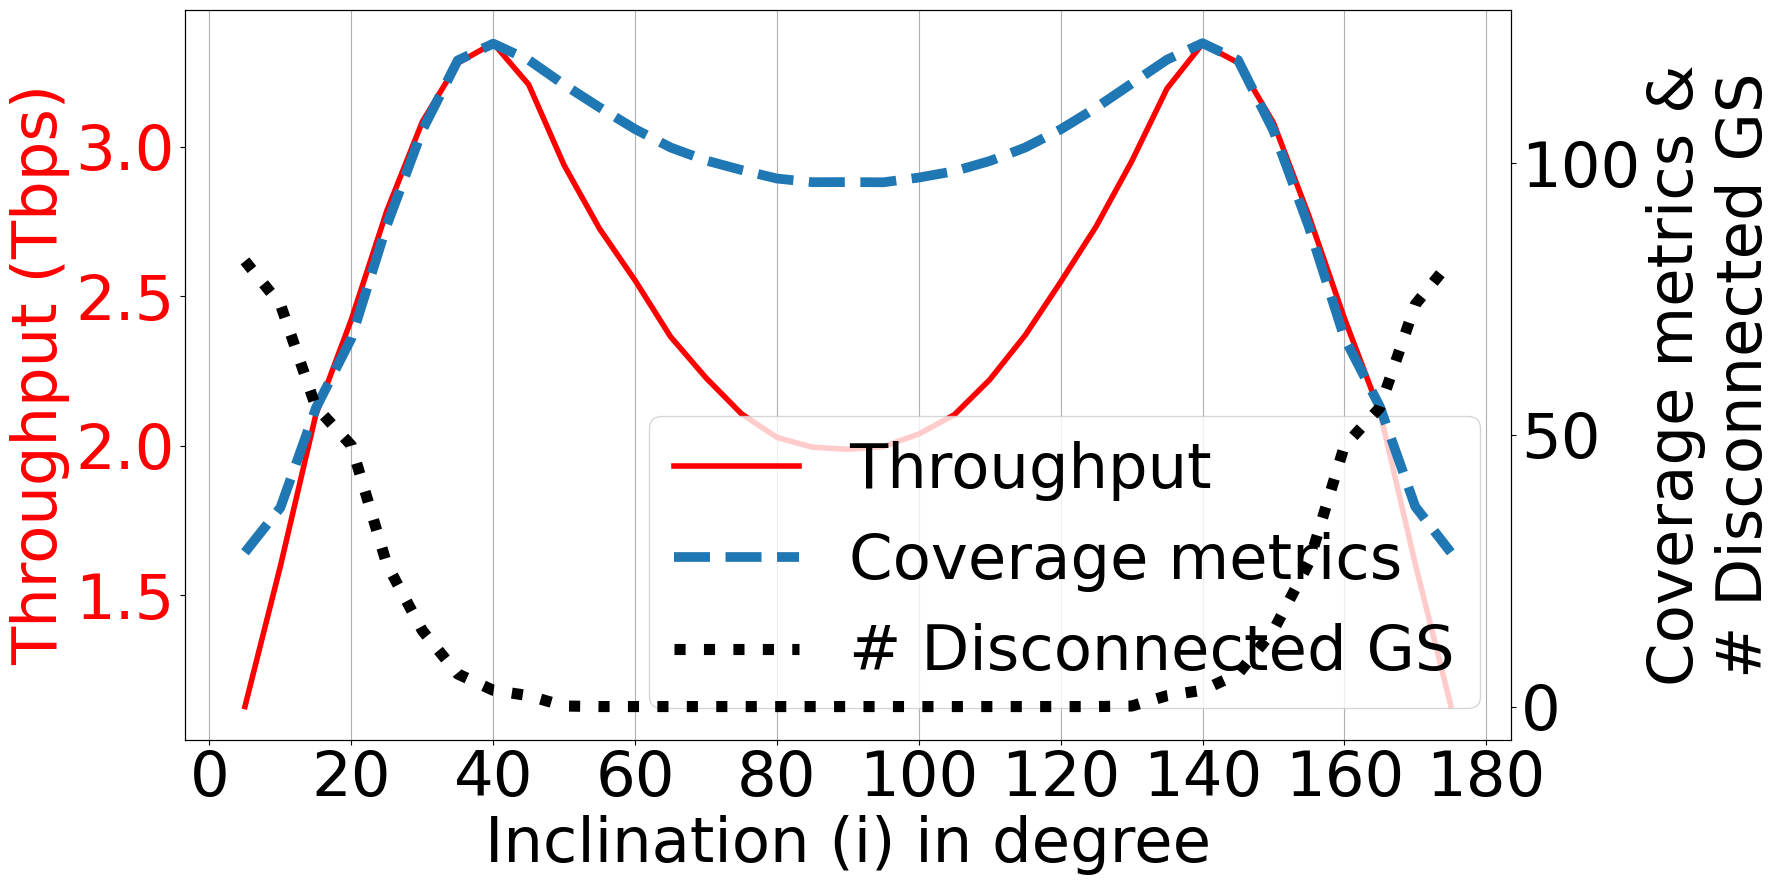

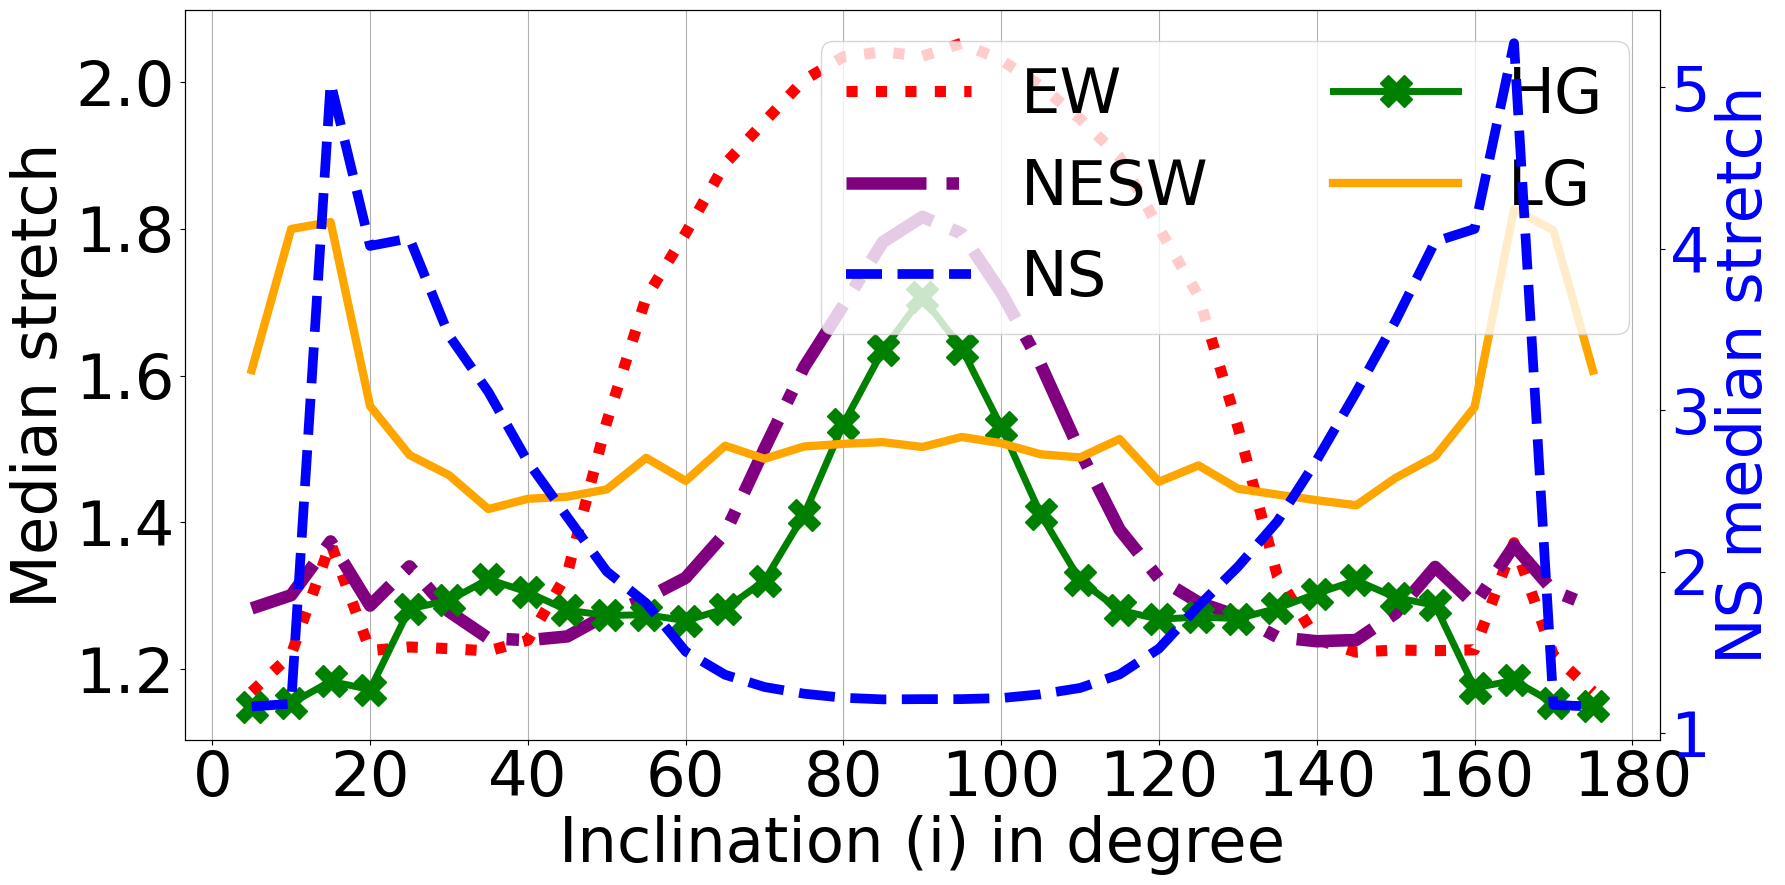

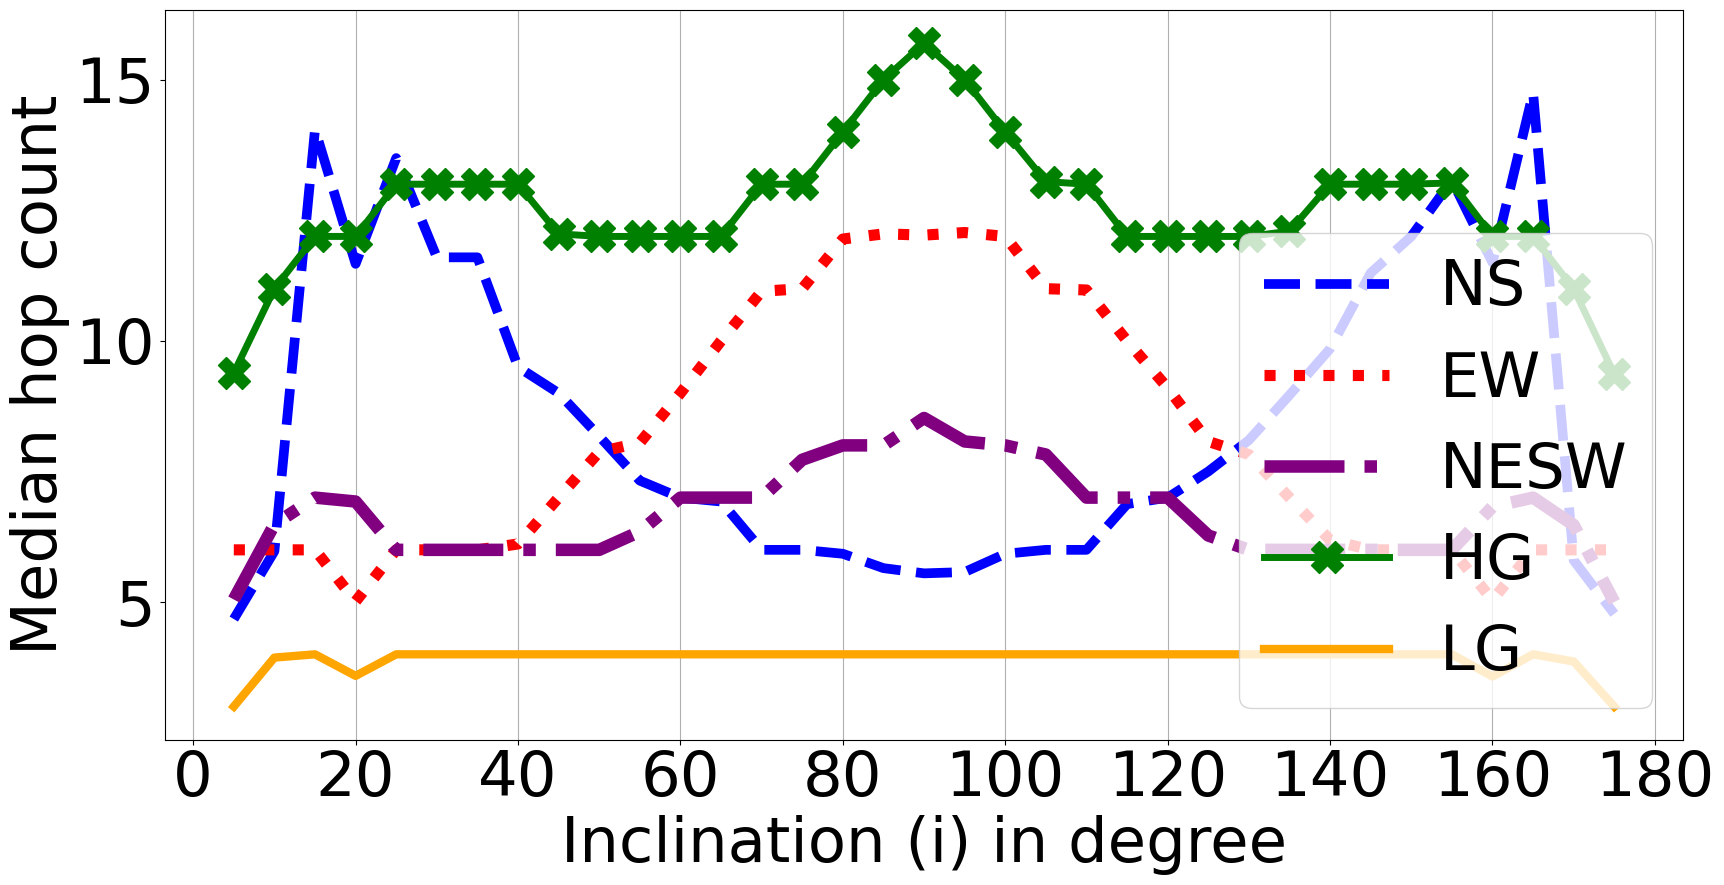

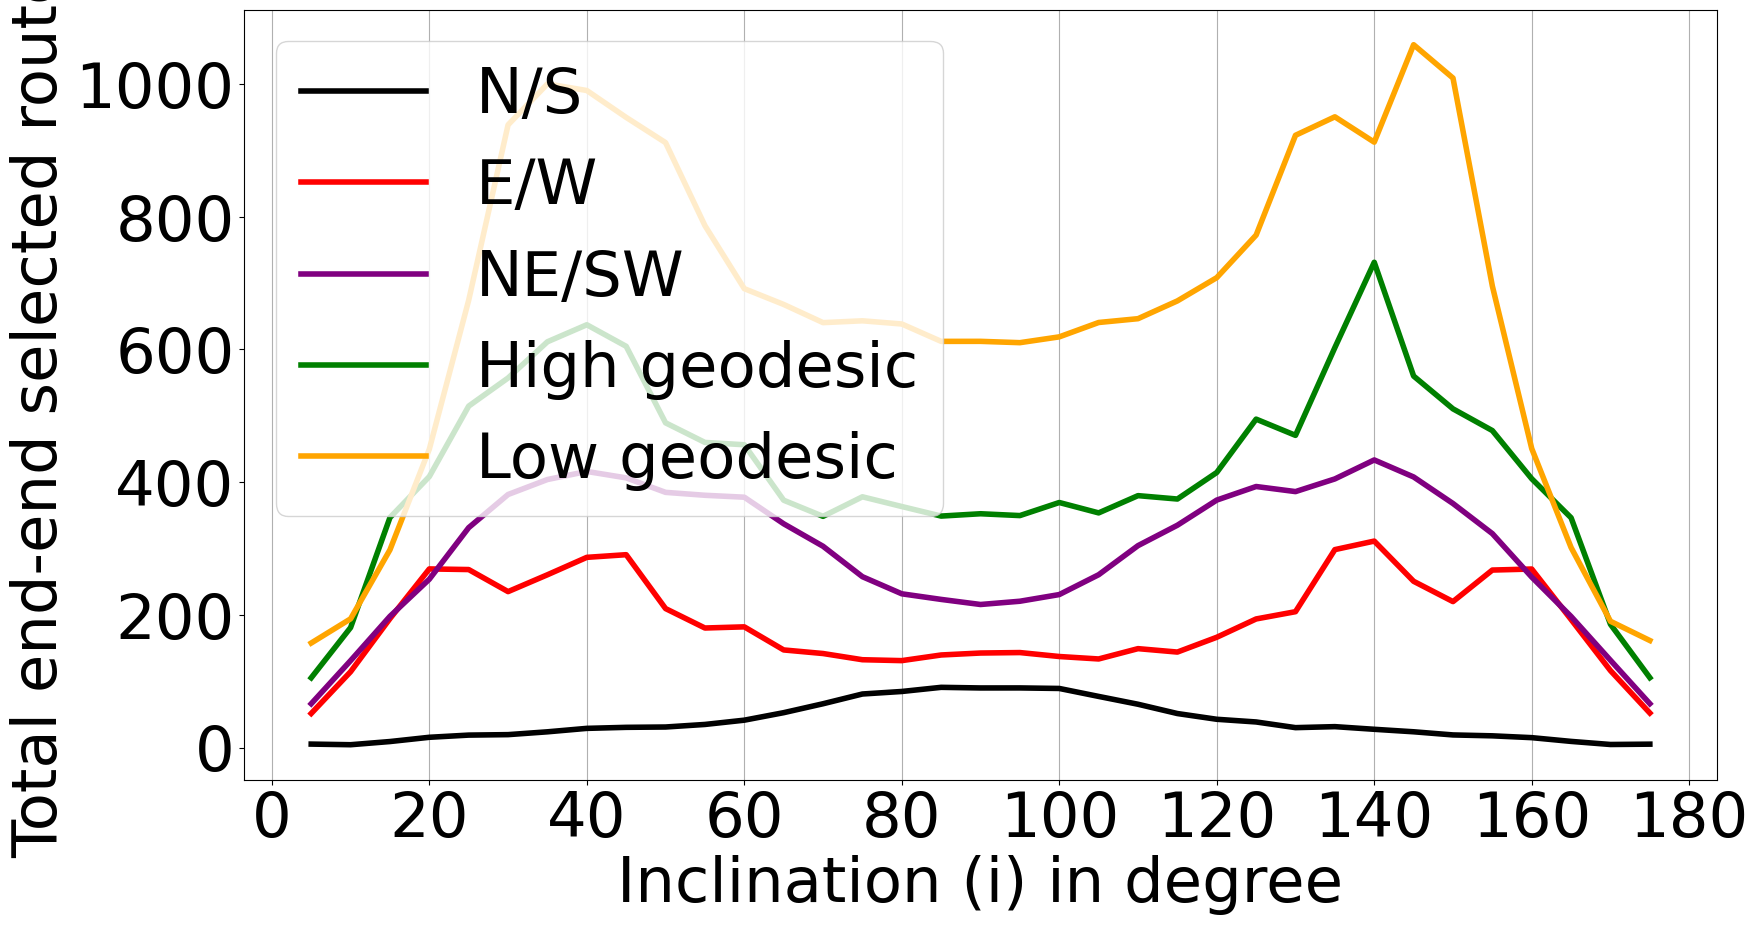

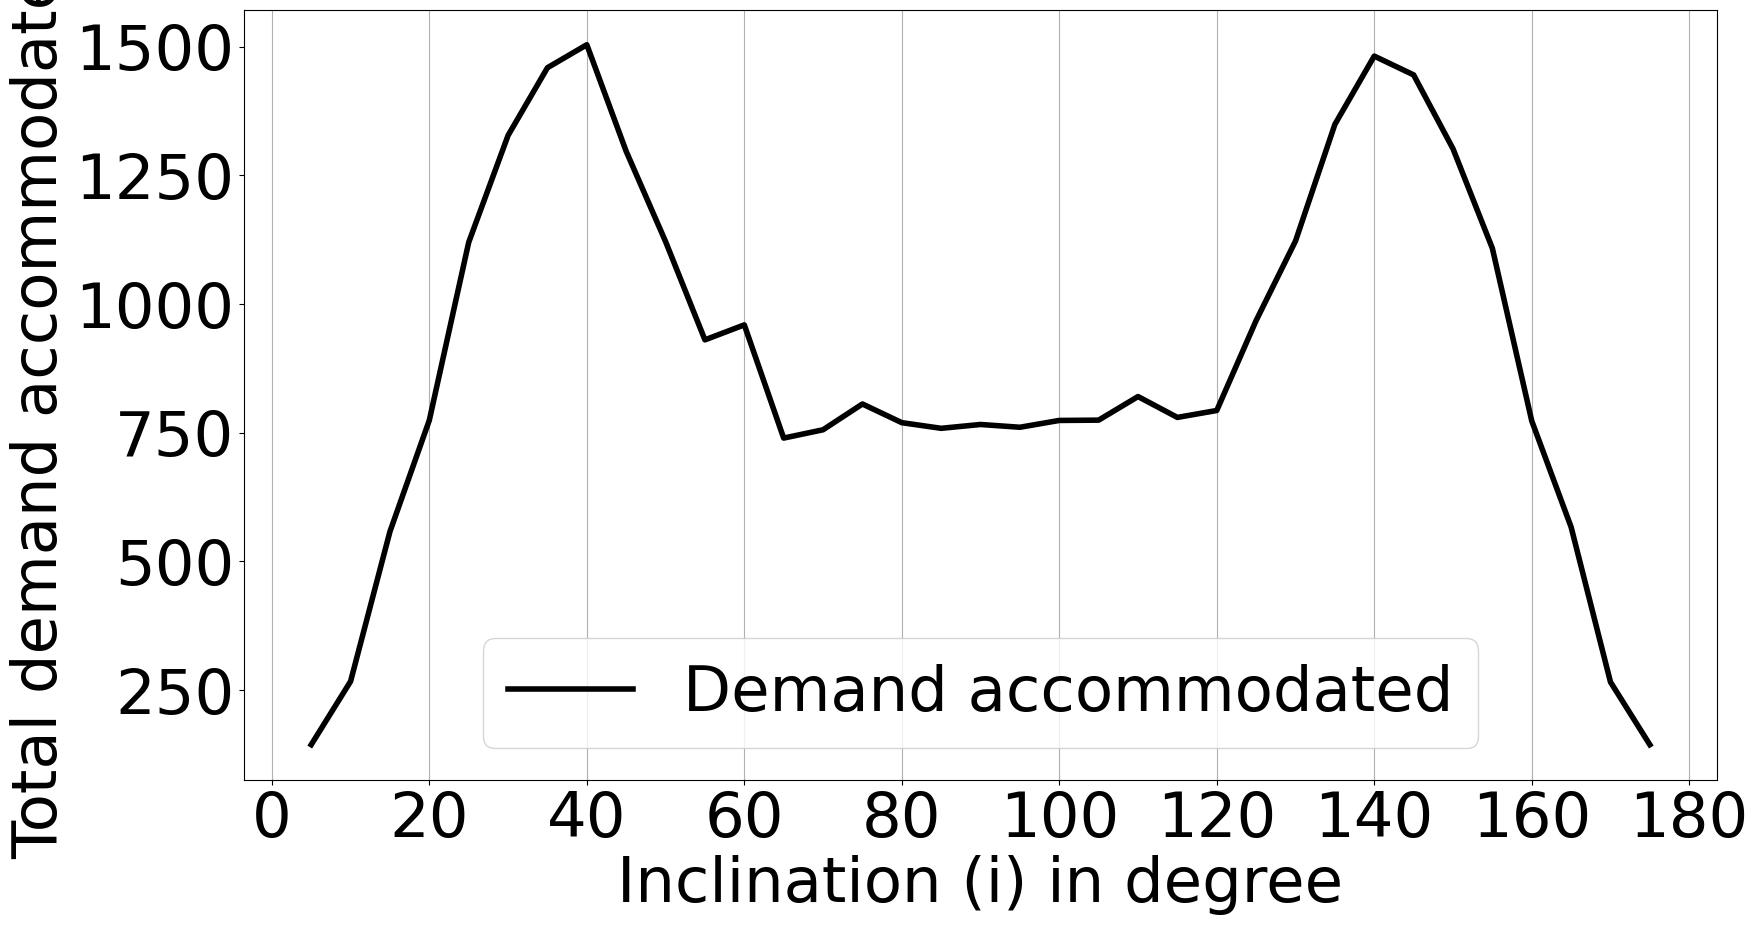

In [10]:
def plot_i(df):
    df['th_POP_ONLY'] = df['th_POP_ONLY']/1000
    x_line = [i for i in range(0, 180+1, 20)]
    fig, ax1 = plt.subplots()
    ax1.set_xticks(x_line, minor=False)
    ax1.xaxis.grid(True, which='major')
    ax1.xaxis.grid(True, which='minor')

    # Throughput
    ax1.set_xlabel('Inclination (i) in degree')
    
    ax1.set_ylabel('Throughput (Tbps)', color='r')
    ax1.tick_params(axis='y', labelcolor='r')
    
    # line1 = ax1.plot(df['i'], df['th_POP_GDP'],
    #                  label='Population GDP TM', color='r', linewidth=2)
    line2 = ax1.plot(df['i'], df['th_POP_ONLY'],
                     label='Throughput', color='r', linewidth=4)
    ax1.tick_params(axis='y')

    # Coverage
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    # we already handled the x-label with ax1
    ax2.set_ylabel('Coverage metrics &\n# Disconnected GS')
    line3 = ax2.plot(df['i'], df['cov'], label='Coverage metrics', linestyle='dashed', linewidth=7)
    line4 = ax2.plot(df['i'], df['dead_cnt'], label='# Disconnected GS', linestyle='dotted', color='black', linewidth=8)
    ax2.tick_params(axis='y')
    fig.tight_layout()
    # lines = line1+line2+line3+line4
    lines = line2+line3+line4
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels,loc=4)
    plt.tight_layout()
    # plt.savefig('figures/i/default_i_thpop.png')
    plt.show()

    # Stretch
    fig, ax1 = plt.subplots()

    ax1.set_xticks(x_line, minor=False)
    ax1.xaxis.grid(True, which='major')
    ax1.xaxis.grid(True, which='minor')
    ax1.set_xlabel('Inclination (i) in degree')
    ax1.set_ylabel('Median stretch')
    line1 = ax1.plot(df['i'], df['EW_sth'], label='EW', color='Red',  linewidth=8, linestyle='dotted')
    line2 = ax1.plot(df['i'], df['NESW_sth'], label='NESW', color='Purple', linewidth=9, linestyle='dashdot')
    line4 = ax1.plot(df['i'], df['HG_sth'], label='HG', color='Green', linewidth=5, linestyle='solid', marker='X', ms=23 )
    line5 = ax1.plot(df['i'], df['LG_sth'], label='LG', color='Orange', linewidth=6)
    ax1.tick_params(axis='y')
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    # we already handled the x-label with ax1
    # ax2.set_ylabel('NS median stretch')
    
    ax2.set_ylabel('NS median stretch', color='Blue')
    ax2.tick_params(axis='y', labelcolor='Blue')
    
    line3 = ax2.plot(df['i'], df['NS_sth'], label='NS', color='Blue', linewidth=7, linestyle='dashed')
    ax2.tick_params(axis='y')
    fig.tight_layout()
    lines = line1+line2+line3+line4+line5
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels, ncol=2)
    plt.tight_layout()
    # plt.savefig('figures/i/default_i_sth.png')
    plt.show()

    # Hop count
    _, ax = plt.subplots()
    ax.set_xticks(x_line, minor=False)
    ax.xaxis.grid(True, which='major')
    ax.xaxis.grid(True, which='minor')
    plt.xlabel("Inclination (i) in degree")
    plt.ylabel("Median hop count")
    plt.plot(df['i'], df['NS_cnt'], label='NS', color='Blue',linewidth=7, linestyle='dashed')
    plt.plot(df['i'], df['EW_cnt'], label='EW', color='Red',linewidth=8, linestyle='dotted')
    plt.plot(df['i'], df['NESW_cnt'], label='NESW', color='Purple', linewidth=9, linestyle='dashdot')
    plt.plot(df['i'], df['HG_cnt'], label='HG', color='Green', linewidth=5, linestyle='solid', marker='X', ms=23 )
    plt.plot(df['i'], df['LG_cnt'], label='LG', color='Orange', linewidth=6)
    plt.legend(loc=4)
    plt.tight_layout()
    # plt.savefig('figures/i/default_i_hcnt.png')
    plt.show()


    # Total end to end selected routes
    fig, ax1 = plt.subplots()

    ax1.set_xticks(x_line, minor=False)
    ax1.xaxis.grid(True, which='major')
    ax1.xaxis.grid(True, which='minor')
    ax1.set_xlabel("Inclination (i) in degree")
    ax1.set_ylabel("Total end-end selected routes")

    ax1.plot(df['i'], df['NS_selt'], label='N/S',color='black', linewidth=4)
    ax1.plot(df['i'], df['EW_selt'], label='E/W', color='Red', linewidth=4)
    ax1.plot(df['i'], df['NESW_selt'], label='NE/SW', color='Purple', linewidth=4)
    ax1.plot(df['i'], df['HG_selt'], label='High geodesic', color='Green', linewidth=4)
    ax1.plot(df['i'], df['LG_selt'], label='Low geodesic', color='Orange', linewidth=4)

    ax1.legend()
    plt.show()


    # Total demand accommodated
    fig, ax1 = plt.subplots()

    ax1.set_xticks(x_line, minor=False)
    ax1.xaxis.grid(True, which='major')
    ax1.xaxis.grid(True, which='minor')
    ax1.set_xlabel("Inclination (i) in degree")
    ax1.set_ylabel("Total demand accommodated")
    ax1.plot(df['i'], df['ttl_accm_flw'], label='Demand accommodated',color='black', linewidth=4)
    ax1.legend()
    plt.show()


df = pd.read_csv('CSVs/explore_search_space/default_i.csv').sort_values(by='i')
plot_i(df)


## Shell Phase offset

Avg over orbital period


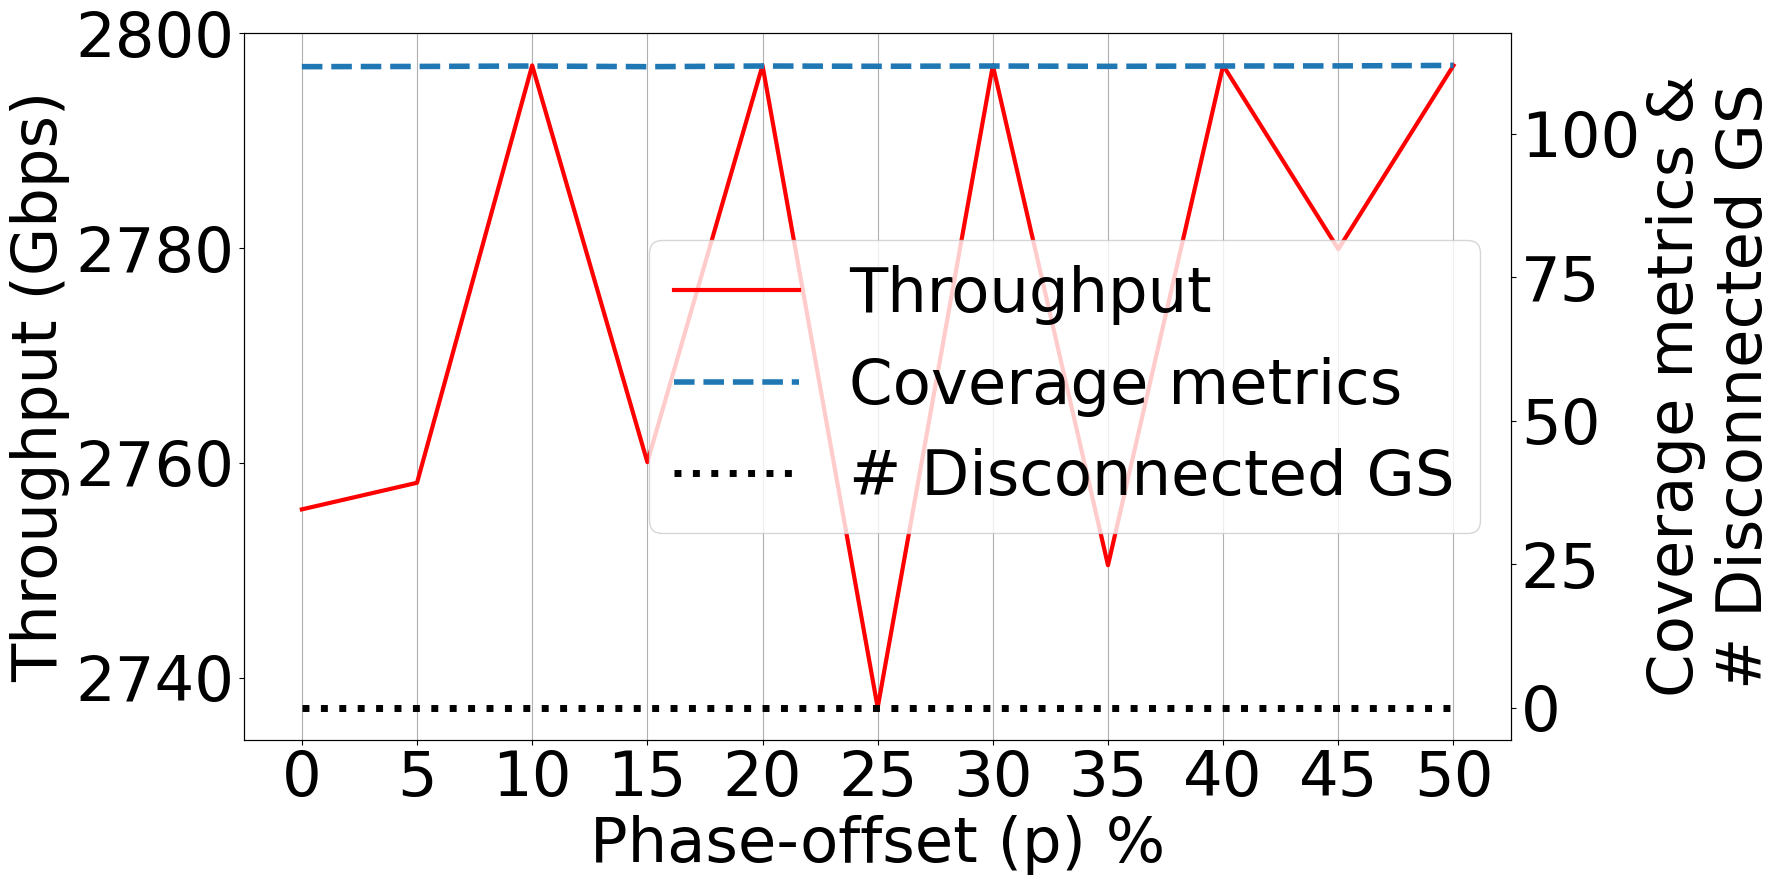

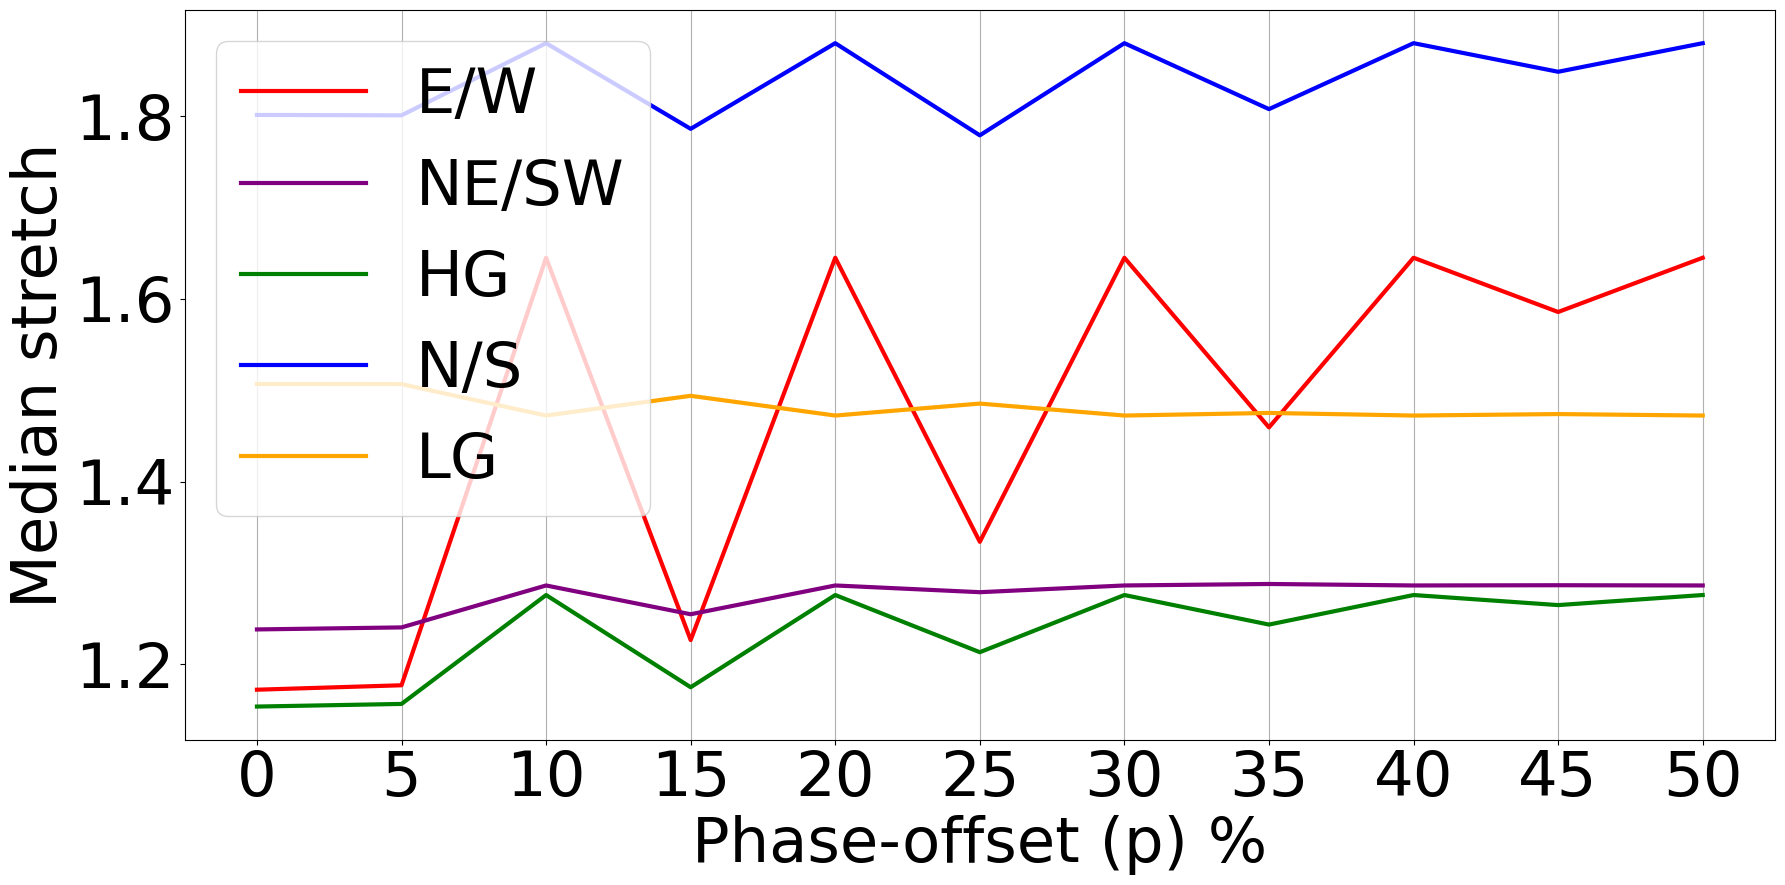

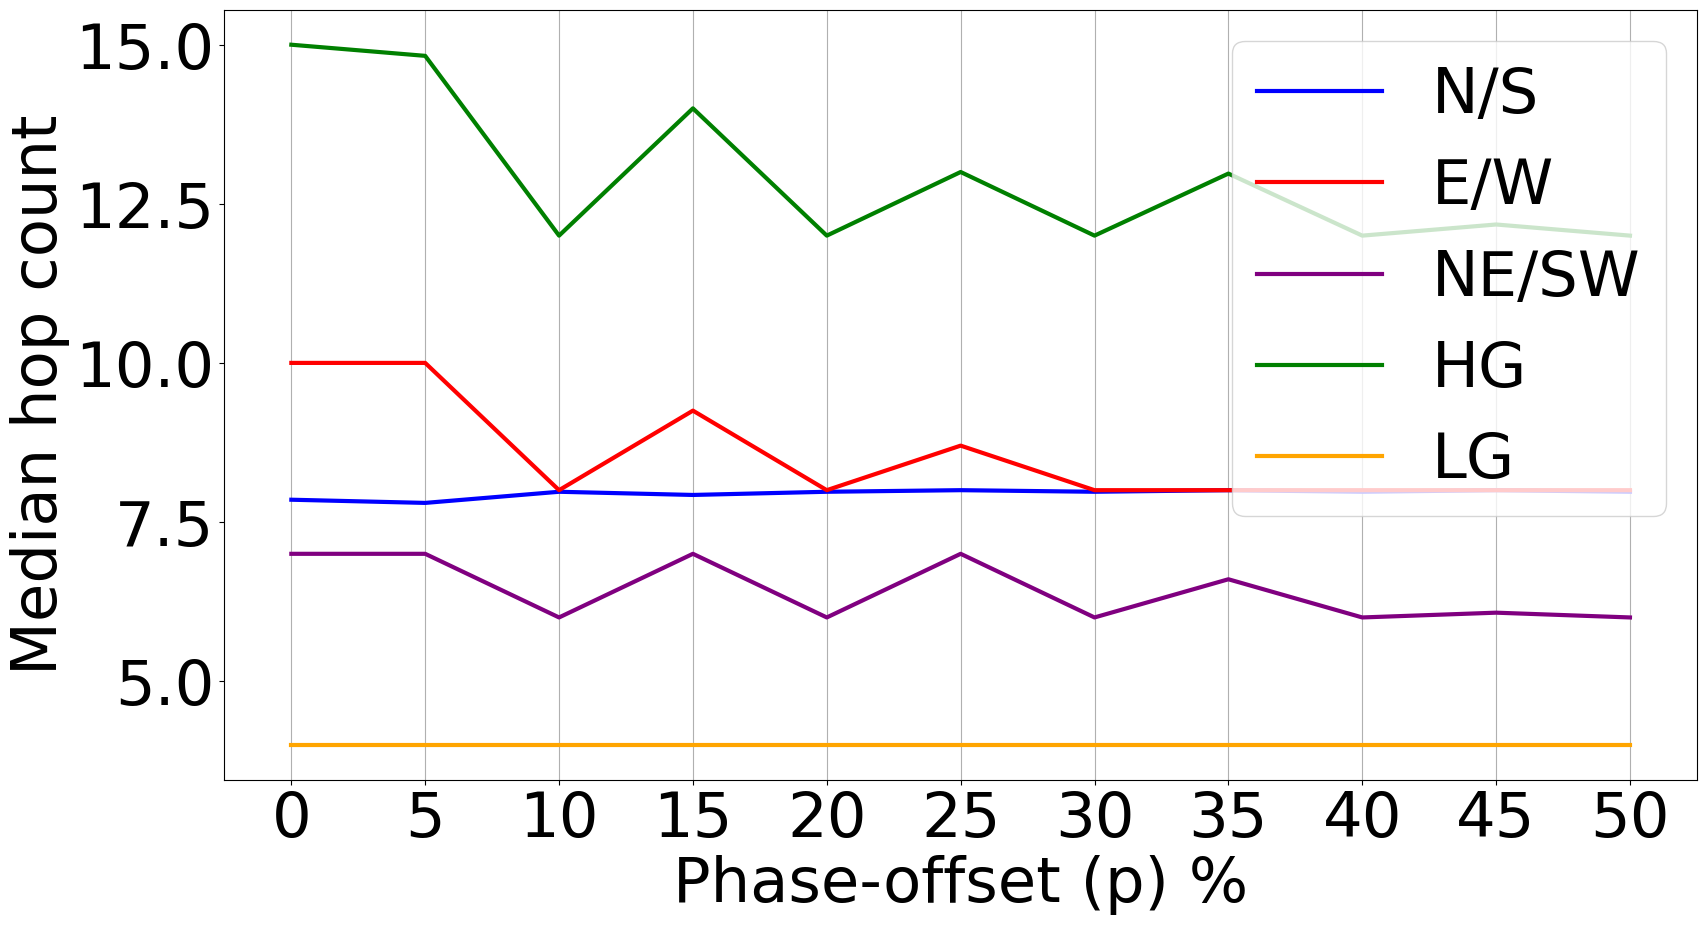

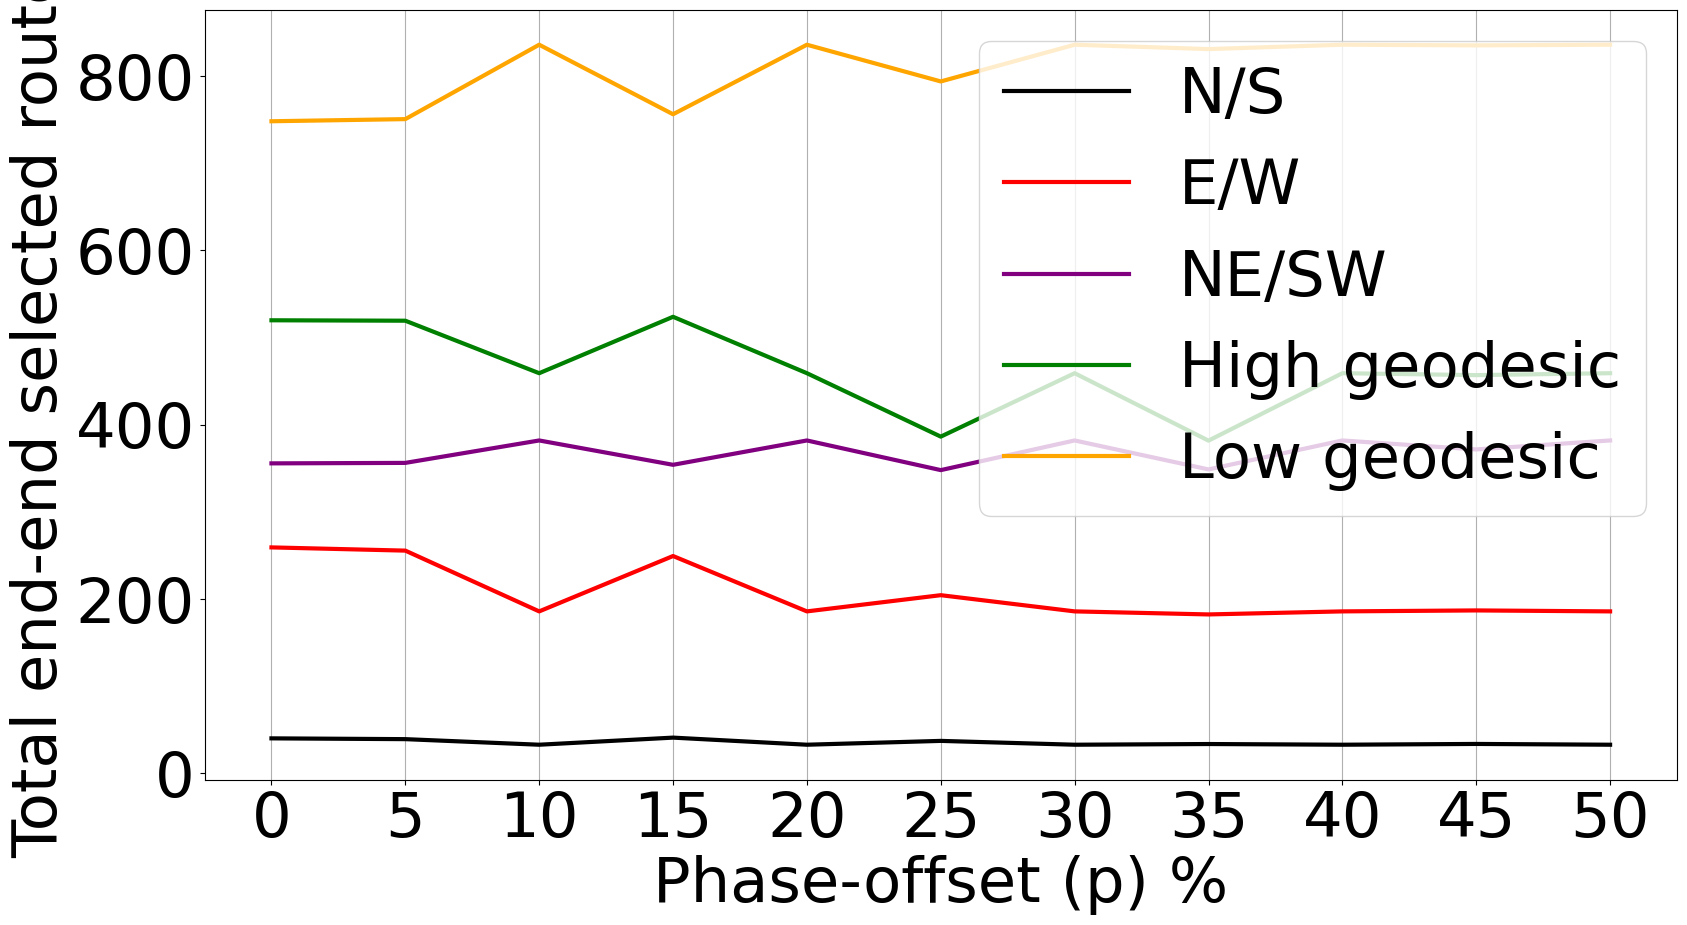

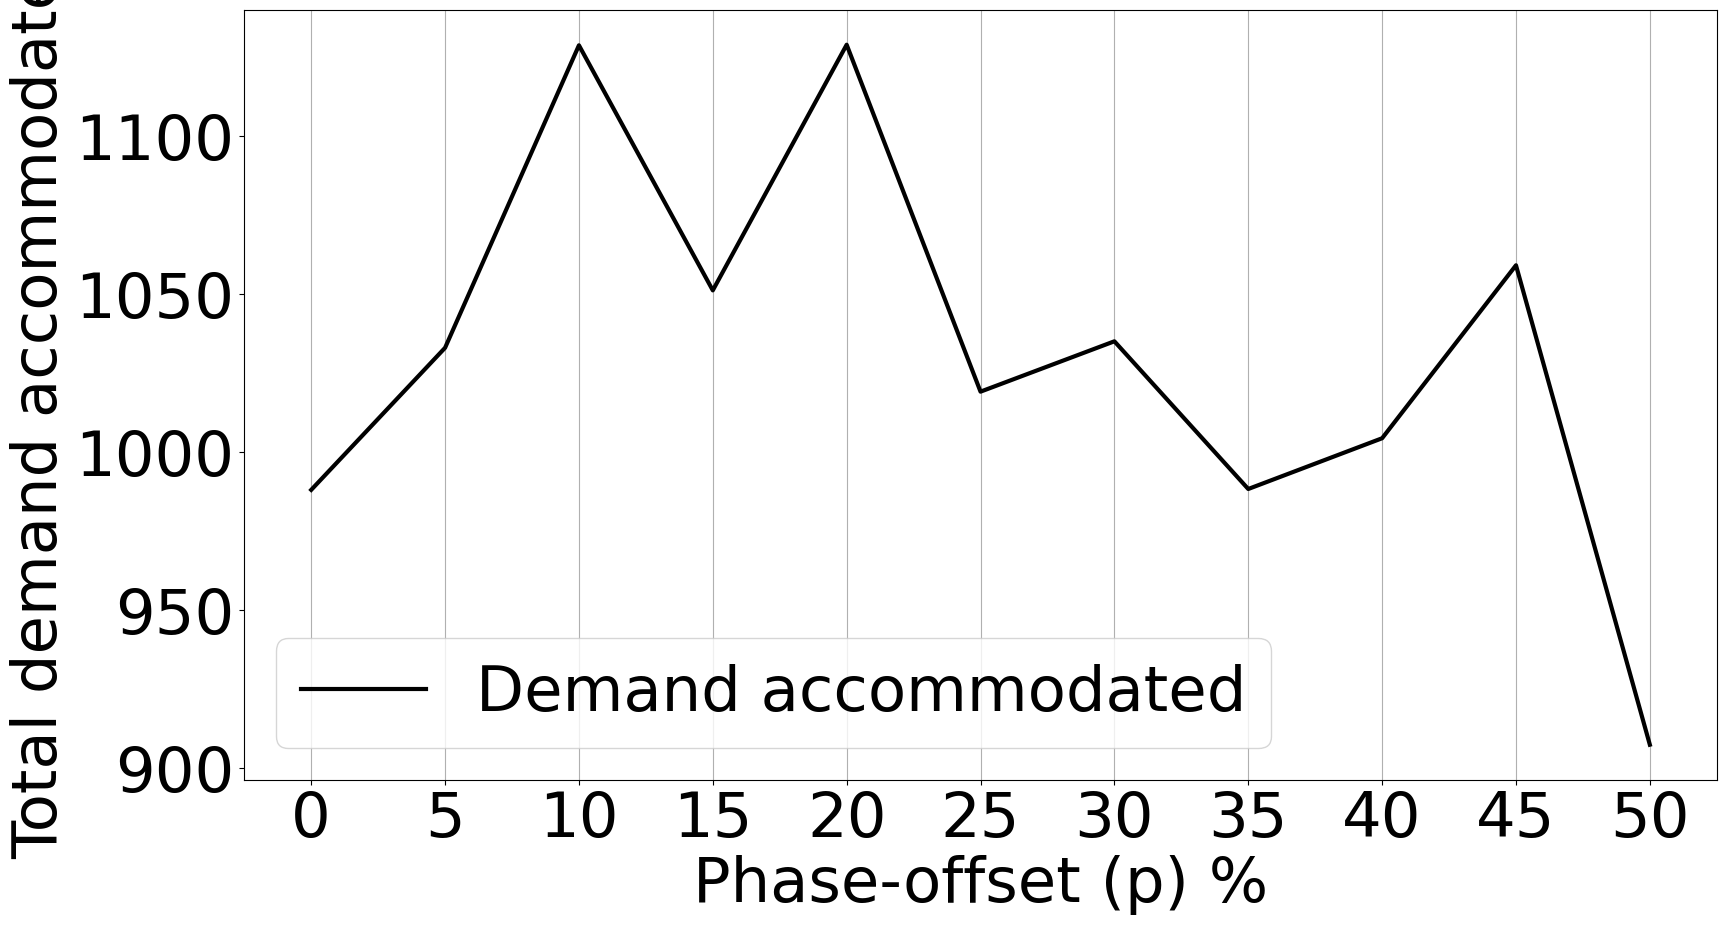

In [11]:
def plot_p(df):
    fig, ax1 = plt.subplots()
    ax1.set_xticks(df['p'], minor=False)
    ax1.xaxis.grid(True, which='major')
    ax1.xaxis.grid(True, which='minor')

    # Throughput
    ax1.set_xlabel('Phase-offset (p) %')
    ax1.set_ylabel('Throughput (Gbps)')
    # line1 = ax1.plot(df['p'], df['th_POP_GDP'],
    #                  label='Population GDP TM', color='r', linewidth=3)
    line2 = ax1.plot(df['p'], df['th_POP_ONLY'],
                     label='Throughput', color='r', linewidth=3)
    ax1.tick_params(axis='y')

    # Coverage
    ax2 = ax1.twinx()
    ax2.set_ylabel('Coverage metrics &\n# Disconnected GS')
    line3 = ax2.plot(df['p'], df['cov'], label='Coverage metrics', linestyle='dashed', linewidth=4)
    line4 = ax2.plot(df['p'], df['dead_cnt'], label='# Disconnected GS', linestyle='dotted', color='black', linewidth=5)
    ax2.tick_params(axis='y')
    fig.tight_layout()
    # lines = line1+line2+line3+line4
    lines = line2+line3+line4
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels)
    plt.show()

    # Stretch
    fig, ax1 = plt.subplots()
    ax1.set_xticks(df['p'], minor=False)
    ax1.xaxis.grid(True, which='major')
    ax1.xaxis.grid(True, which='minor')
    ax1.set_xlabel('Phase-offset (p) %')
    ax1.set_ylabel('Median stretch')
    ax1.plot(df['p'], df['EW_sth'], label='E/W', color='Red', linewidth=3)
    ax1.plot(df['p'], df['NESW_sth'], label='NE/SW', color='Purple', linewidth=3)
    ax1.plot(df['p'], df['HG_sth'], label='HG', color='Green', linewidth=3)
    ax1.plot(df['p'], df['NS_sth'], label='N/S', color='Blue', linewidth=3)
    ax1.plot(df['p'], df['LG_sth'], label='LG', color='Orange', linewidth=3)
    fig.tight_layout()
    ax1.legend()
    plt.show()

    # Hop count
    _, ax = plt.subplots()
    ax.set_xticks(df['p'], minor=False)
    ax.xaxis.grid(True, which='major')
    ax.xaxis.grid(True, which='minor')
    plt.xlabel("Phase-offset (p) %")
    plt.ylabel("Median hop count")
    plt.plot(df['p'], df['NS_cnt'], label='N/S',color='Blue', linewidth=3)
    plt.plot(df['p'], df['EW_cnt'], label='E/W', color='Red',linewidth=3)
    plt.plot(df['p'], df['NESW_cnt'], label='NE/SW', color='Purple',linewidth=3)
    plt.plot(df['p'], df['HG_cnt'], label='HG',color='Green', linewidth=3)
    plt.plot(df['p'], df['LG_cnt'], label='LG', color='Orange', linewidth=3)
    plt.legend()
    plt.show()


    # Total end to end selected routes
    fig, ax1 = plt.subplots()

    ax1.set_xticks(df['p'], minor=False)
    ax1.xaxis.grid(True, which='major')
    ax1.xaxis.grid(True, which='minor')
    ax1.set_xlabel("Phase-offset (p) %")
    ax1.set_ylabel("Total end-end selected routes")

    ax1.plot(df['p'], df['NS_selt'], label='N/S',color='black', linewidth=3)
    ax1.plot(df['p'], df['EW_selt'], label='E/W', color='Red', linewidth=3)
    ax1.plot(df['p'], df['NESW_selt'], label='NE/SW', color='Purple', linewidth=3)
    ax1.plot(df['p'], df['HG_selt'], label='High geodesic', color='Green', linewidth=3)
    ax1.plot(df['p'], df['LG_selt'], label='Low geodesic', color='Orange', linewidth=3)

    ax1.legend()
    plt.show()


    # Total demand accommodated
    fig, ax1 = plt.subplots()

    ax1.set_xticks(df['p'], minor=False)
    ax1.xaxis.grid(True, which='major')
    ax1.xaxis.grid(True, which='minor')
    ax1.set_xlabel("Phase-offset (p) %")
    ax1.set_ylabel("Total demand accommodated")
    ax1.plot(df['p'], df['ttl_accm_flw'], label='Demand accommodated',color='black', linewidth=3)
    ax1.legend()
    plt.show()


print('Avg over orbital period')
df = pd.read_csv('CSVs/explore_search_space/default_p.csv').sort_values(by='p')
plot_p(df)

## Shell AoE

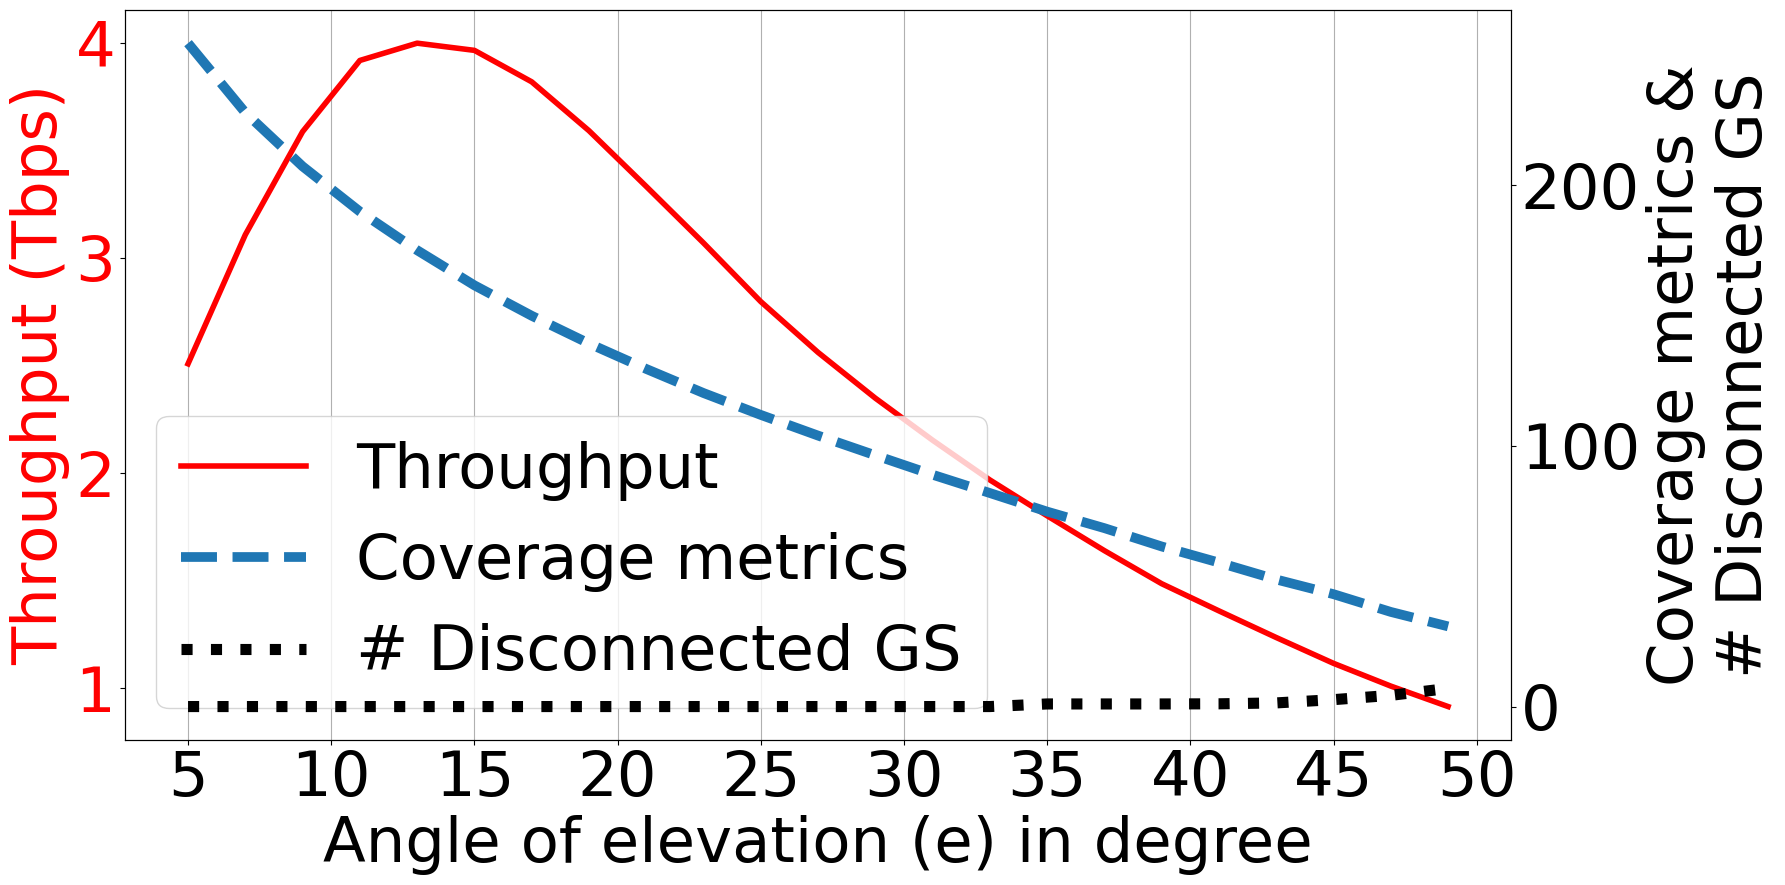

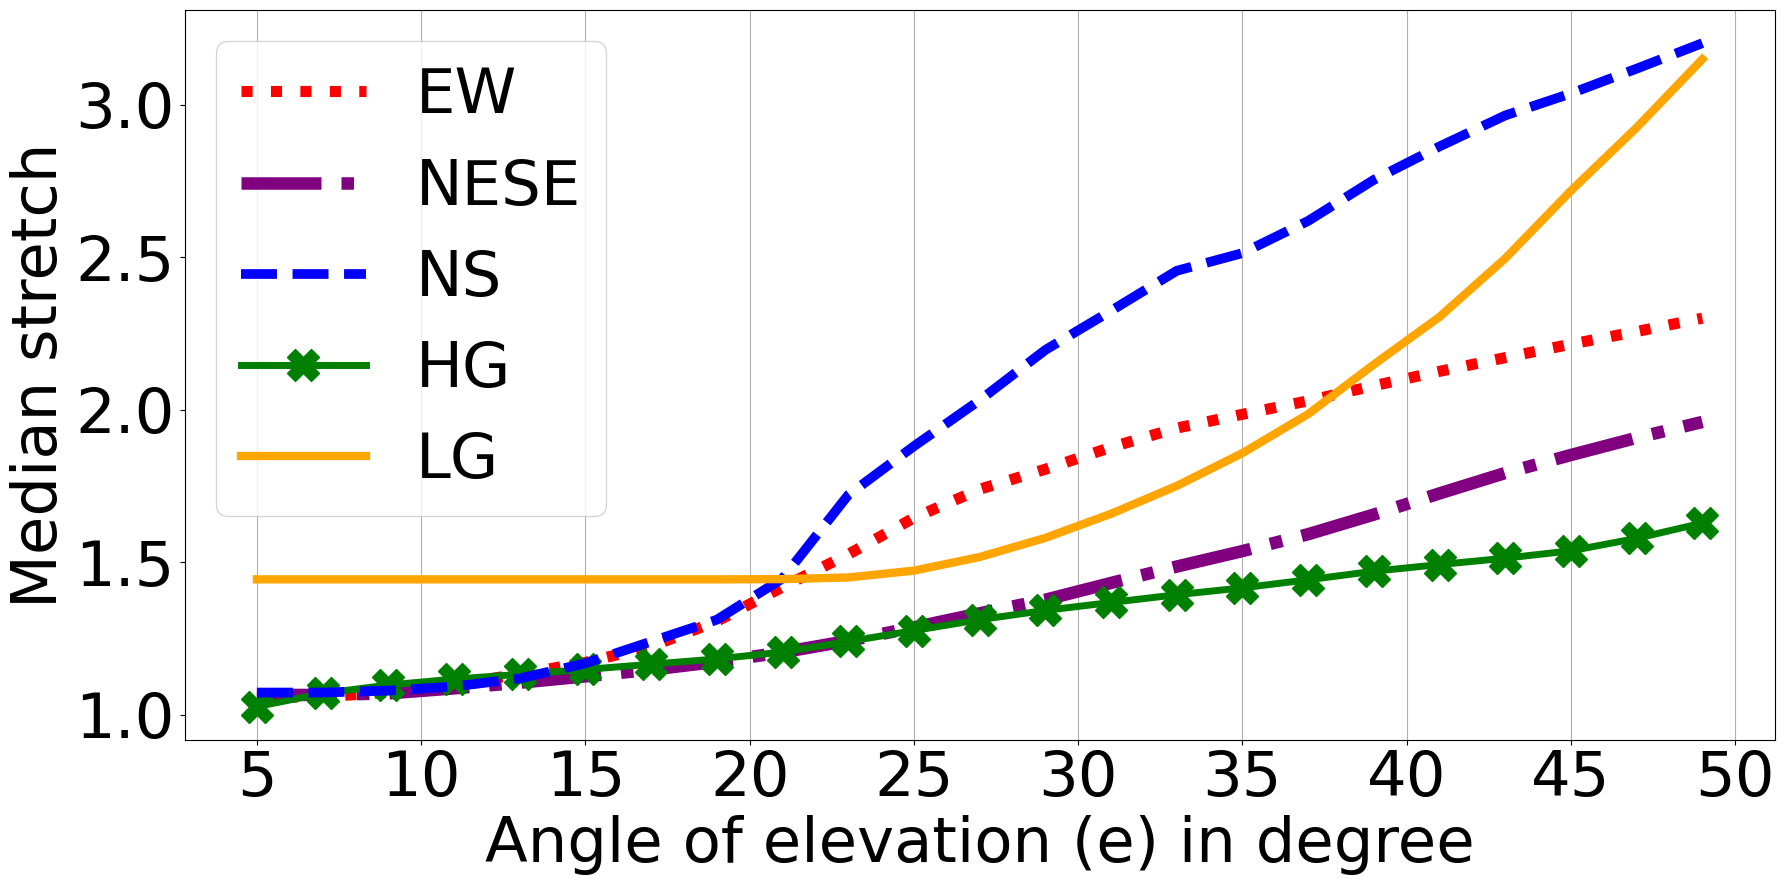

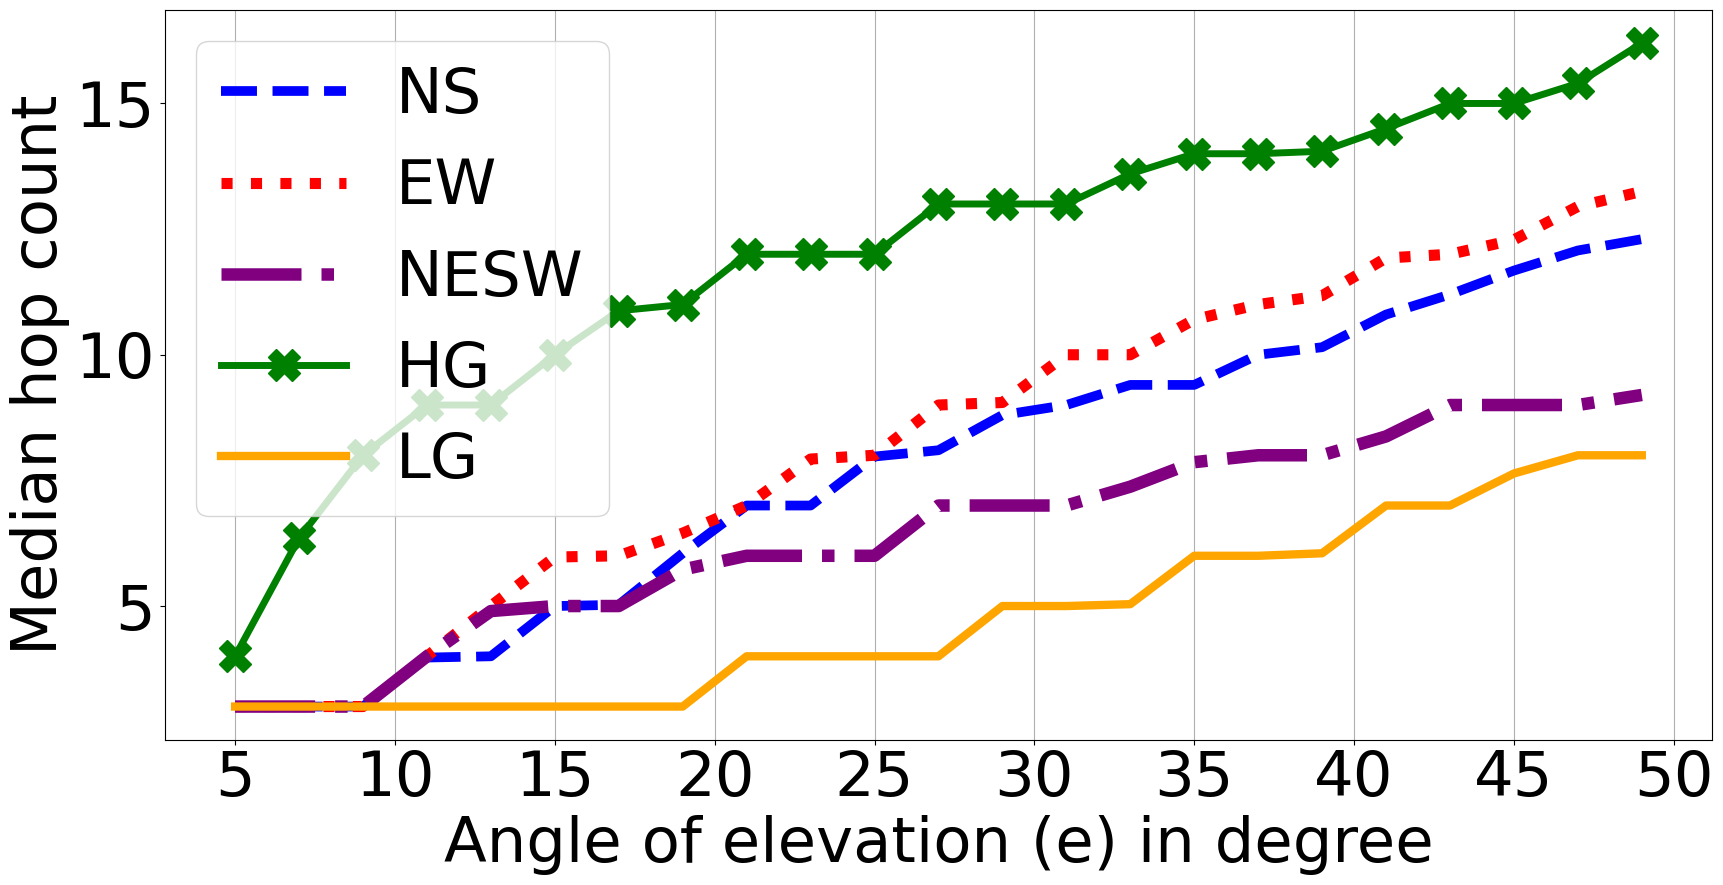

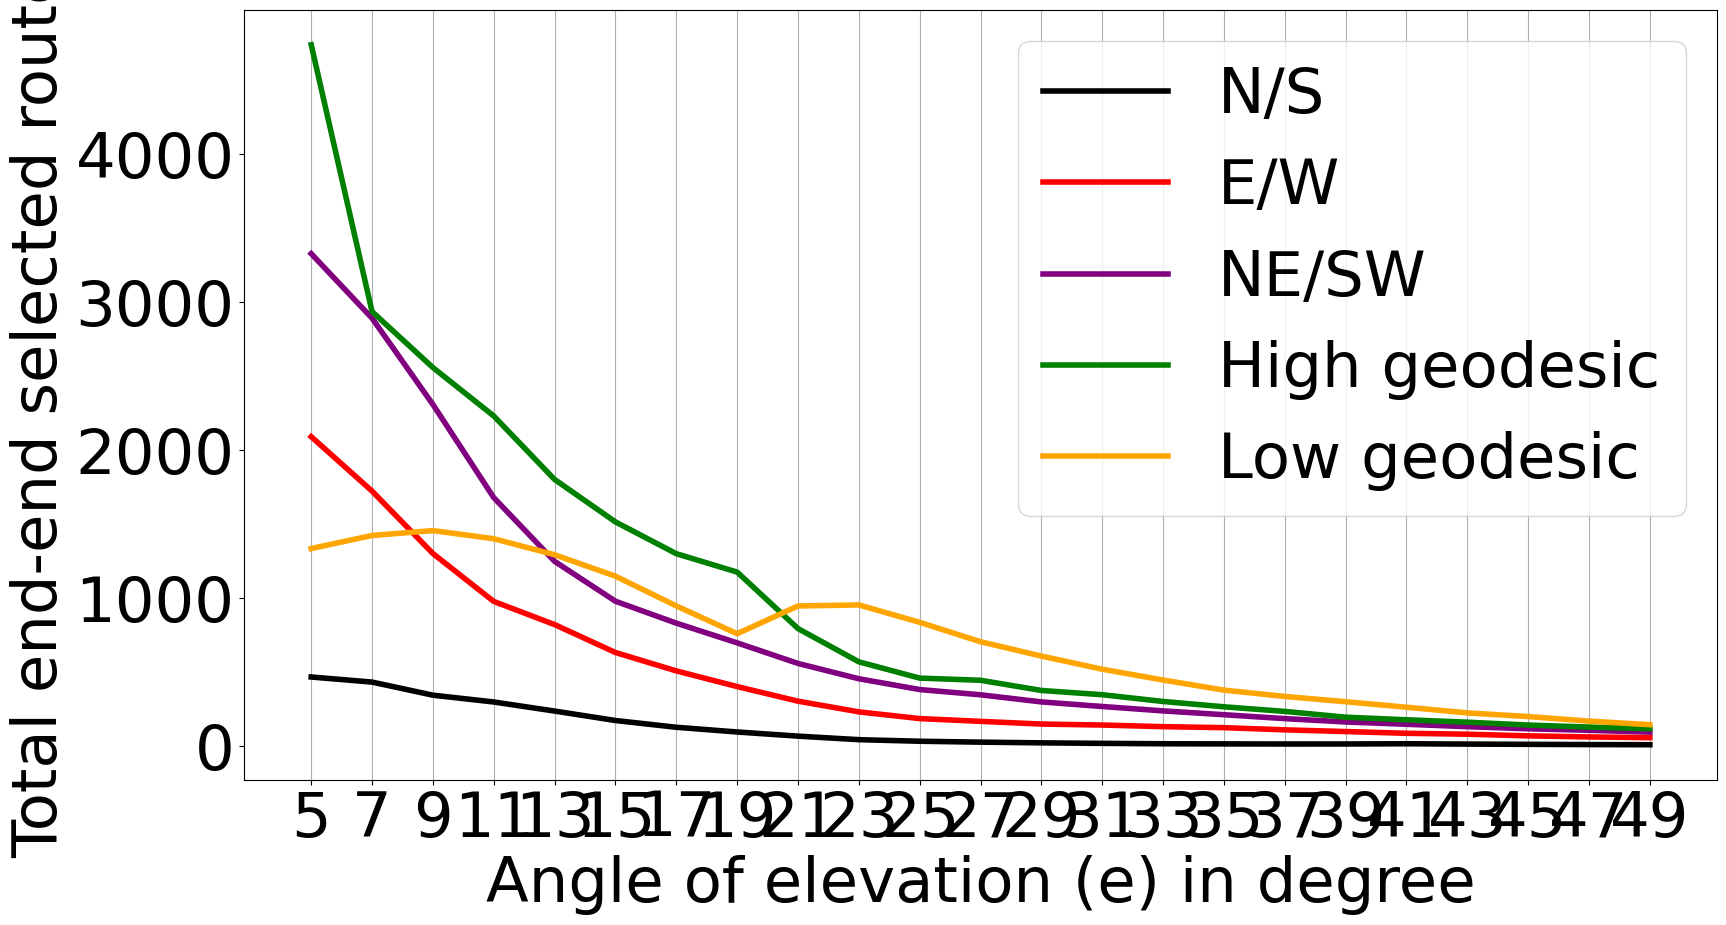

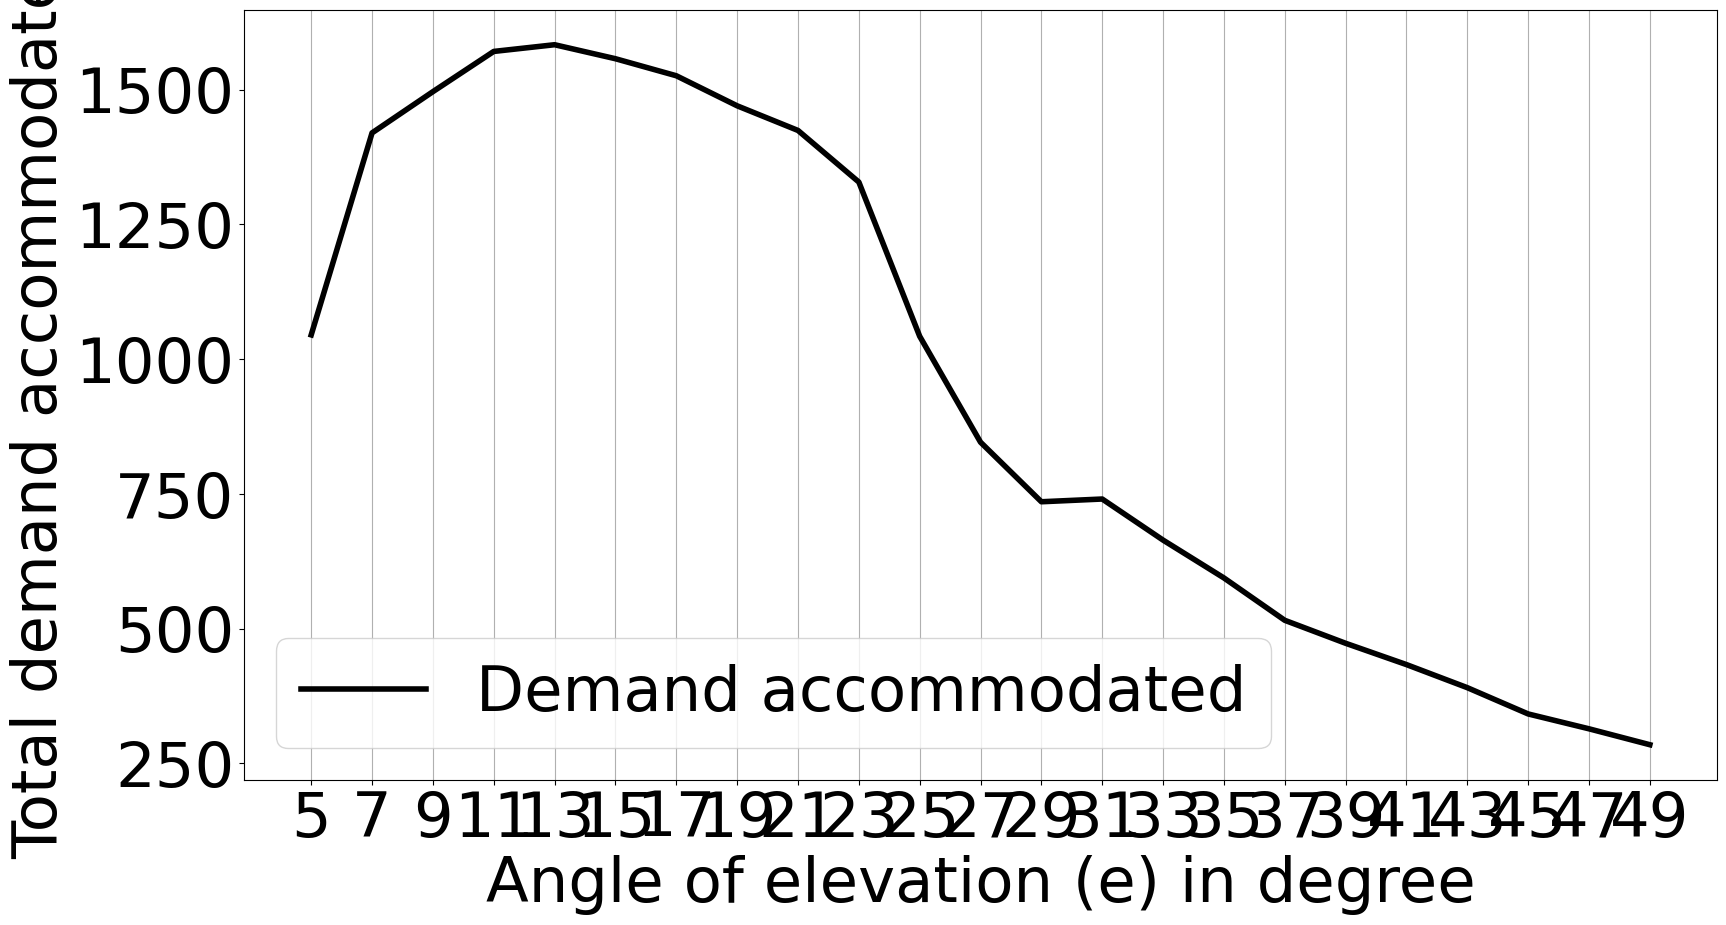

In [ ]:
def plot_e(df):
    df['th_POP_ONLY'] = df['th_POP_ONLY']/1000
    x_line = [e for e in range(5, 175+1, 5)]
    fig, ax1 = plt.subplots()
    ax1.set_xticks(x_line, minor=False)
    ax1.xaxis.grid(True, which='major')
    ax1.xaxis.grid(True, which='minor')

    # Throughput
    ax1.set_xlabel('Angle of elevation (e) in degree')
    # ax1.set_ylabel('Throughput (Tbps)')

    ax1.set_ylabel('Throughput (Tbps)', color='r')
    ax1.tick_params(axis='y', labelcolor='r')
    # line1 = ax1.plot(df['e'], df['th_POP_GDP'],
    #                  label='Population GDP TM', color='r', linewidth=2)
    line2 = ax1.plot(df['e'], df['th_POP_ONLY'],
                     label='Throughput', color='r', linewidth=4)
    ax1.tick_params(axis='y')

    # Coverage
    ax2 = ax1.twinx()
    ax2.set_ylabel('Coverage metrics &\n# Disconnected GS')
    line3 = ax2.plot(df['e'], df['cov'], label='Coverage metrics',
                     linestyle='dashed', linewidth=7)
    line4 = ax2.plot(df['e'], df['dead_cnt'], label='# Disconnected GS',
                     linestyle='dotted', color='black', linewidth=8)
    ax2.tick_params(axis='y')
    fig.tight_layout()
    # lines = line1+line2+line3+line4
    lines = line2+line3+line4
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels)
    plt.tight_layout()
    # plt.savefig('figures/e/default_e_thpop.png')
    plt.show()

    # Stretch
    fig, ax1 = plt.subplots()
    ax1.set_xticks(x_line, minor=False)
    ax1.xaxis.grid(True, which='major')
    ax1.xaxis.grid(True, which='minor')
    ax1.set_xlabel('Angle of elevation (e) in degree')
    ax1.set_ylabel('Median stretch')
    line1 = ax1.plot(df['e'], df['EW_sth'], label='EW',
                     color='Red', linewidth=8, linestyle='dotted')
    line2 = ax1.plot(df['e'], df['NESW_sth'], label='NESE',
                     color='Purple', linewidth=9, linestyle='dashdot')
    line4 = ax1.plot(df['e'], df['HG_sth'], label='HG', color='Green',
                     linewidth=5, linestyle='solid', marker='X', ms=23)
    line3 = ax1.plot(df['e'], df['NS_sth'], label='NS',
                     color='Blue', linewidth=7, linestyle='dashed')
    line5 = ax1.plot(df['e'], df['LG_sth'], label='LG',
                     color='Orange', linewidth=6)
    fig.tight_layout()
    lines = line1+line2+line3+line4+line5
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels)
    plt.tight_layout()
    # plt.savefig('figures/e/default_e_sth.png')
    plt.show()

    # Hop count
    _, ax = plt.subplots()
    ax.set_xticks(x_line, minor=False)
    ax.xaxis.grid(True, which='major')
    ax.xaxis.grid(True, which='minor')
    plt.xlabel("Angle of elevation (e) in degree")
    plt.ylabel("Median hop count")
    plt.plot(df['e'], df['NS_cnt'], label='NS',
             color='Blue', linewidth=7, linestyle='dashed')
    plt.plot(df['e'], df['EW_cnt'], label='EW',
             color='Red', linewidth=8, linestyle='dotted')
    plt.plot(df['e'], df['NESW_cnt'], label='NESW',
             color='Purple', linewidth=9, linestyle='dashdot')
    plt.plot(df['e'], df['HG_cnt'], label='HG', color='Green',
             linewidth=5, linestyle='solid', marker='X', ms=23)
    plt.plot(df['e'], df['LG_cnt'], label='LG', color='Orange', linewidth=6)
    plt.legend()
    plt.tight_layout()
    # plt.savefig('figures/e/default_e_hcnt.png')
    plt.show()

    # Total end to end selected routes
    fig, ax1 = plt.subplots()

    ax1.set_xticks(df['e'], minor=False)
    ax1.xaxis.grid(True, which='major')
    ax1.xaxis.grid(True, which='minor')
    ax1.set_xlabel("Angle of elevation (e) in degree")
    ax1.set_ylabel("Total end-end selected routes")

    ax1.plot(df['e'], df['NS_selt'], label='N/S', color='black', linewidth=4)
    ax1.plot(df['e'], df['EW_selt'], label='E/W', color='Red', linewidth=4)
    ax1.plot(df['e'], df['NESW_selt'], label='NE/SW',
             color='Purple', linewidth=4)
    ax1.plot(df['e'], df['HG_selt'], label='High geodesic',
             color='Green', linewidth=4)
    ax1.plot(df['e'], df['LG_selt'], label='Low geodesic',
             color='Orange', linewidth=4)

    ax1.legend()
    plt.show()

    # Total demand accommodated
    fig, ax1 = plt.subplots()

    ax1.set_xticks(df['e'], minor=False)
    ax1.xaxis.grid(True, which='major')
    ax1.xaxis.grid(True, which='minor')
    ax1.set_xlabel("Angle of elevation (e) in degree")
    ax1.set_ylabel("Total demand accommodated")
    ax1.plot(df['e'], df['ttl_accm_flw'],
             label='Demand accommodated', color='black', linewidth=4)
    ax1.legend()
    plt.show()


df = pd.read_csv('CSVs/explore_search_space/default_e.csv').sort_values(by='e')
plot_e(df)

## Number of orbit in the shell

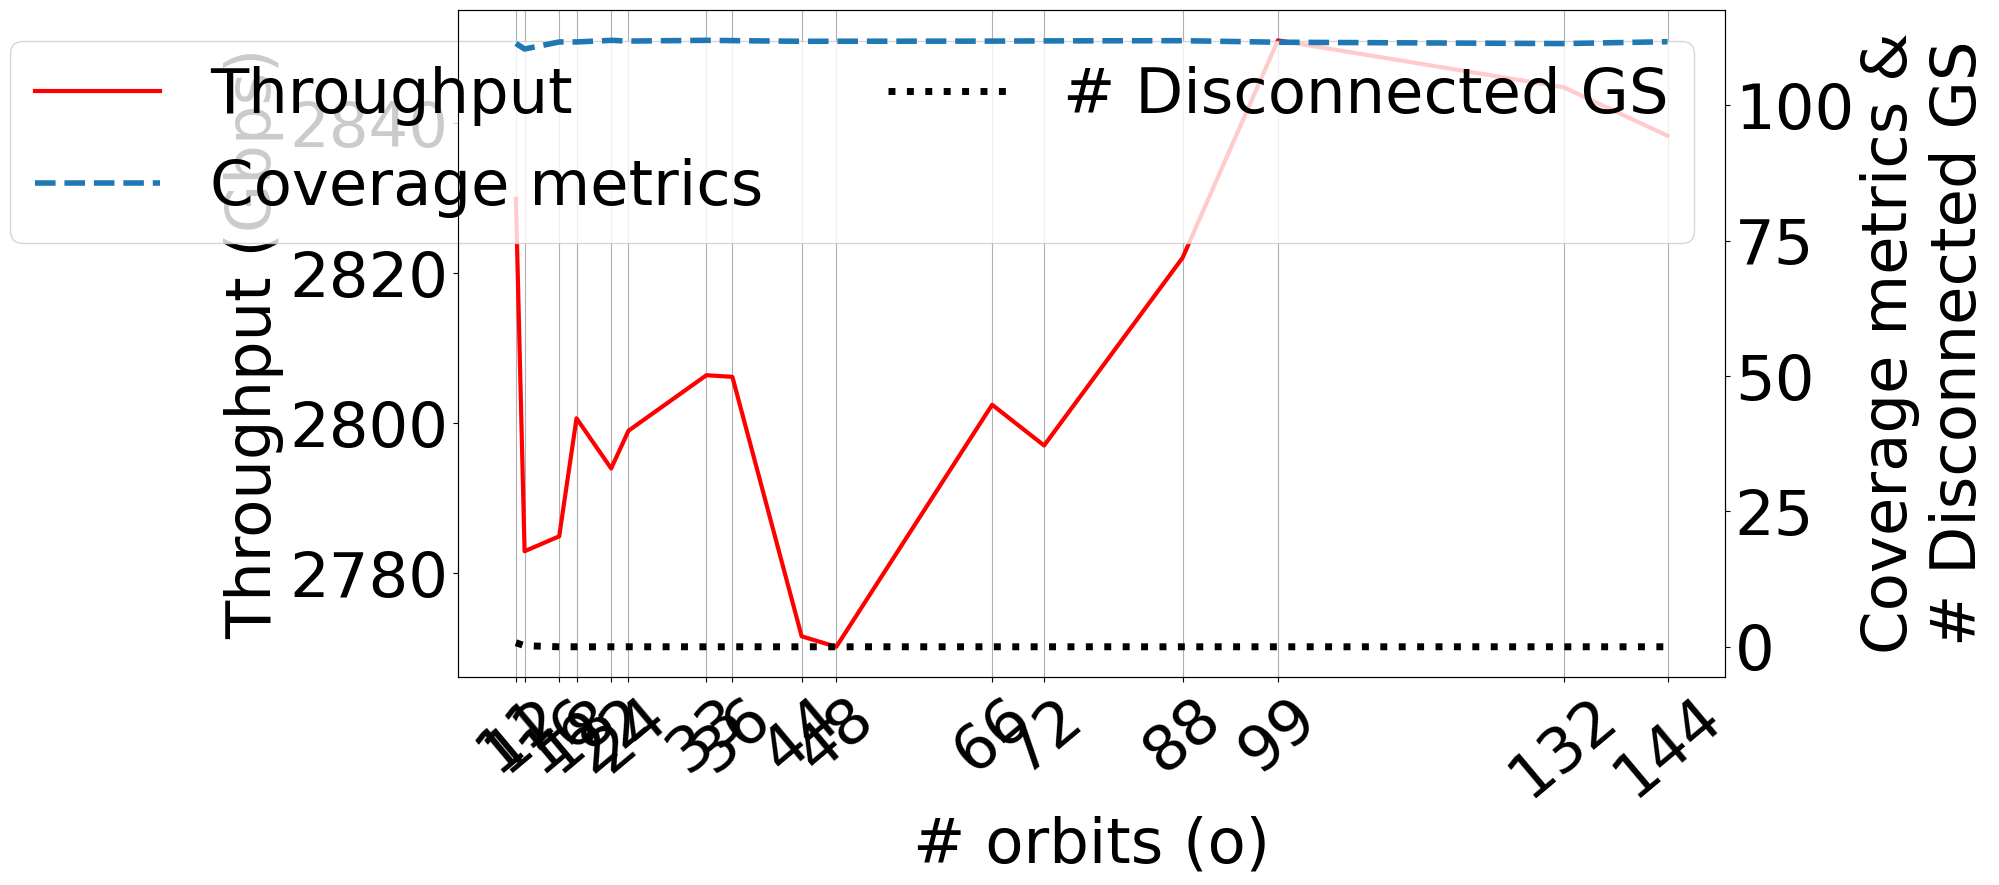

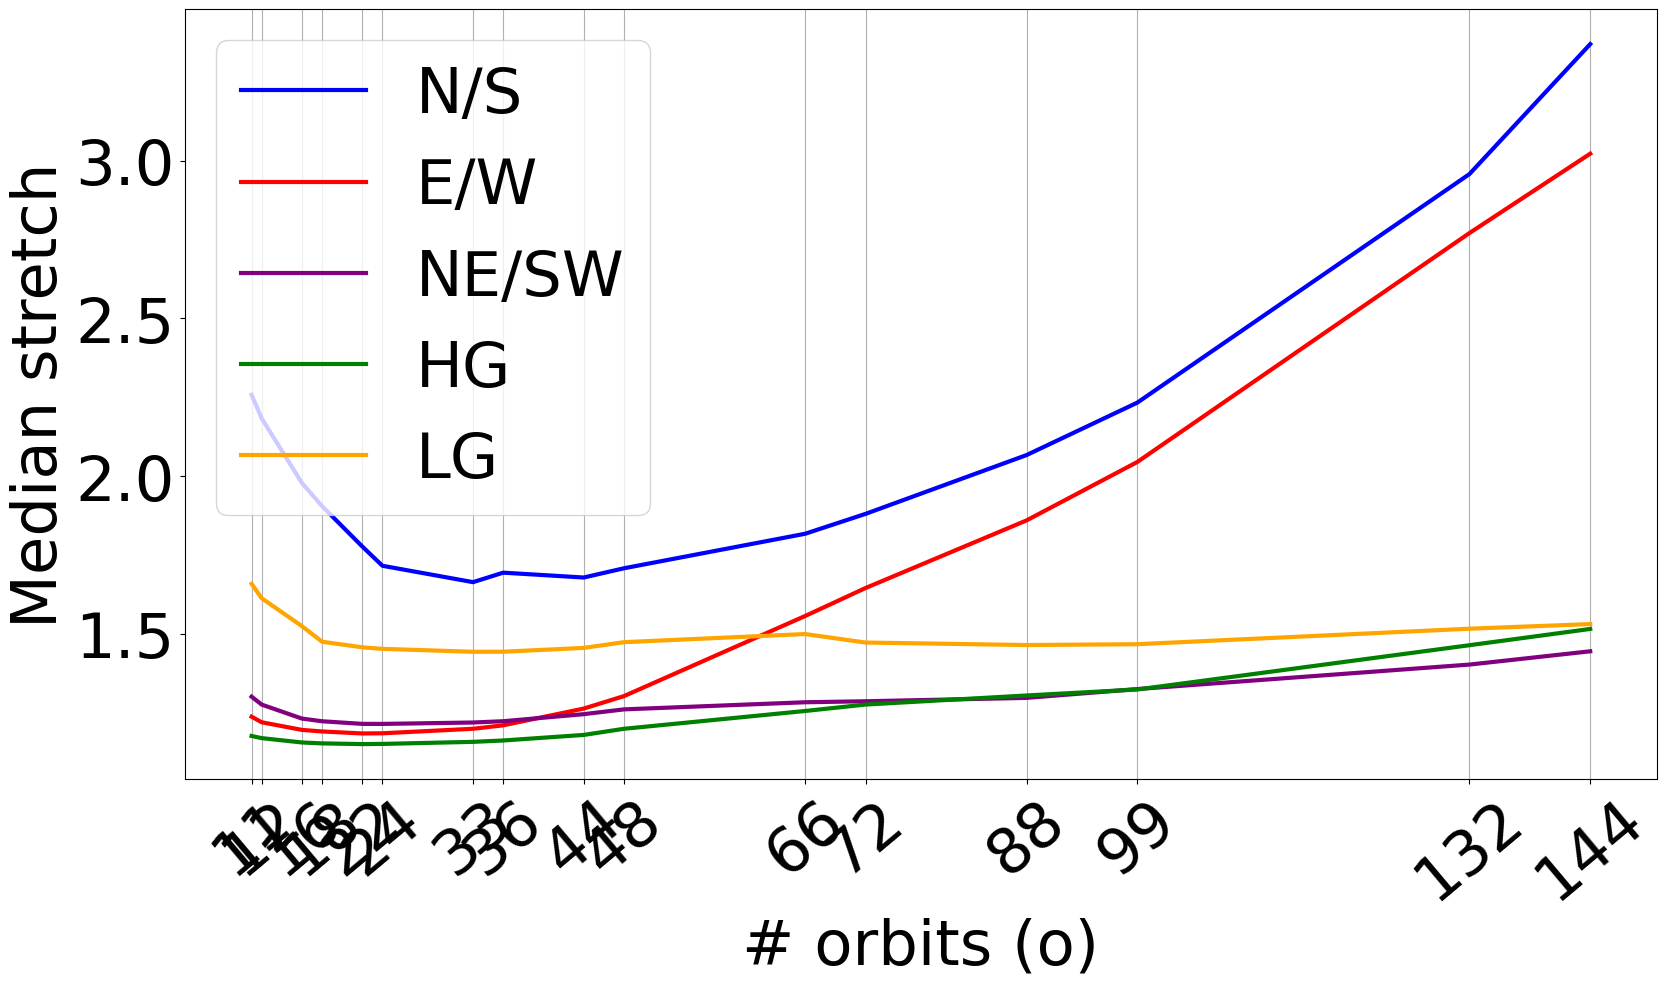

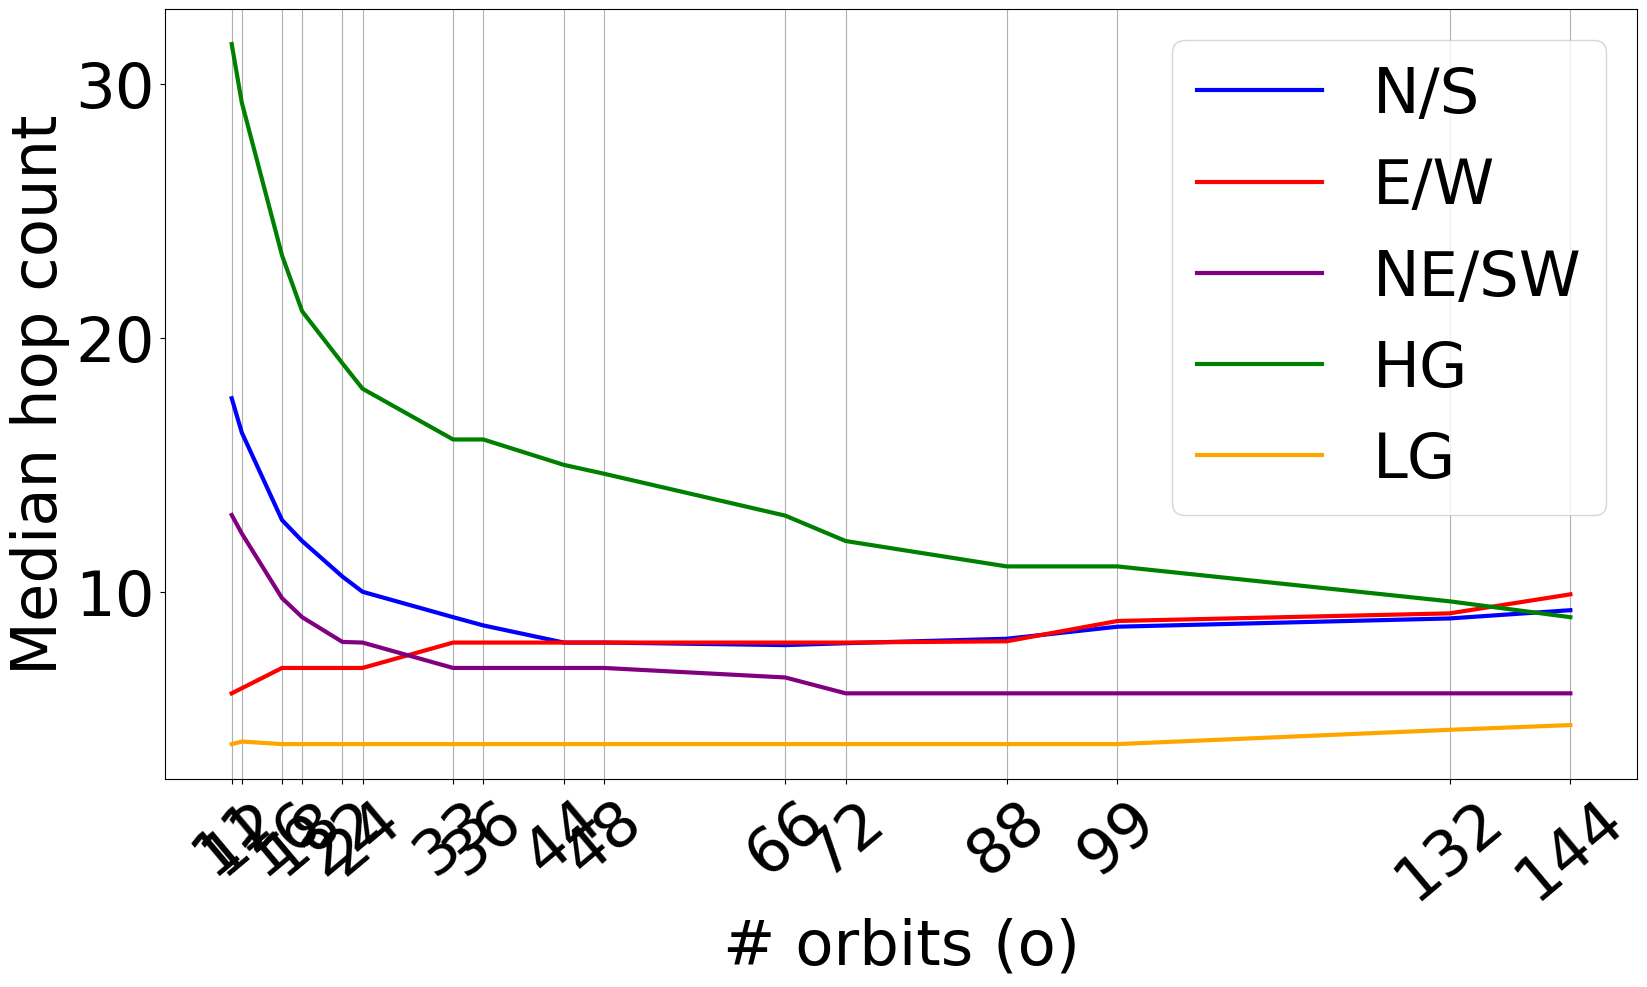

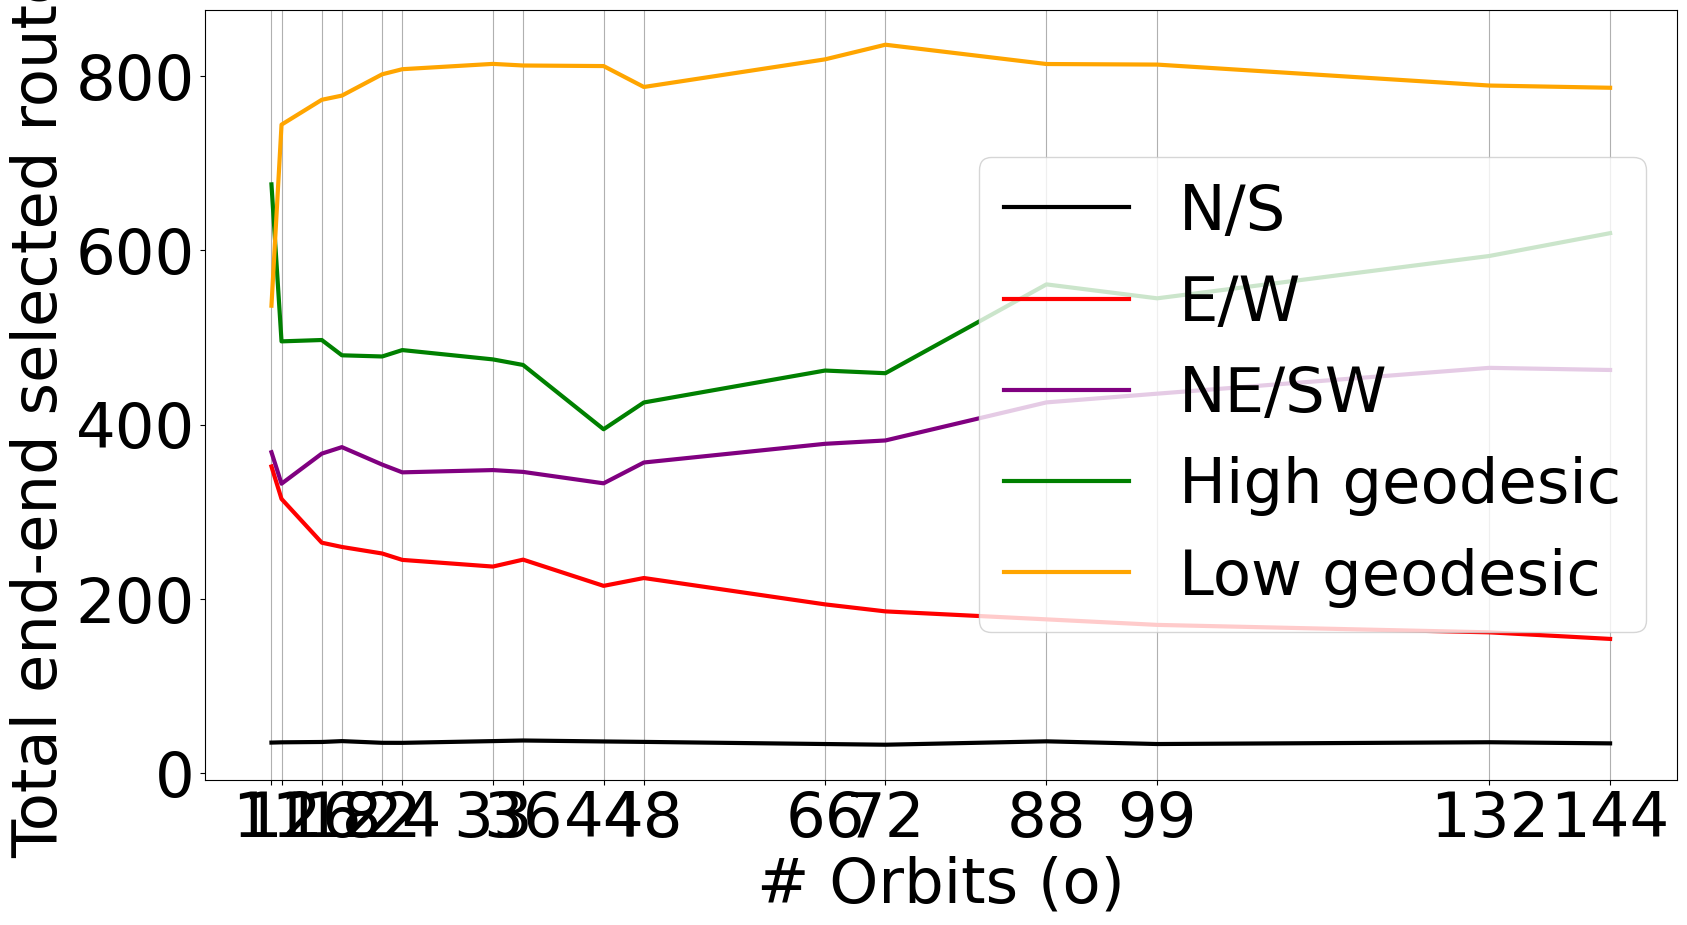

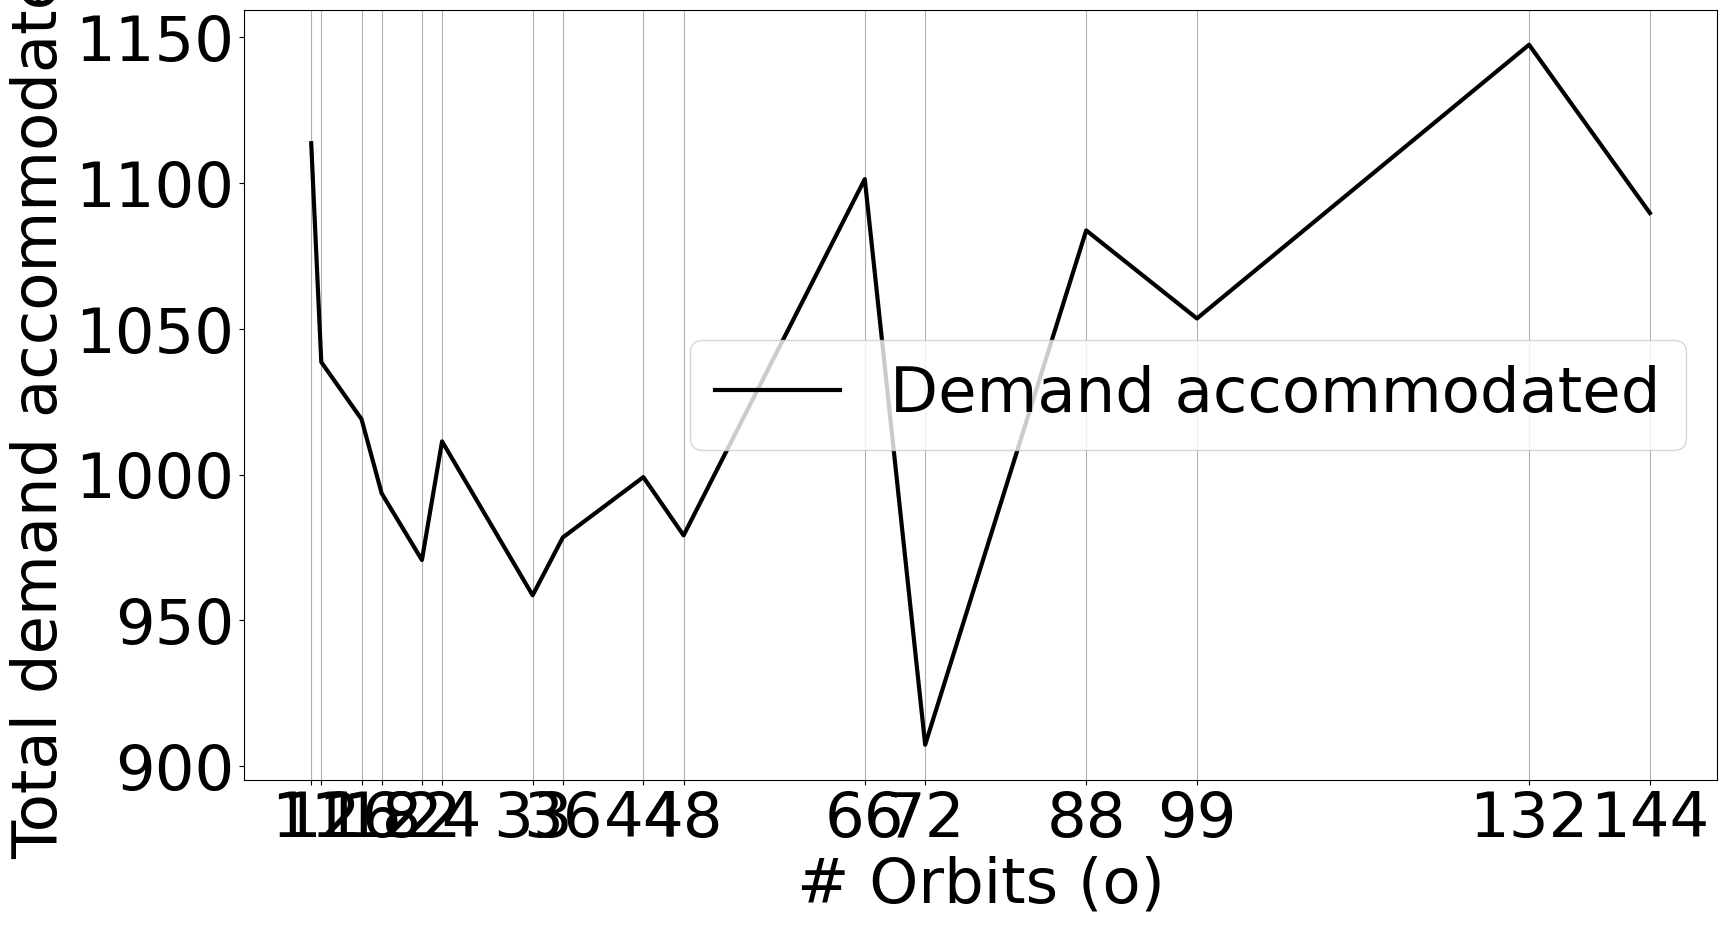

In [13]:
def plot_o(df):
    fig, ax1 = plt.subplots()
    ax1.set_xticks(df['o'], minor=False)
    ax1.set_xticklabels(ax1.get_xticks(), rotation=40)
    ax1.xaxis.grid(True, which='major')
    ax1.xaxis.grid(True, which='minor')

    # Throughput
    ax1.set_xlabel('# orbits (o)')
    ax1.set_ylabel('Throughput (Gbps)')
    # line1 = ax1.plot(df['o'], df['th_POP_GDP'],
    #                  label='Population GDP TM', color='r', linewidth=2)
    line2 = ax1.plot(df['o'], df['th_POP_ONLY'],
                     label='Throughput', color='r', linewidth=3)
    ax1.tick_params(axis='y')

    # Coverage
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    # we already handled the x-label with ax1
    ax2.set_ylabel('Coverage metrics &\n# Disconnected GS')
    line3 = ax2.plot(df['o'], df['cov'], label='Coverage metrics',
                     linestyle='dashed', linewidth=4)
    line4 = ax2.plot(df['o'], df['dead_cnt'], label='# Disconnected GS',
                     linestyle='dotted', color='black', linewidth=5)
    ax2.tick_params(axis='y')
    fig.tight_layout()
    # lines = line1+line2+line3+line4
    lines = line2+line3+line4
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels, ncol=2)

    # Stretch
    _, ax = plt.subplots()
    ax.set_xticks(df['o'], minor=False)
    ax.set_xticklabels(ax.get_xticks(), rotation=40)
    ax.xaxis.grid(True, which='major')
    ax.xaxis.grid(True, which='minor')
    plt.xlabel("# orbits (o)")
    plt.ylabel("Median stretch")
    plt.plot(df['o'], df['NS_sth'], label='N/S', color='Blue', linewidth=3)
    plt.plot(df['o'], df['EW_sth'], label='E/W', color='Red', linewidth=3)
    plt.plot(df['o'], df['NESW_sth'], label='NE/SW',
             color='Purple', linewidth=3)
    plt.plot(df['o'], df['HG_sth'], label='HG', color='Green', linewidth=3)
    plt.plot(df['o'], df['LG_sth'], label='LG', color='Orange', linewidth=3)
    plt.legend()
    plt.show()

    # Hop count
    _, ax = plt.subplots()
    ax.set_xticks(df['o'], minor=False)
    ax.set_xticklabels(ax.get_xticks(), rotation=40)
    ax.xaxis.grid(True, which='major')
    ax.xaxis.grid(True, which='minor')
    plt.xlabel("# orbits (o)")
    plt.ylabel("Median hop count")
    plt.plot(df['o'], df['NS_cnt'], label='N/S',
             color='Blue', linewidth=3)
    plt.plot(df['o'], df['EW_cnt'], label='E/W',
             color='Red', linewidth=3)
    plt.plot(df['o'], df['NESW_cnt'], label='NE/SW',
             color='Purple', linewidth=3)
    plt.plot(df['o'], df['HG_cnt'], label='HG',
             color='Green', linewidth=3)
    plt.plot(df['o'], df['LG_cnt'], label='LG',
             color='Orange', linewidth=3)
    plt.legend()
    plt.show()

    # Total end to end selected routes
    fig, ax1 = plt.subplots()

    ax1.set_xticks(df['o'], minor=False)
    ax1.xaxis.grid(True, which='major')
    ax1.xaxis.grid(True, which='minor')
    ax1.set_xlabel("# Orbits (o)")
    ax1.set_ylabel("Total end-end selected routes")

    ax1.plot(df['o'], df['NS_selt'], label='N/S', color='black', linewidth=3)
    ax1.plot(df['o'], df['EW_selt'], label='E/W', color='Red', linewidth=3)
    ax1.plot(df['o'], df['NESW_selt'], label='NE/SW',
             color='Purple', linewidth=3)
    ax1.plot(df['o'], df['HG_selt'], label='High geodesic',
             color='Green', linewidth=3)
    ax1.plot(df['o'], df['LG_selt'], label='Low geodesic',
             color='Orange', linewidth=3)

    ax1.legend()
    plt.show()

    # Total demand accommodated
    fig, ax1 = plt.subplots()

    ax1.set_xticks(df['o'], minor=False)
    ax1.xaxis.grid(True, which='major')
    ax1.xaxis.grid(True, which='minor')
    ax1.set_xlabel("# Orbits (o)")
    ax1.set_ylabel("Total demand accommodated")
    ax1.plot(df['o'], df['ttl_accm_flw'],
             label='Demand accommodated', color='black', linewidth=3)
    ax1.legend()
    plt.show()


df = pd.read_csv('CSVs/explore_search_space/default_o.csv').sort_values(by='o')
plot_o(df)

# High performance region

## Number of orbit in the shell

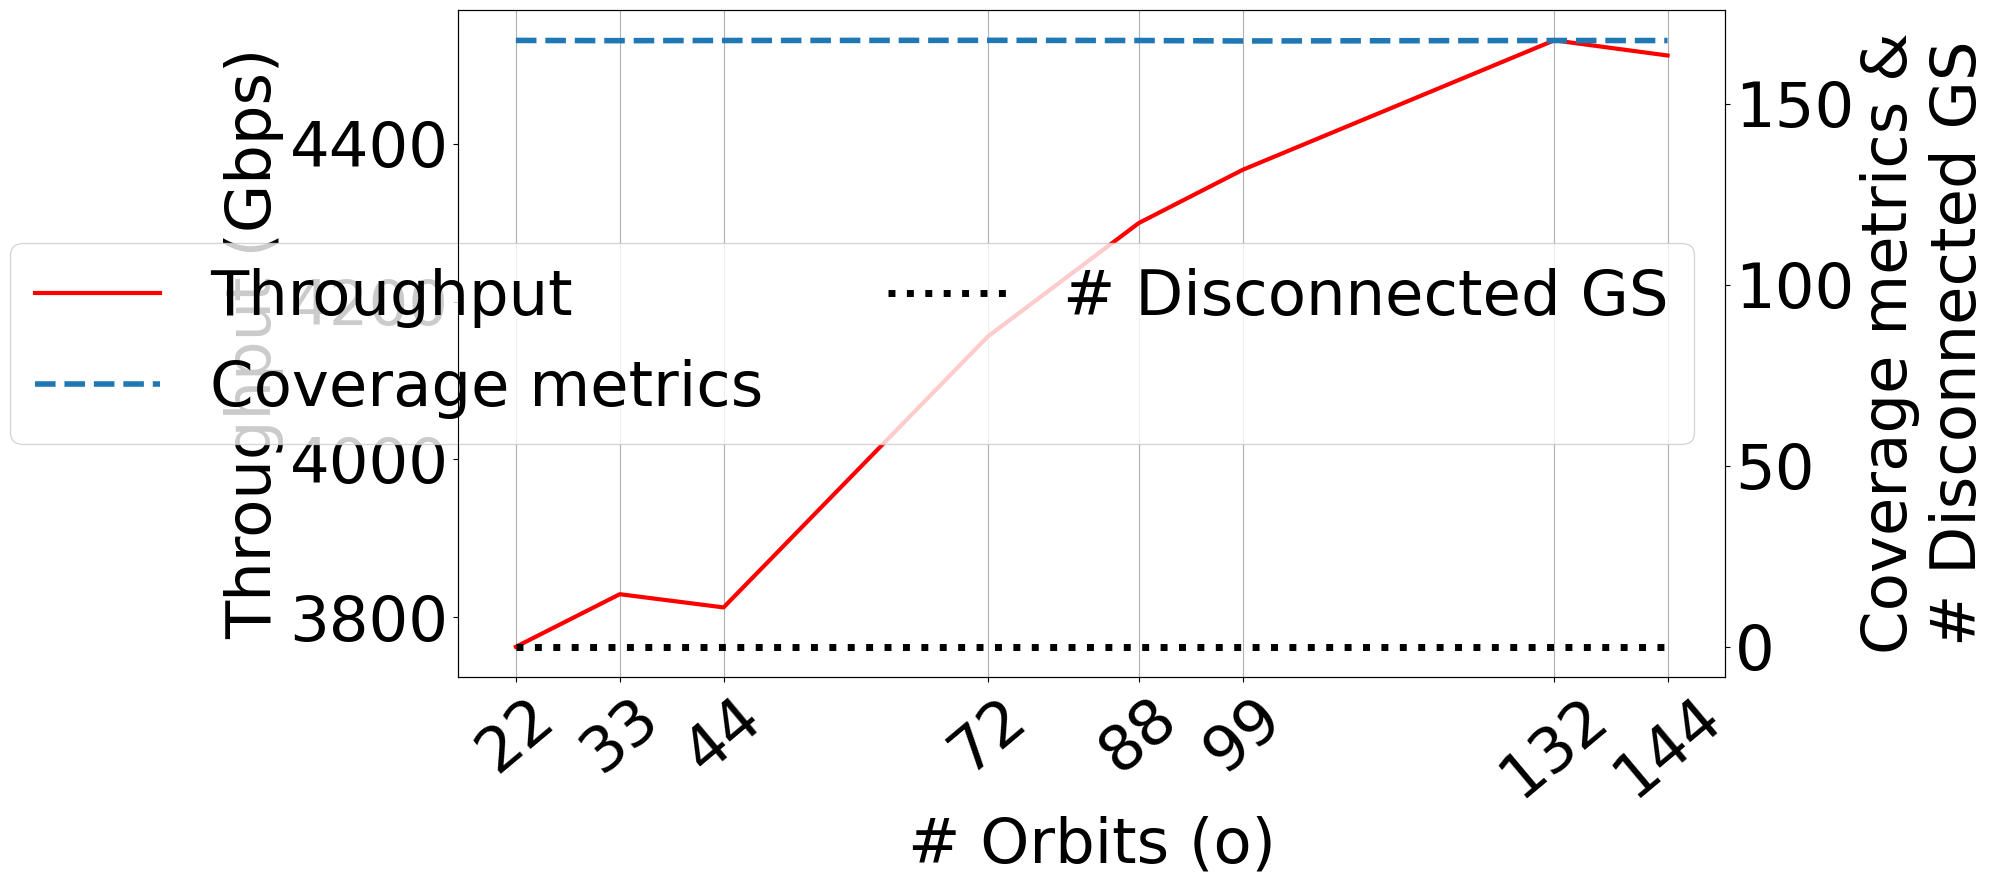

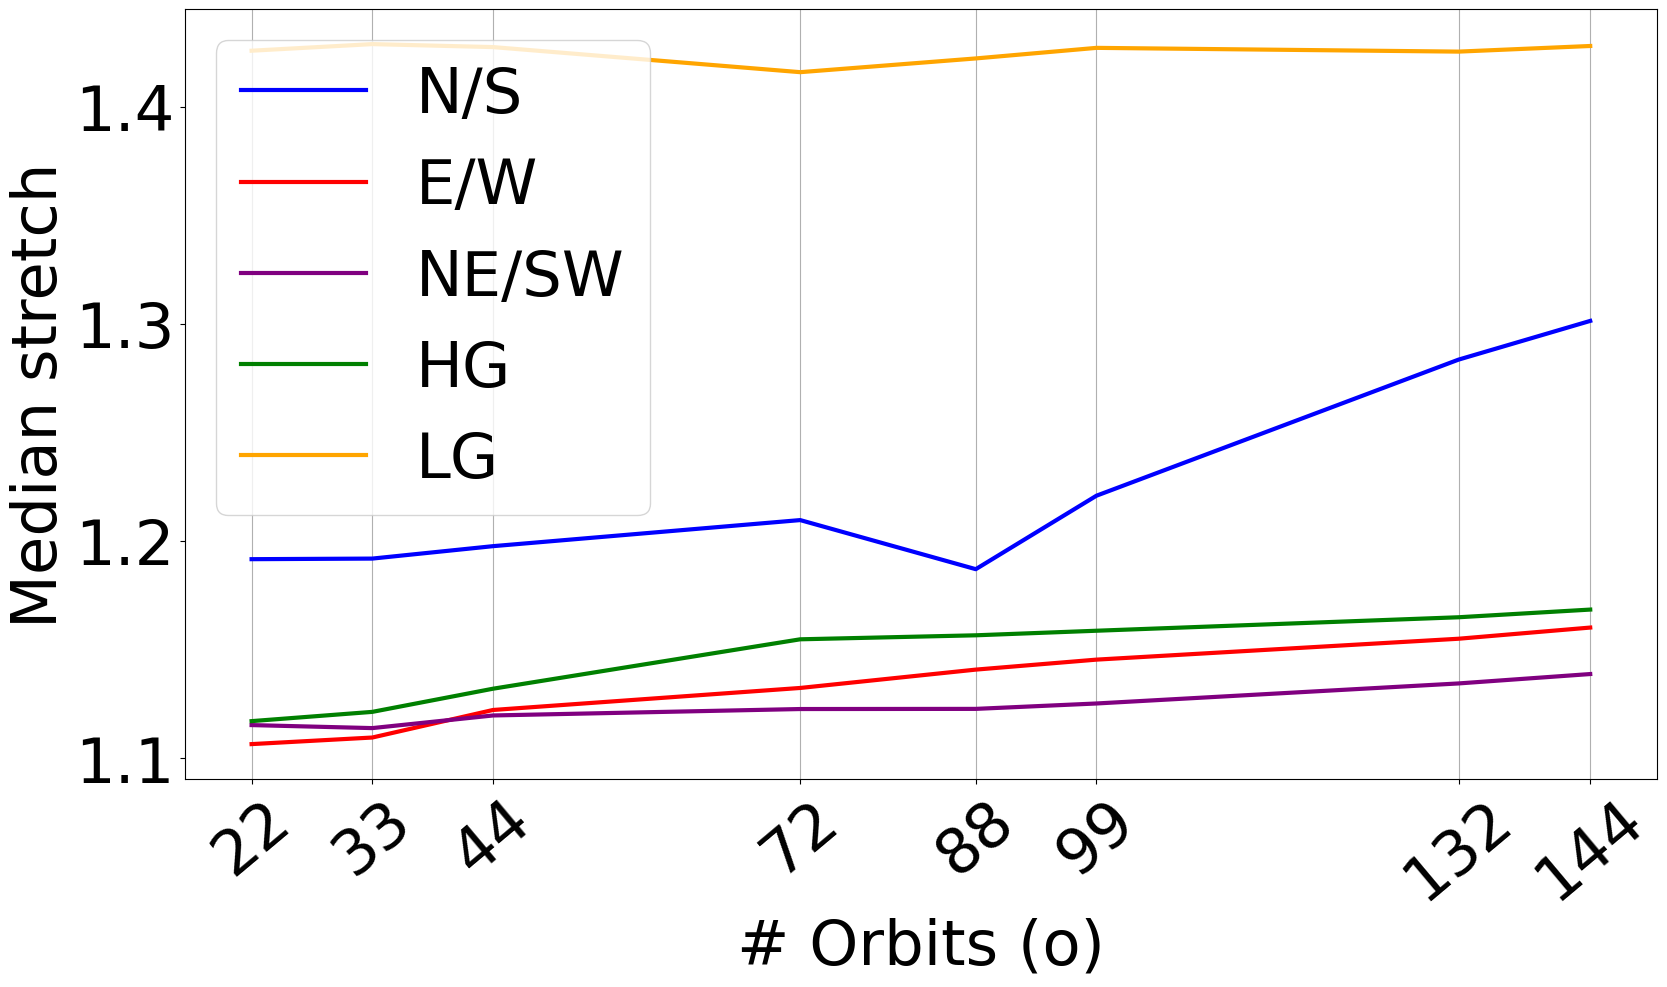

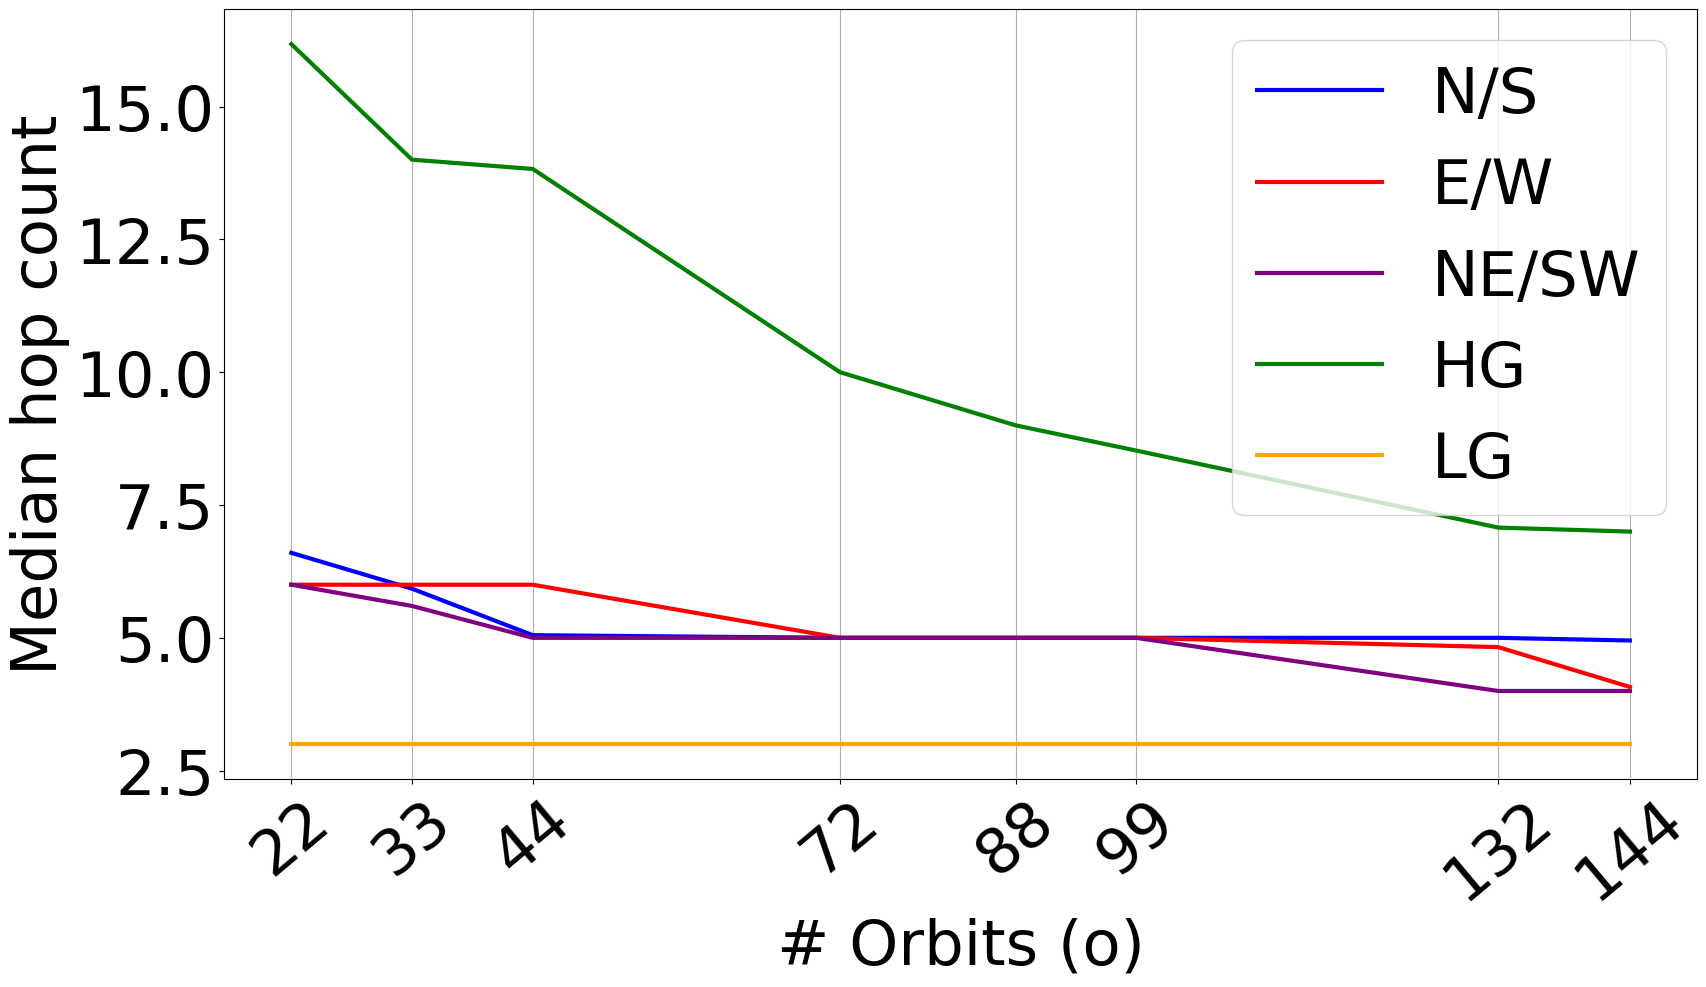

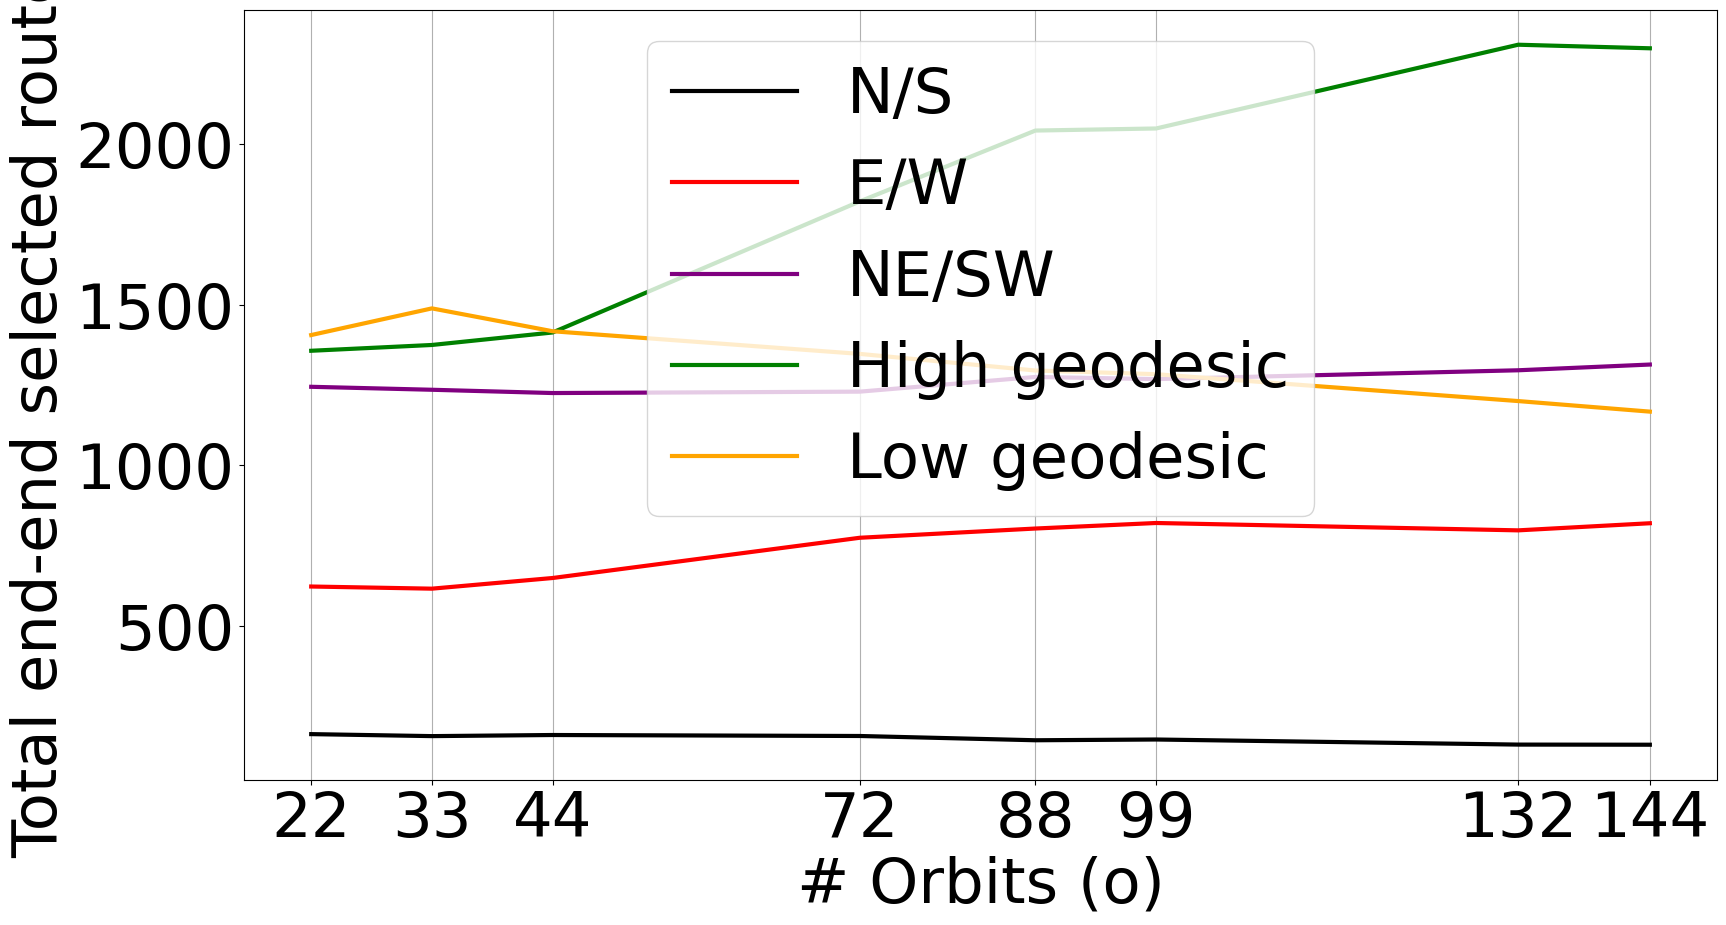

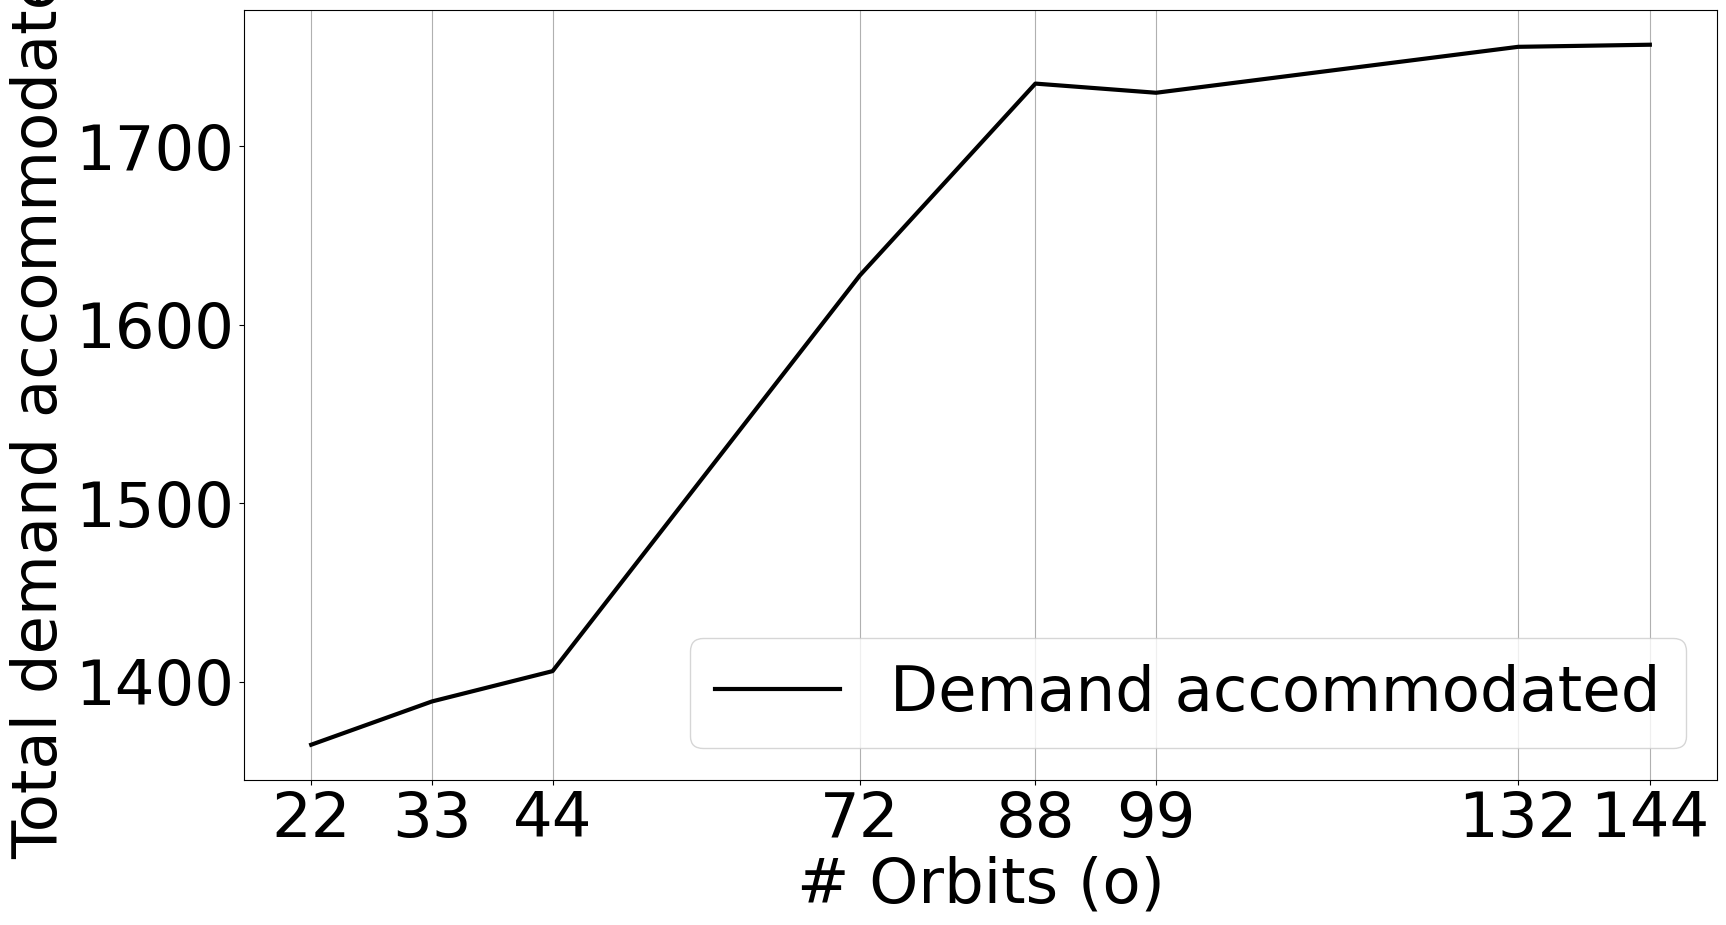

In [14]:
def plot_o(df):
    fig, ax1 = plt.subplots()
    ax1.set_xticks(df['o'], minor=False)
    ax1.set_xticklabels(ax1.get_xticks(), rotation=40)
    ax1.xaxis.grid(True, which='major')
    ax1.xaxis.grid(True, which='minor')

    # Throughput
    ax1.set_xlabel('# Orbits (o)')
    ax1.set_ylabel('Throughput (Gbps)')
    # line1 = ax1.plot(df['o'], df['th_POP_GDP'],
    #                  label='Population GDP TM', color='r', linewidth=2)
    line2 = ax1.plot(df['o'], df['th_POP_ONLY'],
                     label='Throughput', color='r', linewidth=3)
    ax1.tick_params(axis='y')

    # Coverage
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    # we already handled the x-label with ax1
    ax2.set_ylabel('Coverage metrics &\n# Disconnected GS')
    line3 = ax2.plot(df['o'], df['cov'], label='Coverage metrics',
                     linestyle='dashed', linewidth=4)
    line4 = ax2.plot(df['o'], df['dead_cnt'], label='# Disconnected GS',
                     linestyle='dotted', color='black', linewidth=5)
    ax2.tick_params(axis='y')
    fig.tight_layout()
    # lines = line1+line2+line3+line4
    lines = line2+line3+line4
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels, ncol=2)

    # Stretch
    _, ax = plt.subplots()
    ax.set_xticks(df['o'], minor=False)
    ax.set_xticklabels(ax.get_xticks(), rotation=40)
    ax.xaxis.grid(True, which='major')
    ax.xaxis.grid(True, which='minor')
    plt.xlabel("# Orbits (o)")
    plt.ylabel("Median stretch")
    plt.plot(df['o'], df['NS_sth'], label='N/S', color='Blue', linewidth=3)
    plt.plot(df['o'], df['EW_sth'], label='E/W', color='Red', linewidth=3)
    plt.plot(df['o'], df['NESW_sth'], label='NE/SW',
             color='Purple', linewidth=3)
    plt.plot(df['o'], df['HG_sth'], label='HG', color='Green', linewidth=3)
    plt.plot(df['o'], df['LG_sth'], label='LG', color='Orange', linewidth=3)
    plt.legend()
    plt.show()

    # Hop count
    _, ax = plt.subplots()
    ax.set_xticks(df['o'], minor=False)
    ax.set_xticklabels(ax.get_xticks(), rotation=40)
    ax.xaxis.grid(True, which='major')
    ax.xaxis.grid(True, which='minor')
    plt.xlabel("# Orbits (o)")
    plt.ylabel("Median hop count")
    plt.plot(df['o'], df['NS_cnt'], label='N/S',
             color='Blue', linewidth=3)
    plt.plot(df['o'], df['EW_cnt'], label='E/W',
             color='Red', linewidth=3)
    plt.plot(df['o'], df['NESW_cnt'], label='NE/SW',
             color='Purple', linewidth=3)
    plt.plot(df['o'], df['HG_cnt'], label='HG',
             color='Green', linewidth=3)
    plt.plot(df['o'], df['LG_cnt'], label='LG',
             color='Orange', linewidth=3)
    plt.legend()
    plt.show()

    # Total end to end selected routes
    fig, ax1 = plt.subplots()

    ax1.set_xticks(df['o'], minor=False)
    ax1.xaxis.grid(True, which='major')
    ax1.xaxis.grid(True, which='minor')
    ax1.set_xlabel("# Orbits (o)")
    ax1.set_ylabel("Total end-end selected routes")

    ax1.plot(df['o'], df['NS_selt'], label='N/S', color='black', linewidth=3)
    ax1.plot(df['o'], df['EW_selt'], label='E/W', color='Red', linewidth=3)
    ax1.plot(df['o'], df['NESW_selt'], label='NE/SW',
             color='Purple', linewidth=3)
    ax1.plot(df['o'], df['HG_selt'], label='High geodesic',
             color='Green', linewidth=3)
    ax1.plot(df['o'], df['LG_selt'], label='Low geodesic',
             color='Orange', linewidth=3)

    ax1.legend()
    plt.show()

    # Total demand accommodated
    fig, ax1 = plt.subplots()

    ax1.set_xticks(df['o'], minor=False)
    ax1.xaxis.grid(True, which='major')
    ax1.xaxis.grid(True, which='minor')
    ax1.set_xlabel("# Orbits (o)")
    ax1.set_ylabel("Total demand accommodated")
    ax1.plot(df['o'], df['ttl_accm_flw'],
             label='Demand accommodated', color='black', linewidth=3)
    ax1.legend()
    plt.show()


df = pd.read_csv(
    'CSVs/explore_search_space/secret_of_o.csv').sort_values(by='o')
plot_o(df)

## Shell phase offset

Avg over orbital period


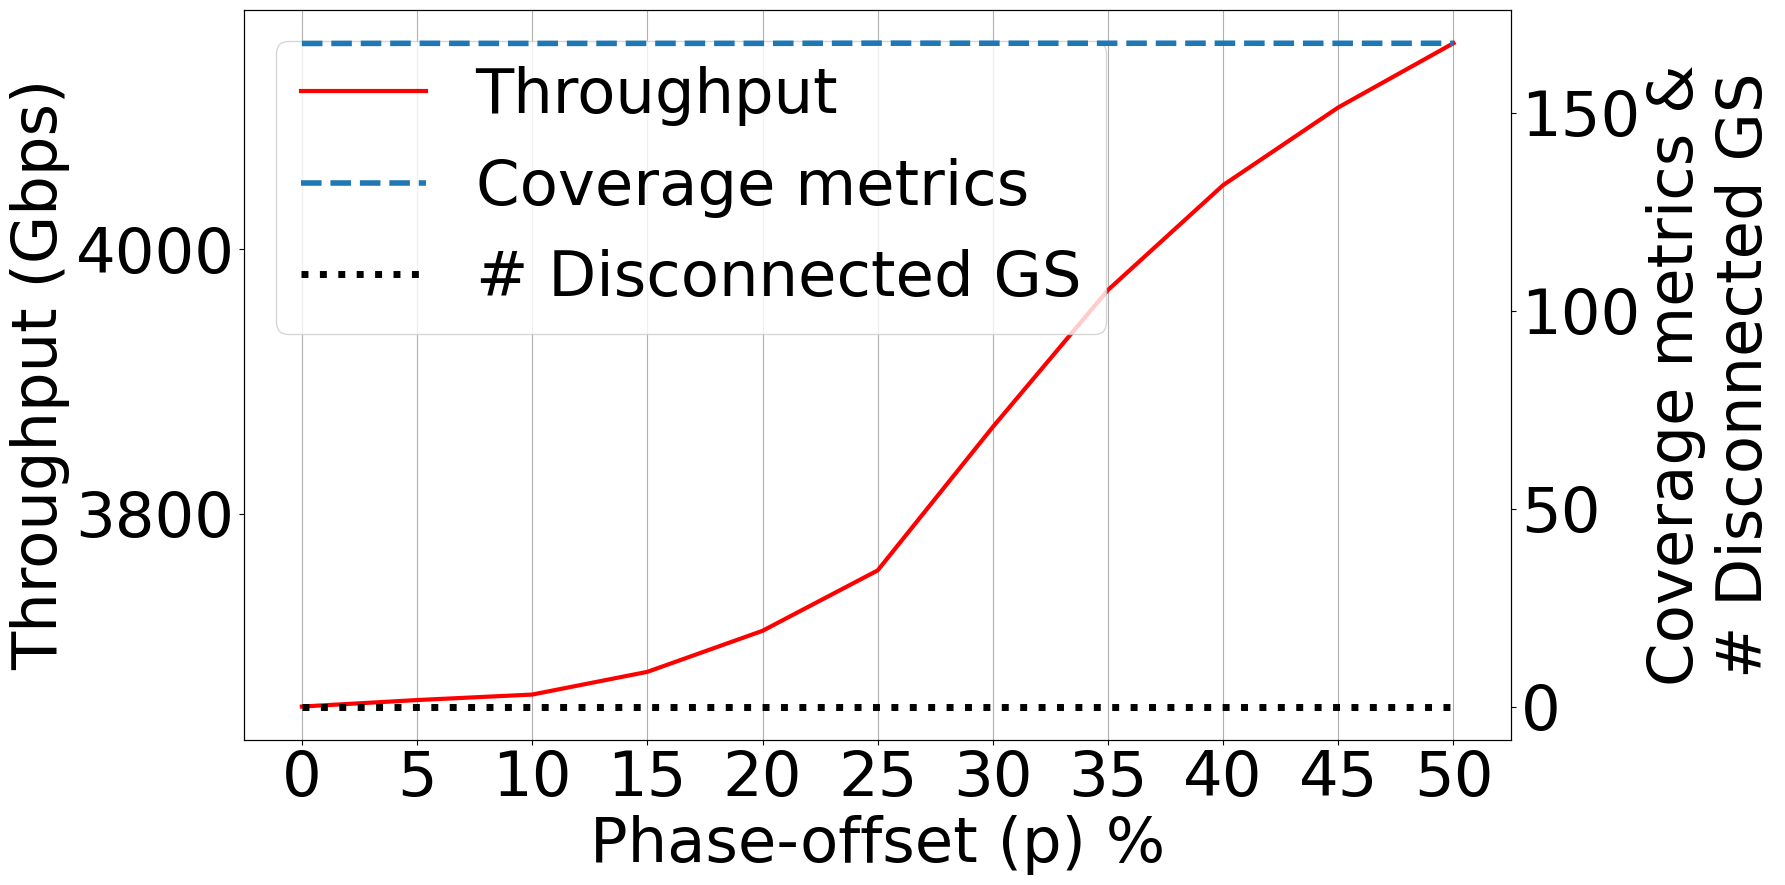

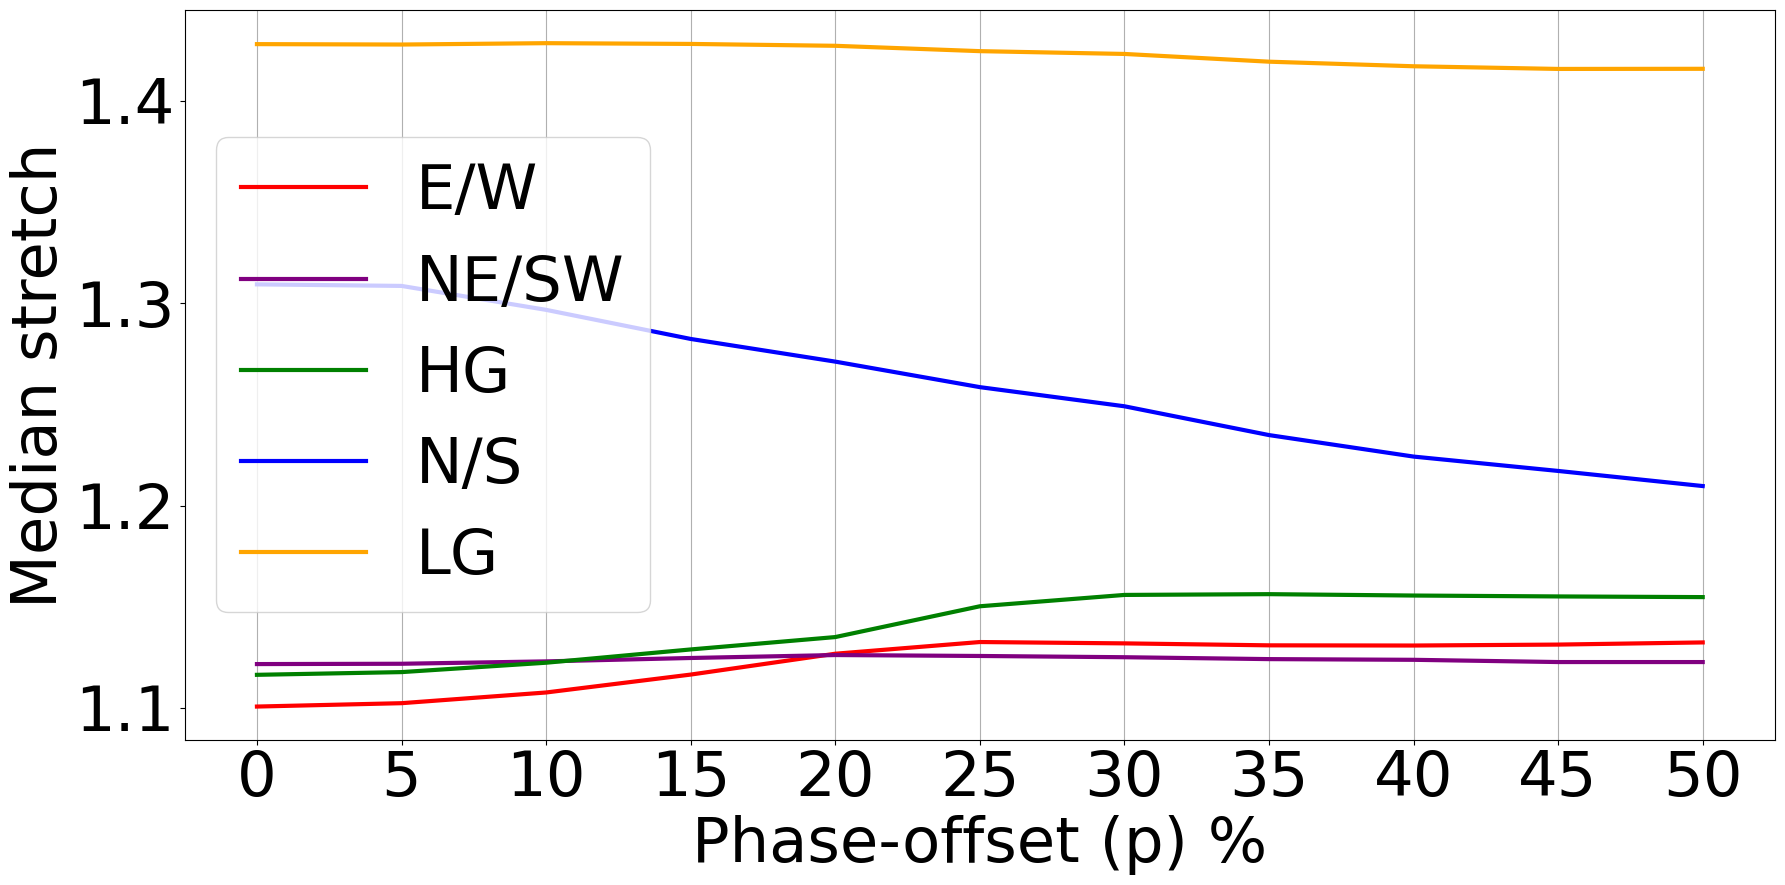

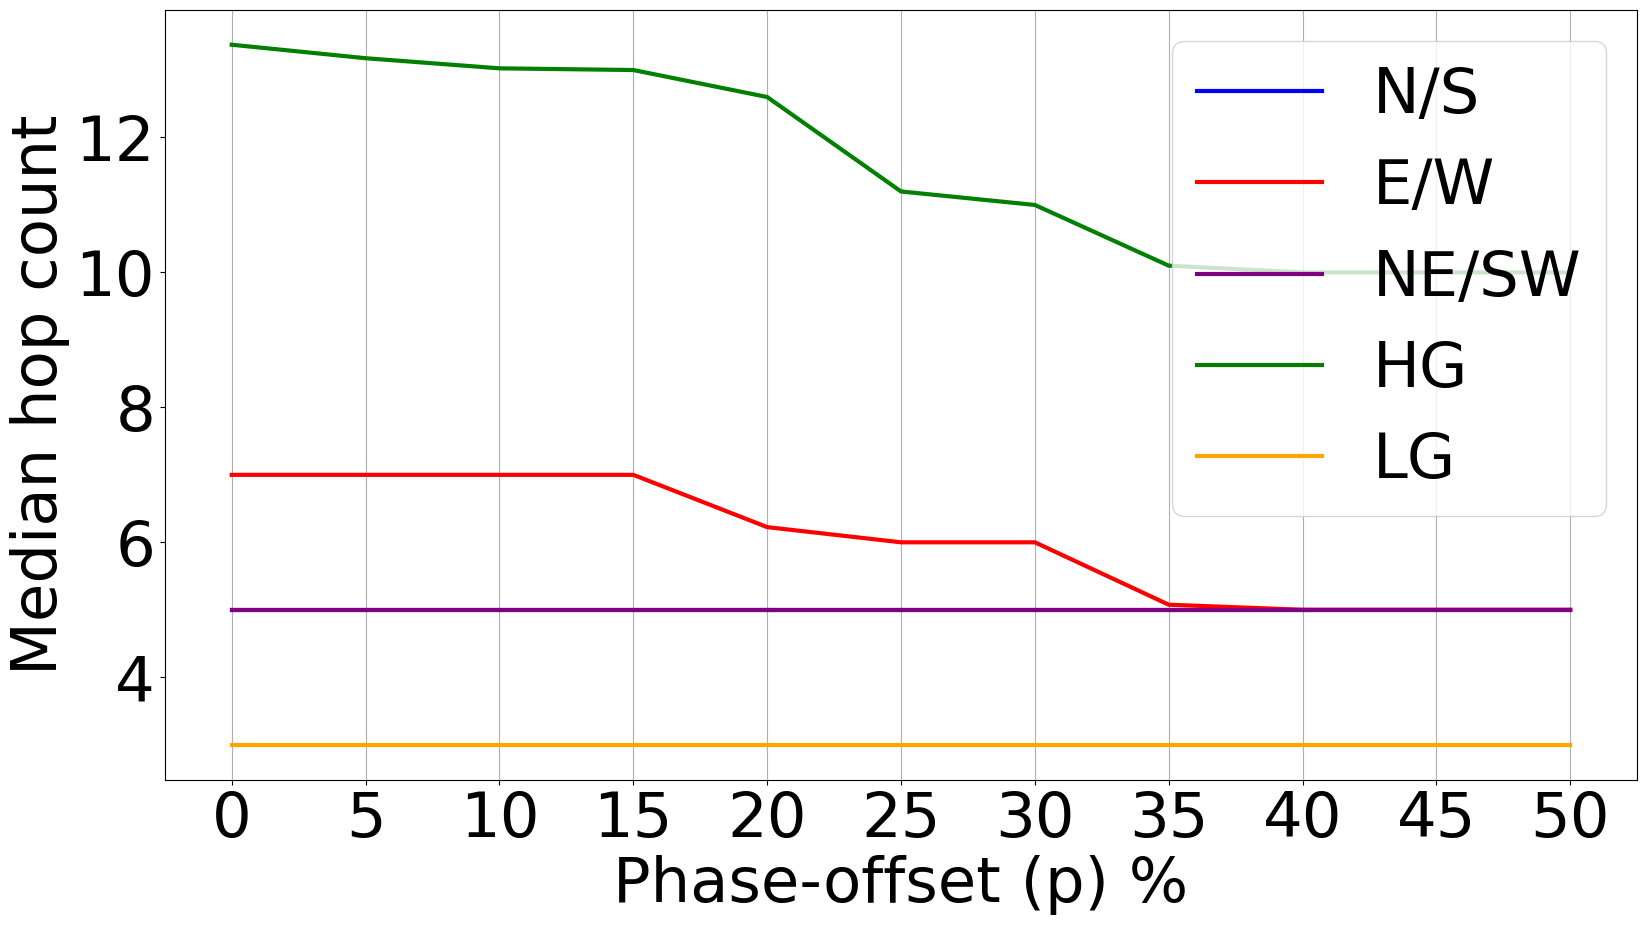

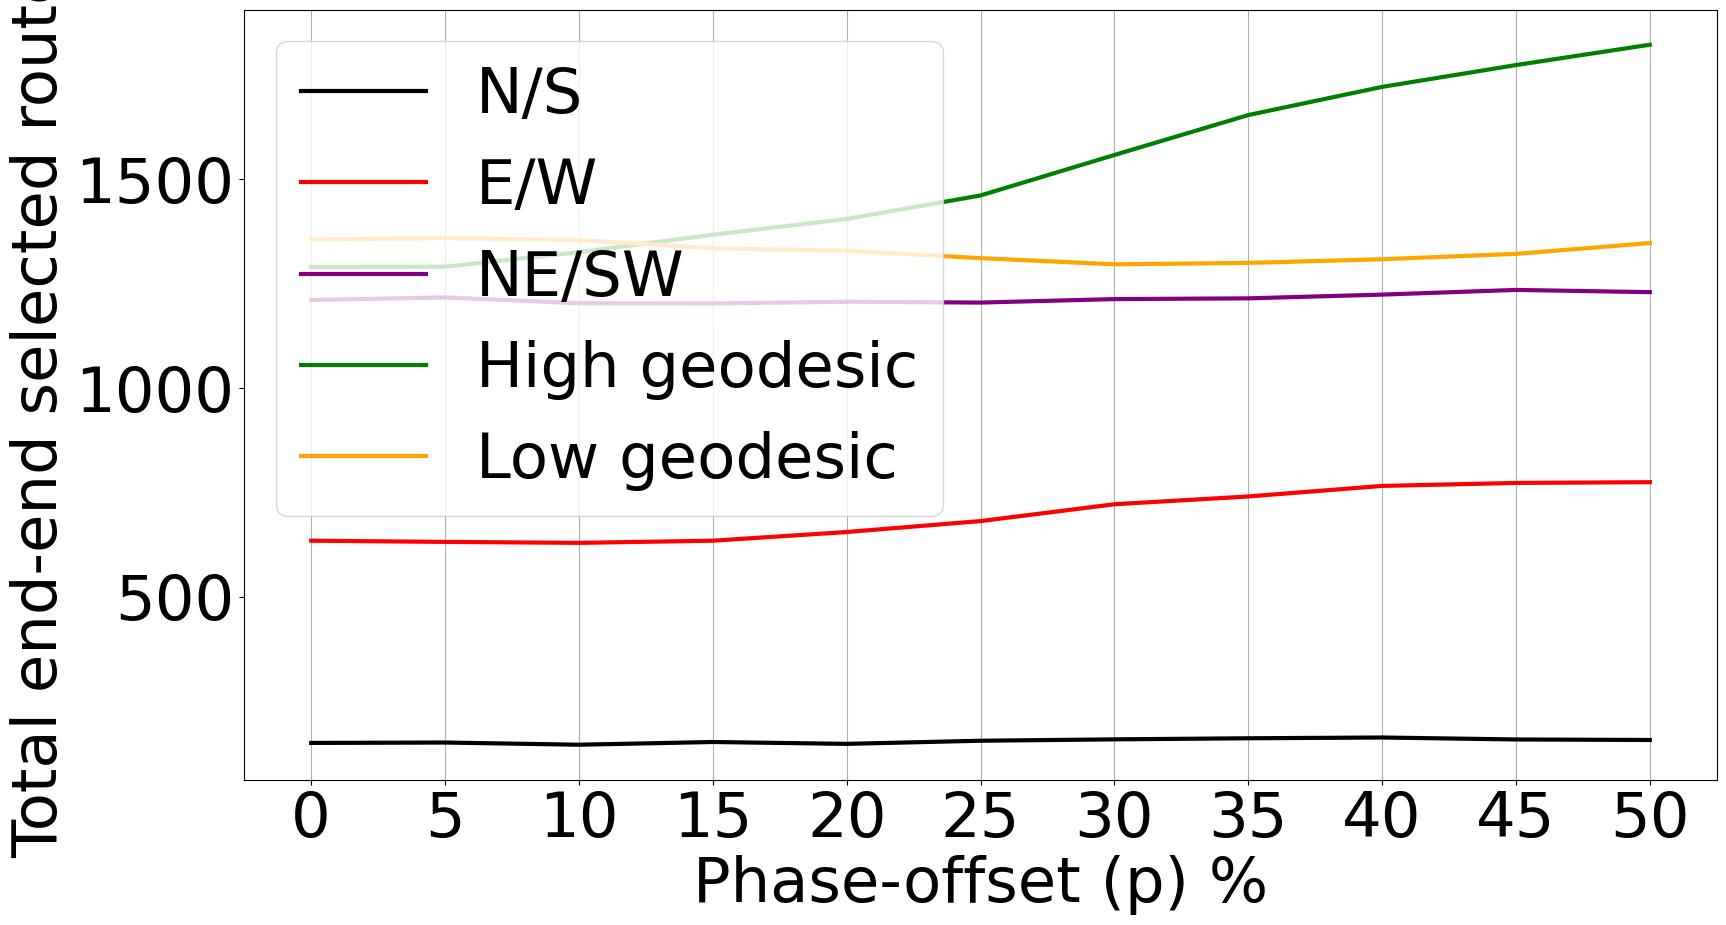

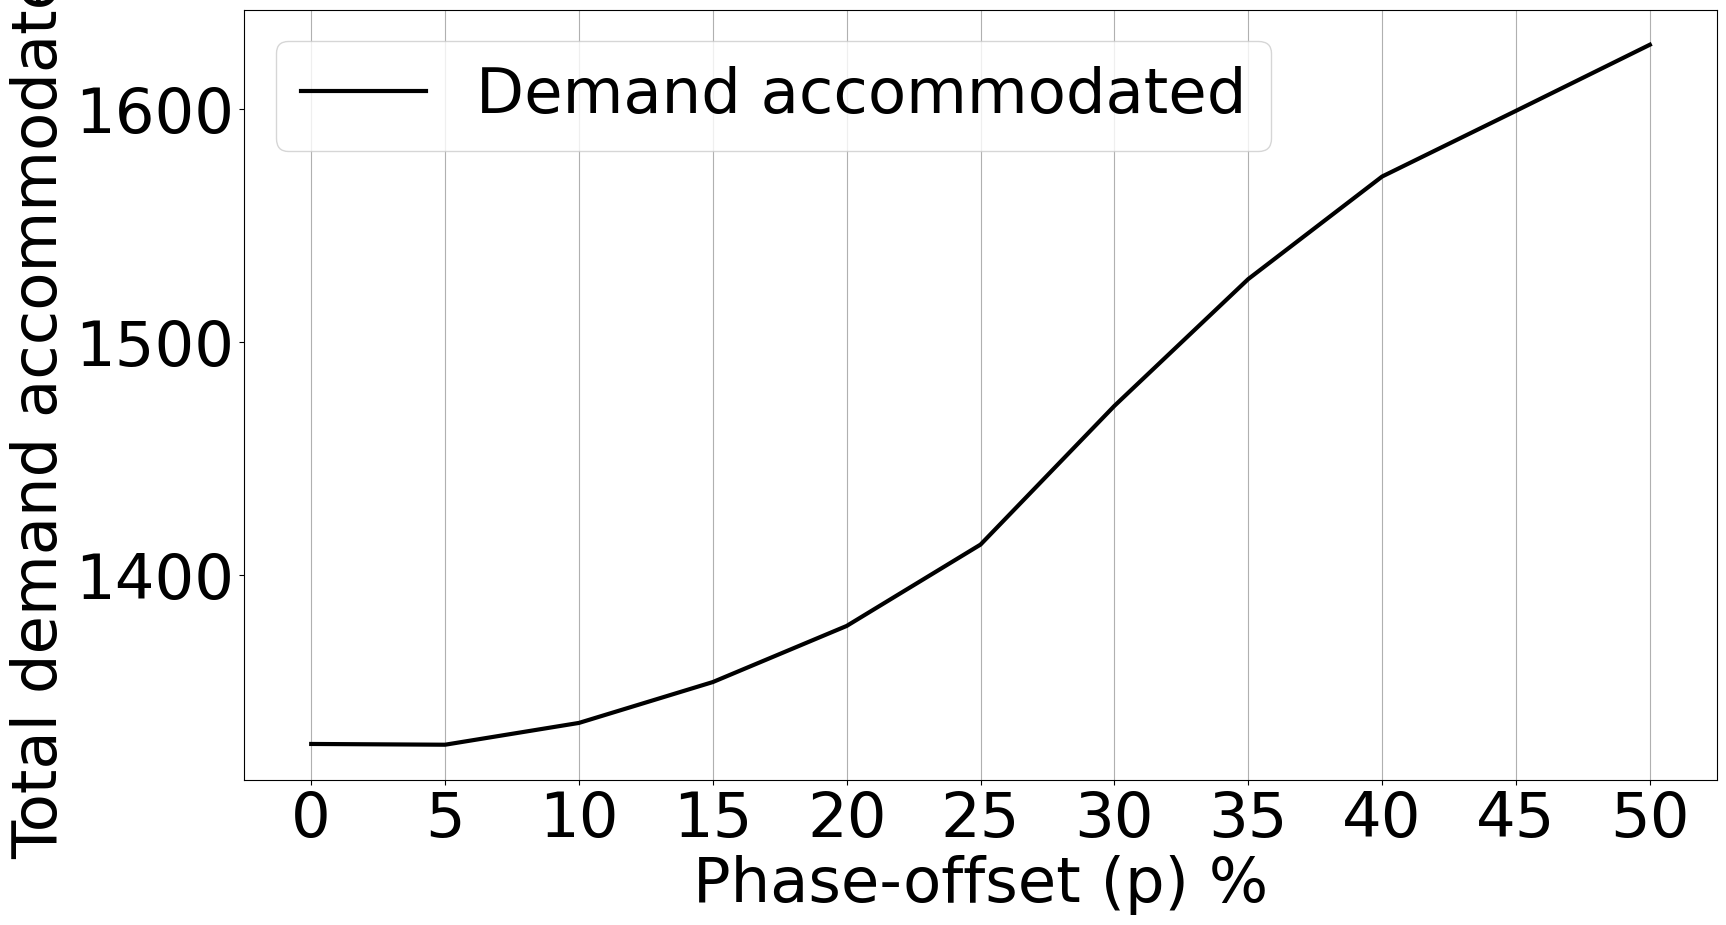

In [15]:
def plot_p(df):
    fig, ax1 = plt.subplots()
    ax1.set_xticks(df['p'], minor=False)
    ax1.xaxis.grid(True, which='major')
    ax1.xaxis.grid(True, which='minor')

    # Throughput
    ax1.set_xlabel('Phase-offset (p) %')
    ax1.set_ylabel('Throughput (Gbps)')
    # line1 = ax1.plot(df['p'], df['th_POP_GDP'],
    #                  label='Population GDP TM', color='r', linewidth=3)
    line2 = ax1.plot(df['p'], df['th_POP_ONLY'],
                     label='Throughput', color='r', linewidth=3)
    ax1.tick_params(axis='y')

    # Coverage
    ax2 = ax1.twinx()
    ax2.set_ylabel('Coverage metrics &\n# Disconnected GS')
    line3 = ax2.plot(df['p'], df['cov'], label='Coverage metrics',
                     linestyle='dashed', linewidth=4)
    line4 = ax2.plot(df['p'], df['dead_cnt'], label='# Disconnected GS',
                     linestyle='dotted', color='black', linewidth=5)
    ax2.tick_params(axis='y')
    fig.tight_layout()
    # lines = line1+line2+line3+line4
    lines = line2+line3+line4
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels)
    plt.show()

    # Stretch
    fig, ax1 = plt.subplots()
    ax1.set_xticks(df['p'], minor=False)
    ax1.xaxis.grid(True, which='major')
    ax1.xaxis.grid(True, which='minor')
    ax1.set_xlabel('Phase-offset (p) %')
    ax1.set_ylabel('Median stretch')
    ax1.plot(df['p'], df['EW_sth'], label='E/W', color='Red', linewidth=3)
    ax1.plot(df['p'], df['NESW_sth'], label='NE/SW',
             color='Purple', linewidth=3)
    ax1.plot(df['p'], df['HG_sth'], label='HG', color='Green', linewidth=3)
    ax1.plot(df['p'], df['NS_sth'], label='N/S', color='Blue', linewidth=3)
    ax1.plot(df['p'], df['LG_sth'], label='LG', color='Orange', linewidth=3)
    fig.tight_layout()
    ax1.legend()
    plt.show()

    # Hop count
    _, ax = plt.subplots()
    ax.set_xticks(df['p'], minor=False)
    ax.xaxis.grid(True, which='major')
    ax.xaxis.grid(True, which='minor')
    plt.xlabel("Phase-offset (p) %")
    plt.ylabel("Median hop count")
    plt.plot(df['p'], df['NS_cnt'], label='N/S', color='Blue', linewidth=3)
    plt.plot(df['p'], df['EW_cnt'], label='E/W', color='Red', linewidth=3)
    plt.plot(df['p'], df['NESW_cnt'], label='NE/SW',
             color='Purple', linewidth=3)
    plt.plot(df['p'], df['HG_cnt'], label='HG', color='Green', linewidth=3)
    plt.plot(df['p'], df['LG_cnt'], label='LG', color='Orange', linewidth=3)
    plt.legend()
    plt.show()

    # Total end to end selected routes
    fig, ax1 = plt.subplots()

    ax1.set_xticks(df['p'], minor=False)
    ax1.xaxis.grid(True, which='major')
    ax1.xaxis.grid(True, which='minor')
    ax1.set_xlabel("Phase-offset (p) %")
    ax1.set_ylabel("Total end-end selected routes")

    ax1.plot(df['p'], df['NS_selt'], label='N/S', color='black', linewidth=3)
    ax1.plot(df['p'], df['EW_selt'], label='E/W', color='Red', linewidth=3)
    ax1.plot(df['p'], df['NESW_selt'], label='NE/SW',
             color='Purple', linewidth=3)
    ax1.plot(df['p'], df['HG_selt'], label='High geodesic',
             color='Green', linewidth=3)
    ax1.plot(df['p'], df['LG_selt'], label='Low geodesic',
             color='Orange', linewidth=3)

    ax1.legend()
    plt.show()

    # Total demand accommodated
    fig, ax1 = plt.subplots()

    ax1.set_xticks(df['p'], minor=False)
    ax1.xaxis.grid(True, which='major')
    ax1.xaxis.grid(True, which='minor')
    ax1.set_xlabel("Phase-offset (p) %")
    ax1.set_ylabel("Total demand accommodated")
    ax1.plot(df['p'], df['ttl_accm_flw'],
             label='Demand accommodated', color='black', linewidth=3)
    ax1.legend()
    plt.show()


print('Avg over orbital period')
df = pd.read_csv(
    'CSVs/explore_search_space/secret_of_p.csv').sort_values(by='p')
plot_p(df)

### Useful plot for O and P

## Path diversity with high $o$ and $p=0.5$

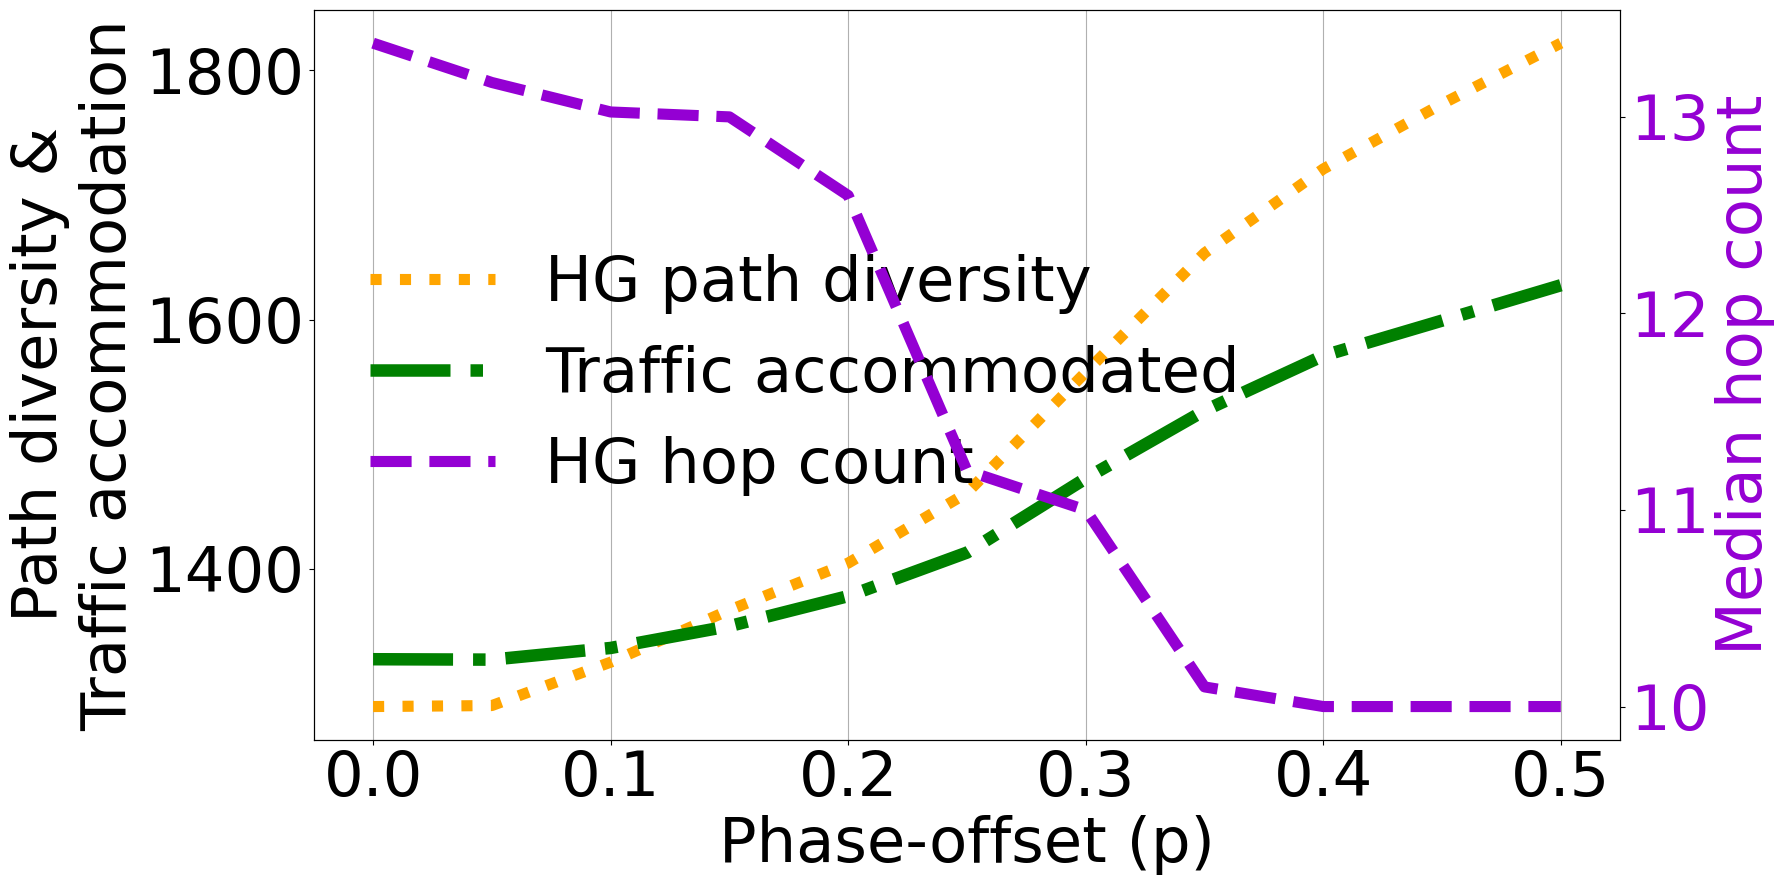

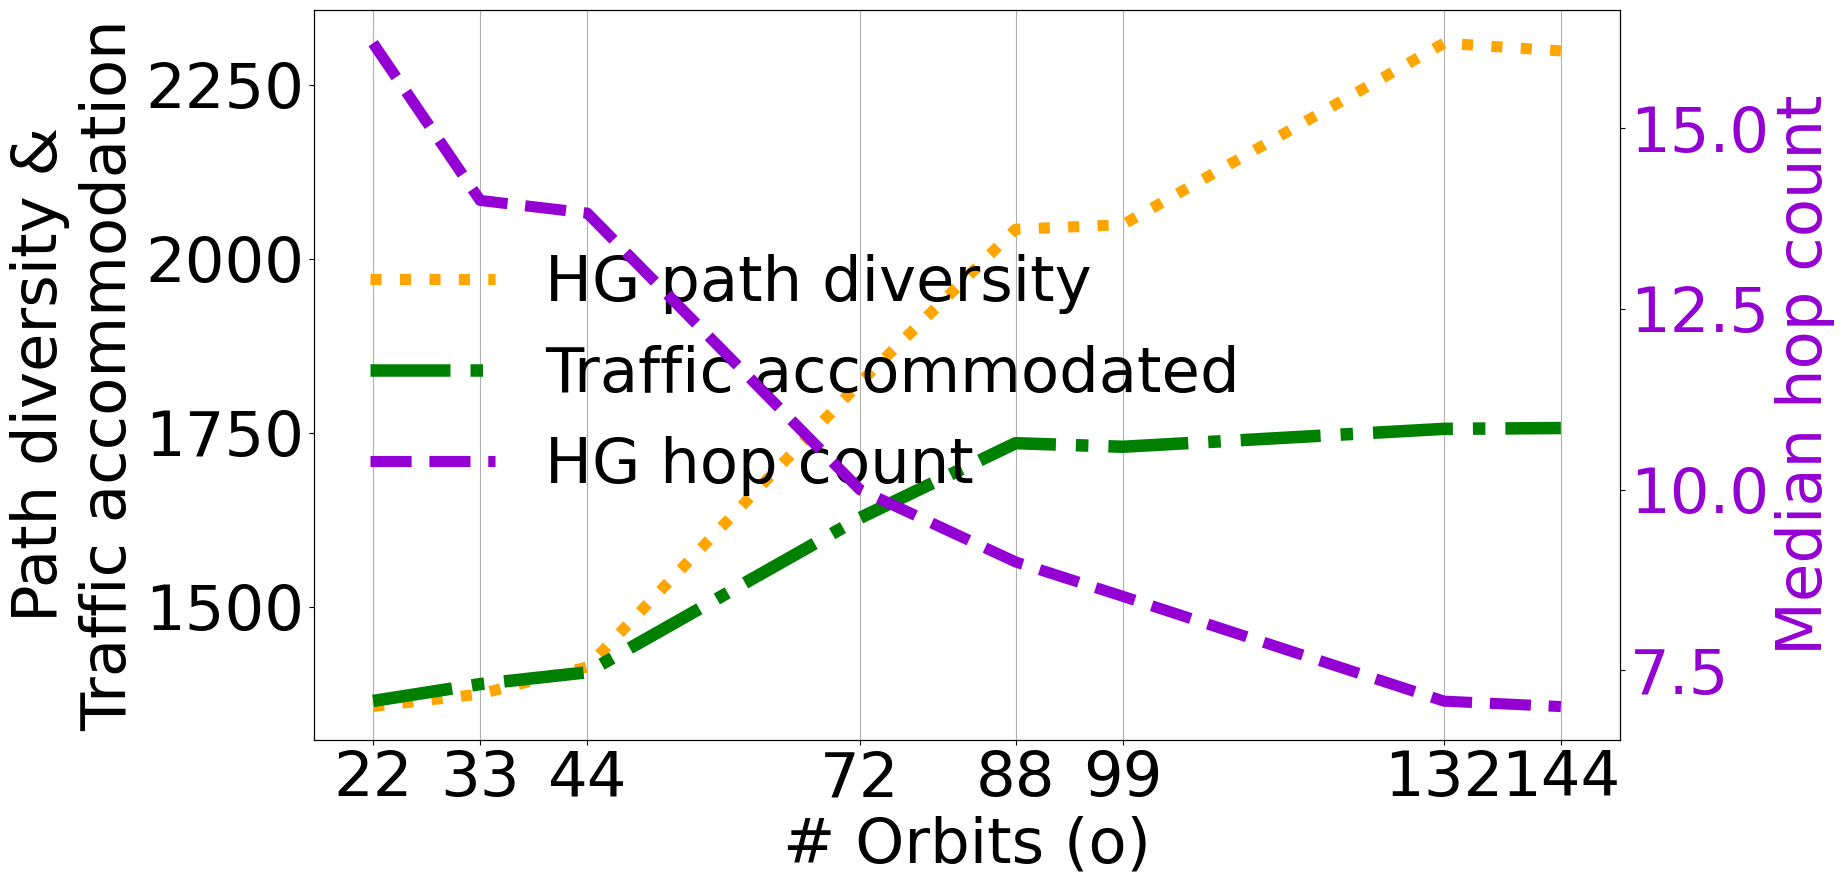

In [ ]:
df = pd.read_csv(
    'CSVs/explore_search_space/secret_of_p.csv').sort_values(by='p')
df['p'] = df['p']/100

# Total end to end selected routes
fig, ax1 = plt.subplots()

ax1.set_xticks([i/100 for i in range(0, 51, 10)], minor=False)
ax1.xaxis.grid(True, which='major')
ax1.xaxis.grid(True, which='minor')
ax1.set_xlabel("Phase-offset (p)")
ax1.set_ylabel("Path diversity &\nTraffic accommodation")

line1 = ax1.plot(df['p'], df['HG_selt'], label='HG path diversity',
                 color='orange', linewidth=8, linestyle='dotted')
line2 = ax1.plot(df['p'], df['ttl_accm_flw'], label='Traffic accommodated',
                 color='Green', linewidth=9, linestyle='dashdot')


ax2 = ax1.twinx()
ax2.set_ylabel("Median hop count", color='darkviolet')
ax2.tick_params(axis='y', labelcolor='darkviolet')
line3 = ax2.plot(df['p'], df['HG_cnt'], label='HG hop count',
                 linestyle='dashed', color='darkviolet', linewidth=8)

lines = line1+line2+line3
labels = [l.get_label() for l in lines]
legend = ax1.legend(lines, labels, loc=6)
legend.get_frame().set_alpha(0)
plt.tight_layout()
# plt.savefig('figures/o/secret_of_o.png')
plt.show()


df = pd.read_csv(
    'CSVs/explore_search_space/secret_of_o.csv').sort_values(by='o')

# Total end to end selected routes
fig, ax1 = plt.subplots()

ax1.set_xticks(df['o'], minor=False)
ax1.xaxis.grid(True, which='major')
ax1.xaxis.grid(True, which='minor')
ax1.set_xlabel("# Orbits (o)")
ax1.set_ylabel("Path diversity &\nTraffic accommodation")

line1 = ax1.plot(df['o'], df['HG_selt'], label='HG path diversity',
                 color='orange', linewidth=8, linestyle='dotted')
line2 = ax1.plot(df['o'], df['ttl_accm_flw'], label='Traffic accommodated',
                 color='Green', linewidth=9, linestyle='dashdot')


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
# we already handled the x-label with ax1
ax2.set_ylabel("Median hop count", color='darkviolet')
ax2.tick_params(axis='y', labelcolor='darkviolet')
line3 = ax2.plot(df['o'], df['HG_cnt'], label='HG hop count',
                 linestyle='dashed', color='darkviolet', linewidth=8)

lines = line1+line2+line3
labels = [l.get_label() for l in lines]
legend = ax1.legend(lines, labels, loc=6)
legend.get_frame().set_alpha(0)
# legend.get_frame().set_facecolor((0, 0, 0, 0.1))
plt.tight_layout()
# plt.savefig('figures/p/secret_of_p.png')
plt.show()

## View number of orbit (o) vs Phase offset (p)

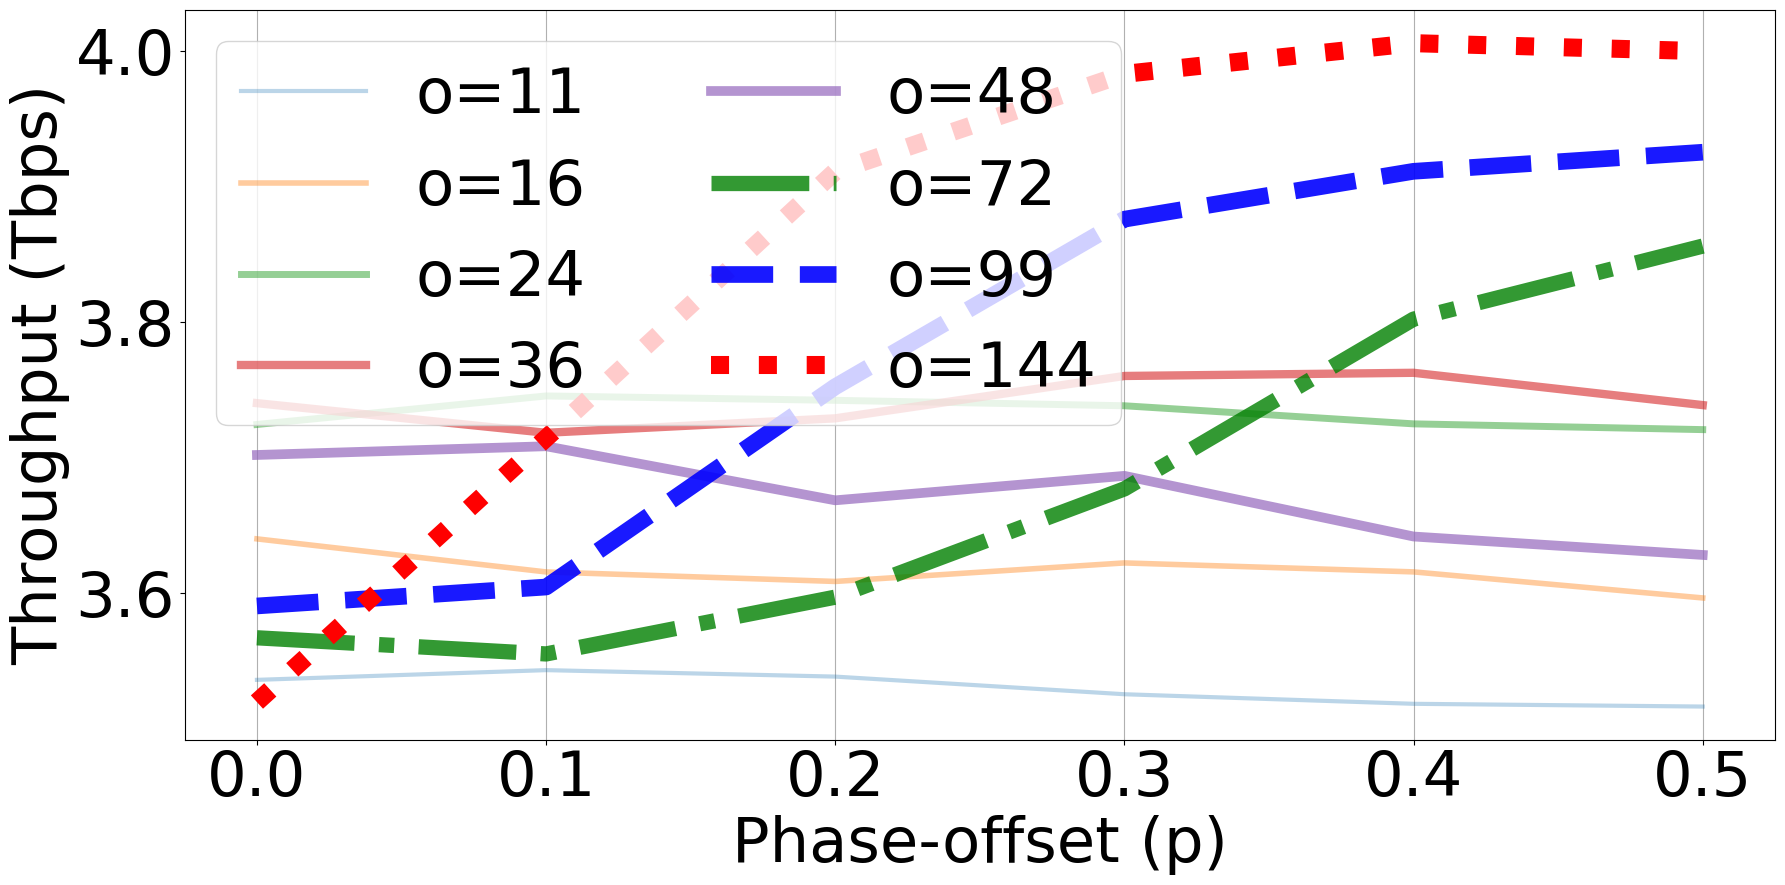

In [18]:
df = pd.read_csv('CSVs/explore_search_space/72x22_o_vs_p_e_restrict.csv')
df['th_POP_ONLY'] = df['th_POP_ONLY']/1000
df['p'] = df['p']/100

# for i, o in enumerate([11, 16, 24, 36, 48, 72, 99, 144]):
#     df_by_o = df.loc[df['o'] == o].sort_values(by='p')
#     plt.plot(df_by_o['p'], df_by_o['th_POP_ONLY'],
#              label=f'o={o}', linewidth=i+2, alpha=0.2+(i/10))

o = 11
df_by_o = df.loc[df['o'] == o].sort_values(by='p')
plt.plot(df_by_o['p'], df_by_o['th_POP_ONLY'],
         label=f'o={o}', linewidth=3, alpha=0.3)

o = 16
df_by_o = df.loc[df['o'] == o].sort_values(by='p')
plt.plot(df_by_o['p'], df_by_o['th_POP_ONLY'],
         label=f'o={o}', linewidth=4, alpha=0.4)

o = 24
df_by_o = df.loc[df['o'] == o].sort_values(by='p')
plt.plot(df_by_o['p'], df_by_o['th_POP_ONLY'],
         label=f'o={o}', linewidth=5, alpha=0.5)

o = 36
df_by_o = df.loc[df['o'] == o].sort_values(by='p')
plt.plot(df_by_o['p'], df_by_o['th_POP_ONLY'],
         label=f'o={o}', linewidth=6, alpha=0.6)

o = 48
df_by_o = df.loc[df['o'] == o].sort_values(by='p')
plt.plot(df_by_o['p'], df_by_o['th_POP_ONLY'],
         label=f'o={o}', linewidth=7, alpha=0.7)

o = 72
df_by_o = df.loc[df['o'] == o].sort_values(by='p')
plt.plot(df_by_o['p'], df_by_o['th_POP_ONLY'],
         label=f'o={o}', linewidth=11, alpha=0.8, c='g', linestyle='dashdot')

o = 99
df_by_o = df.loc[df['o'] == o].sort_values(by='p')
plt.plot(df_by_o['p'], df_by_o['th_POP_ONLY'],
         label=f'o={o}', linewidth=12, alpha=0.9, c='b', linestyle='dashed')

o = 144
df_by_o = df.loc[df['o'] == o].sort_values(by='p')
plt.plot(df_by_o['p'], df_by_o['th_POP_ONLY'],
         label=f'o={o}', linewidth=13, alpha=1, c='r', linestyle='dotted')


plt.grid(axis='x')
plt.xlabel('Phase-offset (p)')
plt.ylabel('Throughput (Tbps)')
plt.legend(ncol=2)
plt.tight_layout()
# plt.savefig('figures/o_p/o_vs_p_thpop.png')
plt.show()